In [1]:
import numpy as np
from scipy.special import expit
import sys
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

%matplotlib inline  

In [2]:
# def calc_precip(qp, q, rho, z):
# # surface precipitation rate given tendency of specific humidity
#     precip = -vertical_integral(q + qp, rho, z)
#     return precip

# def vertical_integral(data, rho, z):
# # vertical integral with respect to sigma
#     rho_dz = vertical_diff(rho, z)
#     int_data = np.sum(data * rho_dz[None,:], axis=1)
#     return int_data

# def vertical_diff(rho, z):
#     # follow vertical differencing from setgrid.f90 in SAM
#     # changed indexing from starting at 1 to 0
#     nzm = z.size
#     adz = np.zeros(nzm)    
#     dz = 0.5*(z[0]+z[1]) 
#     adz[0] = 1.
#     for k in range(1,nzm-1): # range doesn't include stopping number
#        adz[k] = 0.5*(z[k+1]-z[k-1])/dz

#     adz[nzm-1] = (z[nzm-1]-z[nzm-2])/dz

#     rho_dz = adz*dz*rho

#     return rho_dz

In [3]:
# save_path = '/Users/yani/Dropbox/MIT/projects/Plotting_data'

# #path to data file 
# filename = '/Users/yani/Dropbox/MIT/projects/Plotting_data/qobskm12x576_576x1440x48_ctl_288_0001754100_0001_diff_coarse_space_corrected_tkz16.nc4'
# # filename = '/Users/yani/Dropbox/MIT/projects/Plotting_data/qobskm12x576_576x1440x48_ctl_288_0001754100_0001_diff_coarse_space_corrected_tkz8.nc4'



In [5]:
filename = '/Users/yani/Dropbox/MIT/projects/Plotting_data/qobskm12x576_576x1440x48_ctl_288_0001754100_0001_diff_coarse_space_corrected_tkz8.nc4'


f = Dataset(filename, mode='r')

x = f.variables['x'][:] # m
y = f.variables['y'][:] # m
z = f.variables['z'][:] # m
p = f.variables['p'][:] # hPa
dqp = f.variables['DQP'][:]
dqp_resolved =  f.variables['DQP_RESOLVED'][:]
rho = f.variables['rho'][:] # kg/m^3
dqp_resolved = dqp - dqp_resolved

f.close()

# Getting precip data

In [6]:
x8 = False
if x8 == True:
    online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x8_5layer_no_momentum_check_reproduction/nc_stat.nc'

    f_online = Dataset(online_data_path, mode='r')

    precip_mean_rf = f_online.variables['precip_avg_rf'][:]
    precip_x_rf = f_online.variables['precip_xtreme_rf'][:]

    precip_mean_coarse = f_online.variables['precip_avg_coarse'][:]
    precip_x_coarse = f_online.variables['precip_xtreme_coarse'][:]
    f_online.close()


    #This is the new reference that I used (slightly different )
    online_data_path = '/Users/yani/Dropbox/MIT/projects/Plotting_data/data_X01_Online/data_x8_reference/nc_stat.nc'
    f_online = Dataset(online_data_path, mode='r')


    precip_mean_low = f_online.variables['precip_avg_rf'][:]
    precip_x_low = f_online.variables['precip_xtreme_rf'][:]
    f_online.close()


    online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x8_5layer_with_momentum_with_tkz_before_adams_500_days/nc_stat.nc'
#     online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x8_5layer_with_momentum_after_adams/nc_stat.nc'
    f_online = Dataset(online_data_path, mode='r')

    precip_mean_rf_mom = f_online.variables['precip_avg_rf'][:]
    precip_x_rf_mom = f_online.variables['precip_xtreme_rf'][:]

    precip_mean_coarse2 = f_online.variables['precip_avg_coarse'][:]
    precip_x_coarse2 = f_online.variables['precip_xtreme_coarse'][:]

    # precip_avg_low = f_online.variables['precip_avg_low'][:] 

    y= f_online.variables['y'][:]
    p= f_online.variables['P'][:]
    f_online.close()

    # precip_mean_true

In [7]:
x4 = True
if x4 == True:
    online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x4_NN/nc_stat.nc'

    f_online = Dataset(online_data_path, mode='r')

    precip_mean_rf = f_online.variables['precip_avg_rf'][:]
    precip_x_rf = f_online.variables['precip_xtreme_rf'][:]

    precip_mean_coarse = f_online.variables['precip_avg_coarse'][:]
    precip_x_coarse = f_online.variables['precip_xtreme_coarse'][:]
    f_online.close()


    #This is the new reference that I used (slightly different )
    # I do not have a reference to the x4 simulation at the moment
    online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x4_NN/nc_stat.nc'
    f_online = Dataset(online_data_path, mode='r')


    precip_mean_low = f_online.variables['precip_avg_rf'][:]
    precip_x_low = f_online.variables['precip_xtreme_rf'][:]
    f_online.close()


    online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x4_with_momentum_full/nc_stat.nc'
    f_online = Dataset(online_data_path, mode='r')

    precip_mean_rf_mom = f_online.variables['precip_avg_rf'][:]
    precip_x_rf_mom = f_online.variables['precip_xtreme_rf'][:]

    precip_mean_coarse2 = f_online.variables['precip_avg_coarse'][:]
    precip_x_coarse2 = f_online.variables['precip_xtreme_coarse'][:]

    # precip_avg_low = f_online.variables['precip_avg_low'][:] 

    y= f_online.variables['y'][:]
    p= f_online.variables['P'][:]
    f_online.close()

    # precip_mean_true

In [23]:
x16 = False
if x16 == True:
#     online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x16_with_4_layers_and_5_tkz_very_good_run/nc_stat.nc'
    online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x16_4_layers_both_NN_128neurons/nc_stat.nc'

    f_online = Dataset(online_data_path, mode='r')

    precip_mean_rf = f_online.variables['precip_avg_rf'][:]
    precip_x_rf = f_online.variables['precip_xtreme_rf'][:]

    precip_mean_coarse = f_online.variables['precip_avg_coarse'][:]
    precip_x_coarse = f_online.variables['precip_xtreme_coarse'][:]
    f_online.close()


    #This is the new reference that I used (slightly different )
    online_data_path = '/Users/yani/Dropbox/MIT/projects/Plotting_data/data_coriolis_6_km_shift/data_x16_reference/nc_stat.nc'
    f_online = Dataset(online_data_path, mode='r')


    precip_mean_low = f_online.variables['precip_avg_rf'][:]
    precip_x_low = f_online.variables['precip_xtreme_rf'][:]
    f_online.close()


#     online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x16_with_4_layers_and_5_tkz_with_momentum_unite/nc_stat.nc'
    online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x16_4_layers_both_with_momentum_unite/nc_stat.nc'
    f_online = Dataset(online_data_path, mode='r')

    precip_mean_rf_mom = f_online.variables['precip_avg_rf'][:]
    precip_x_rf_mom = f_online.variables['precip_xtreme_rf'][:]

    precip_mean_coarse2 = f_online.variables['precip_avg_coarse'][:]
    precip_x_coarse2 = f_online.variables['precip_xtreme_coarse'][:]

    # precip_avg_low = f_online.variables['precip_avg_low'][:] 

    y= f_online.variables['y'][:]
    p= f_online.variables['P'][:]
    f_online.close()

    # precip_mean_true

In [8]:
colors1 = ['C0','C1','C2']

In [9]:
from sklearn.metrics import r2_score
r2_score(precip_mean_coarse[:],precip_mean_rf_mom[:])

0.7458109875399421

In [10]:
from sklearn.metrics import r2_score
r2_score(precip_mean_coarse[:],precip_mean_rf[:])

0.9660608731667669

# Plot 2 subplots only with 

In [11]:
#RF:
# online_data_path = '/Users/yani/Dropbox/MIT/projects/Plotting_data/data_X01_Online/data_x8/nc_stat.nc'
#NN
online_data_path = '/Users/yani/Dropbox/MIT/projects/NN_parameterization/data_x8_x16_NN_log/data_x8_5_layers_500_days_avg/nc_stat.nc'
# online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x8_5layer_with_momentum_after_adams/nc_stat.nc'
f_online = Dataset(online_data_path, mode='r')

precip_mean_rf = f_online.variables['precip_avg_rf'][:]
precip_x_rf = f_online.variables['precip_xtreme_rf'][:]

precip_mean_coarse = f_online.variables['precip_avg_coarse'][:]
precip_x_coarse = f_online.variables['precip_xtreme_coarse'][:]
f_online.close()


#This is the new reference that I used (slightly different )
online_data_path = '/Users/yani/Dropbox/MIT/projects/Plotting_data/data_X01_Online/data_x8_reference/nc_stat.nc'
f_online = Dataset(online_data_path, mode='r')


precip_mean_low = f_online.variables['precip_avg_rf'][:]
precip_x_low = f_online.variables['precip_xtreme_rf'][:]
f_online.close()


#old RF
# online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_x8_starting_from_2_jets_200_days_avg_110_days/nc_stat.nc'
# NN:
# online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/temp_data/data_x8_NN_euler_with_mom/nc_stat.nc'
# f_online = Dataset(online_data_path, mode='r')
## NN with tkz before ADAMS:
online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x8_5layer_with_momentum_with_tkz_before_adams/nc_stat.nc'
f_online = Dataset(online_data_path, mode='r')

precip_mean_rf_mom = f_online.variables['precip_avg_rf'][:]
precip_x_rf_mom = f_online.variables['precip_xtreme_rf'][:]

precip_mean_coarse2 = f_online.variables['precip_avg_coarse'][:]
precip_x_coarse2 = f_online.variables['precip_xtreme_coarse'][:]
f_online.close()

# precip_mean_true

In [12]:
filename = '/Users/yani/Dropbox/MIT/projects/Plotting_data/qobskm12x576_576x1440x48_ctl_288_0001754100_0001_diff_coarse_space_corrected_tkz8.nc4'


f = Dataset(filename, mode='r')

x = f.variables['x'][:] # m
y = f.variables['y'][:] # m
z = f.variables['z'][:] # m
p = f.variables['p'][:] # hPa
dqp = f.variables['DQP'][:]
dqp_resolved =  f.variables['DQP_RESOLVED'][:]
rho = f.variables['rho'][:] # kg/m^3
dqp_resolved = dqp - dqp_resolved

f.close()

In [26]:
y_plot = (y - np.mean(y))/10**6
x_plot = (x - np.mean(x))/10**6
per_day = 3600*24
fontsize = 10
fontsize_legend = 8
ticks_lat = [-5,0,5]

ticks_pmean = [0,3,6,9,12]
ticks_px = np.arange(0,900,200)
ticks_px = np.arange(0,300,100)
# ticks_px_label = [0,'',200,'',400,'',600,'',800,'']
# ticks_px_label = [0,200,400,600,800]
ticks_px_label = [0,100,200,300,400,500]


# ticks_px_offline = np.arange(0,70,10)
# ticks_pmean_offline = np.arange(0,4,1)


linewidth=1.5

h_width = 0.1
v_width = 0.1
h_width_cbar = 0.02
colorbar_width =0.02

row_dim = 2
col_dim = 2

fig_witdth = 0.45
fig_height = 0.5
fig_h_dist = 0.08
fig_v_dist = 0.1

R2_mean = r2_score(precip_mean_coarse[:],precip_mean_rf[:])
R2MOM_mean = r2_score(precip_mean_coarse[:],precip_mean_rf_mom[:])
R2_x = r2_score(precip_x_coarse[:],precip_x_rf[:])
R2MOM_x = r2_score(precip_x_coarse[:],precip_x_rf_mom[:])



letters = ["(a) with momentum"+"  $R^2$= " + str(round(R2MOM_mean,3)),
           "(b) without momentum"+"  $R^2$= " + str(round(R2_mean,3)),
           "(c) with momentum"+"  $R^2$= " + str(round(R2MOM_x,3)),
           "(d) without momentum"+"  $R^2$= " + str(round(R2_x,3))]
# headers = ["Mean precipitation offline","Mean precipitation online","Extreme precipitation offline","Extreme precipitation online"]
headers = ['',"","",""]

colors1 = ['C0','C1','C2']
fig, axes = plt.subplots(row_dim,col_dim)


# precip_mean_rf22 = (np.mean(precip_x8_time[2500:,:],axis=0))
cax_mean_online2 = axes[0,1].plot(y_plot,  precip_mean_coarse , label='hi-res', linewidth=linewidth,color=colors1[0])
cax_mean_online = axes[0,1].plot(y_plot,  precip_mean_rf, label='x16-RF',linestyle='-.', linewidth=linewidth,color=colors1[1])
# cax_mean_online2 = axes[0,1].plot(y_plot,  precip_mean_low , label='x16', linewidth=linewidth,color=colors1[2])
axes[0,1].legend(loc="upper left",fontsize=fontsize_legend,frameon=False)


# cax_x_offline = axes[1,0].plot(y_plot,  precip_x_true * per_day, label='True', linewidth=linewidth,color=colors1[0])
# cax_x_offline2 = axes[1,0].plot(y_plot,  precip_x_pred * per_day, label='Pred',linestyle='-.', linewidth=linewidth,color=colors1[1])
cax_mean_online2 = axes[0,0].plot(y_plot,  precip_mean_coarse , label='hi-res', linewidth=linewidth,color=colors1[0])
cax_mean_online = axes[0,0].plot(y_plot,  precip_mean_rf_mom, label='x16-RF+MOM',linestyle='-.', linewidth=linewidth,color=colors1[1])
axes[0,0].legend(loc="upper left",fontsize=fontsize_legend,frameon=False)

      
cax_mean_online2 = axes[1,1].plot(y_plot,  precip_x_coarse , label='hi-res', linewidth=linewidth,color=colors1[0])
cax_mean_online = axes[1,1].plot(y_plot,  precip_x_rf, label='x8-RF',linestyle='-.', linewidth=linewidth,color=colors1[1])
# cax_mean_online2 = axes[1,1].plot(y_plot,  precip_x_low , label='x8', linewidth=linewidth,color=colors1[2])
axes[1,1].legend(loc="upper left",fontsize=fontsize_legend,frameon=False)    


cax_mean_online2 = axes[1,0].plot(y_plot,  precip_x_coarse , label='hi-res', linewidth=linewidth,color=colors1[0])
cax_mean_online = axes[1,0].plot(y_plot,  precip_x_rf_mom, label='x16-RF+MOM',linestyle='-.', linewidth=linewidth,color=colors1[1])
# cax_mean_online2 = axes[1,1].plot(y_plot,  precip_x_low , label='x8', linewidth=linewidth,color=colors1[2])
axes[1,0].legend(loc="upper left",fontsize=fontsize_legend,frameon=False)    



# fig.delaxes(axes[1,0])
# fig.delaxes(axes[0,0])

axes[0,0].set_ylim([0,12])
axes[1,0].set_ylim([0,350])

axes[0,1].set_ylim([0,12])
axes[1,1].set_ylim([0,350])

xlim1 = [-8,8]
axes[0,0].set_xlim(xlim1)
axes[1,0].set_xlim(xlim1)

axes[0,1].set_xlim(xlim1)
axes[1,1].set_xlim(xlim1)



#Position of first figure        
x0 = axes[0,0].get_position().x0
x1 = axes[0,0].get_position().x1
y0 = axes[0,0].get_position().y0
y1 = axes[0,0].get_position().y1

for i in range(row_dim):
    for j  in range(col_dim):
        axes[i,j].set_position([x0 + j*fig_witdth + j*fig_h_dist,y0- i*fig_height - i*fig_v_dist,fig_witdth,fig_height])
        
        
        
pos1_rsq = axes[1, 1].get_position() # get the original position 
# pos2 = [pos1.x0 + 0.3, pos1.y0 + 0.3,  pos1.width / 2.0, pos1.height / 2.0] 
# ax.set_position(pos2) # set a new position




rescale_let_pos = 0.8
lat_pos = min(y_plot)*(rescale_let_pos*1.1)


ind_let = 0
for i in range(row_dim):
    for j  in range(col_dim):
        atext2 = axes[i, j].text(axes[0,0].get_position().x0*1.1+ j*fig_witdth + j*fig_h_dist-fig_h_dist*1.2,axes[0,0].get_position().y0*.85- (i-1)*fig_height - (i-1)*fig_v_dist ,letters[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize)
        
        header= axes[i, j].text(axes[0,0].get_position().x0*2.3+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*0.85- (i-1)*fig_height - (i-1)*fig_v_dist ,headers[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize)
        ind_let = ind_let + 1


ticks_lat_degrees = ['$-45^\circ$','$0^\circ$','$45^\circ$']
axes[1, 0].set_xticks(ticks_lat)
axes[1, 0].set_xticklabels(ticks_lat_degrees,fontsize=fontsize)
axes[1, 0].set_yticks(ticks_px)
axes[1, 0].set_yticklabels(ticks_px_label,fontsize=fontsize)

axes[0, 1].set_xticks(ticks_lat)
axes[0, 1].set_xticklabels([])
axes[0, 1].set_yticks(ticks_pmean)
axes[0, 1].set_yticklabels(ticks_pmean)

axes[0, 0].set_yticks(ticks_pmean)
axes[0, 0].set_yticklabels(ticks_pmean,fontsize=fontsize)
axes[0, 0].set_xticks(ticks_lat)
axes[0, 0].set_xticklabels([])


axes[1, 1].set_xticks(ticks_lat)
axes[1, 1].set_xticklabels(ticks_lat_degrees,fontsize=fontsize)
axes[1, 1].set_yticks(ticks_px)
axes[1, 1].set_yticklabels(ticks_px_label)


# # #ax1.xaxis.set_ticks([-60,-30,0,30,60])
# # fig.colorbar(cax1, ax=ax1)





# # fig.subplots_adjust(right=0.8)
# # cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# # fig.colorbar(axes[2, 0], cax=cbar_ax)

# # fig.set_figheight(10)
# # fig.set_figwidth(5)



# # for i in range(row_dim):
# #     for j  in range(col_dim):
# #         axes[i,j].set_position([x0 + j*fig_witdth + j*fig_h_dist,y0+ j*fig_height + j*fig_v_dist,fig_witdth,fig_height])
        
# # axes[0,0].set_position([x0 ,y0,fig_witdth,fig_height])
# # axes[0,1].set_position([x0+ fig_witdth + 0.1,y0,fig_witdth,fig_height])



axes[1, 0].set_xlabel('Latitude',fontsize=fontsize)
axes[1, 0].set_ylabel('Precipitation [mm/day]',fontsize=fontsize)

axes[1, 1].set_xlabel('Latitude',fontsize=fontsize)
axes[0, 0].set_ylabel('Precipitation [mm/day]',fontsize=fontsize)


axes[0,0].spines["top"].set_visible(False)
axes[0,0].spines["right"].set_visible(False)


axes[0,1].spines["top"].set_visible(False)
axes[0,1].spines["right"].set_visible(False)

axes[1,1].spines["top"].set_visible(False)
axes[1,1].spines["right"].set_visible(False)

axes[1,0].spines["top"].set_visible(False)
axes[1,0].spines["right"].set_visible(False)



# #Saving plot... f
save_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/temp_data/'
# plt.savefig(save_path+'online_x8_with_momentum_euler_5Layers.eps', format='eps', bbox_inches="tight")
# plt.savefig(save_path+'online_x8_with_momentum_ADAMS_with_tkz_5Layers.eps', format='eps', bbox_inches="tight")


NameError: name 'x' is not defined

#  checking the mean precip with time

In [13]:
def symmetrize(field,dim=0):
    field_sym = field.copy()

    field_sym[0:int(np.floor(field.shape[dim]/2))] = (field[0:int(np.floor(field.shape[dim]/2))] + field[field.shape[dim]:int(np.ceil(field.shape[dim]/2))-1:-1])/2
    field_sym[int(np.ceil(field.shape[dim]/2)):field.shape[dim]] = field_sym[int(np.floor(field.shape[dim]/2))-1::-1]
    return field_sym

In [14]:
#Do nothing since I understood things are not symmetric do to 6km shift in Coriolis and surface fluxes
def symmetrize(field,dim=0):
#     field_sym = field.copy()

#     field_sym[0:int(np.floor(field.shape[dim]/2))] = (field[0:int(np.floor(field.shape[dim]/2))] + field[field.shape[dim]:int(np.ceil(field.shape[dim]/2))-1:-1])/2
#     field_sym[int(np.ceil(field.shape[dim]/2)):field.shape[dim]] = field_sym[int(np.floor(field.shape[dim]/2))-1::-1]
    field_sym = field
    return field_sym



# Comparing EKE U V to reference x8 - To Get RSQ

In [15]:
def calc_stream_fc(v,p):
    stm_fc = np.zeros((v.shape[0],v.shape[1]-1))
    p_diff = p[0:-1] - p[1:]
    vmid = (v[:,0:-1] + v[:,1:])/2
    for i in range(1,stm_fc.shape[1]+1):
        stm_fc[:,i-1] = np.sum(vmid[:,0:i]*p_diff[None,0:i], axis=1)
    return stm_fc
    

In [16]:
def symmetrize2D(field,dim=0):
    field_sym = field.copy()

    field_sym[0:int(np.floor(field.shape[dim]/2)),:] = (field[0:int(np.floor(field.shape[dim]/2)),:] + field[field.shape[dim]:int(np.ceil(field.shape[dim]/2))-1:-1,:])/2
    field_sym[int(np.ceil(field.shape[dim]/2)):field.shape[dim],:] = field_sym[int(np.floor(field.shape[dim]/2))-1::-1,:]
    return field_sym

#For v we need to subtract the two hemispheres... 
def antisymmetrize2D(field,dim=0):
    field_sym = field.copy()

    field_sym[0:int(np.floor(field.shape[dim]/2)),:] = -(field[0:int(np.floor(field.shape[dim]/2)),:] - field[field.shape[dim]:int(np.ceil(field.shape[dim]/2))-1:-1,:])/2
    field_sym[int(np.ceil(field.shape[dim]/2)):field.shape[dim],:] = field_sym[int(np.floor(field.shape[dim]/2))-1::-1,:]
    return field_sym


# def antisymmetrize2D(field,dim=0):
#     field_sym = field.copy()
#     return field_sym

In [17]:
def symmetrize(field,dim=0):
    field_sym = field.copy()

    field_sym[0:int(np.floor(field.shape[dim]/2))] = (field[0:int(np.floor(field.shape[dim]/2))] + field[field.shape[dim]:int(np.ceil(field.shape[dim]/2))-1:-1])/2
    field_sym[int(np.ceil(field.shape[dim]/2)):field.shape[dim]] = field_sym[int(np.floor(field.shape[dim]/2))-1::-1]
    return field_sym

In [18]:
def read_nc_climatology(online_data_path):
    f_online = Dataset(online_data_path, mode='r')
    gr = 9.81 # gravity acceleration
    climatology_dict = dict()
    qv_ctl = f_online.variables['QV'][:]
    qc_ctl = f_online.variables['QC'][:]
    qi_ctl = f_online.variables['QI'][:]
    climatology_dict['QT'] = symmetrize2D(qv_ctl + qc_ctl + qi_ctl)#Non-precip water


    climatology_dict['T'] = symmetrize2D(f_online.variables['T'][:])

    climatology_dict['U'] = symmetrize2D(f_online.variables['U'][:])
    climatology_dict['V'] = antisymmetrize2D(f_online.variables['V'][:])
    climatology_dict['W'] = symmetrize2D(f_online.variables['W'][:])

    u2_ctl = f_online.variables['U2'][:]
    v2_ctl = f_online.variables['V2'][:]
    w2_ctl = f_online.variables['W2'][:]
    
    p = f_online.variables['P'][:]
    climatology_dict['EKE'] = symmetrize2D(u2_ctl + v2_ctl+ w2_ctl- f_online.variables['U'][:]**2- f_online.variables['V'][:]**2 - f_online.variables['W'][:]**2)
    climatology_dict['PRECIP'] = symmetrize(f_online.variables['precip_avg_rf'][:])
    climatology_dict['STRM_FC'] = antisymmetrize2D(calc_stream_fc(f_online.variables['V'][:],p))/gr
    f_online.close()
    
    return climatology_dict

In [19]:
def calc_RMSE(dict1,dict2):
    for key in dict2.keys():
        dict1[key+'_RMSE'] = np.std(dict1[key] - dict2[key])
        dict1[key+'_RMSE_STR'] =  "{:.2f}".format(dict1[key+'_RMSE'])

In [20]:
def calc_r2(dict1,dict2):
    for key in dict2.keys():
        dict1[key+'_R2'] = r2_score(np.reshape(dict2[key],-1),np.reshape(dict1[key],-1))

In [24]:
if x8:
    online_data_path = '/Users/yani/Dropbox/MIT/projects/Plotting_data/data_X01_Online/data_x8_reference/nc_stat.nc'
    x8_reference = read_nc_climatology(online_data_path)
    online_data_path = '/Users/yani/Dropbox/MIT/projects/NN_parameterization/data_x8_x16_NN_log/data_x8_5_layers_500_days_avg/nc_stat.nc'
    x8_NN = read_nc_climatology(online_data_path)
    online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x8_5layer_with_momentum_with_tkz_before_adams_500_days/nc_stat.nc'
#     online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x8_5layer_with_momentum_after_adams/nc_stat.nc'
    x8_NN_mom = read_nc_climatology(online_data_path)
if x4:
    online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x4_NN/nc_stat.nc'
    x8_reference = read_nc_climatology(online_data_path)
    online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x4_NN/nc_stat.nc'
    x8_NN = read_nc_climatology(online_data_path)
    online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x4_with_momentum_full/nc_stat.nc'
    x8_NN_mom = read_nc_climatology(online_data_path)
    
if x16:

    online_data_path = '/Users/yani/Dropbox/MIT/projects/Plotting_data/data_coriolis_6_km_shift/data_x16_reference/nc_stat.nc'
    x8_reference = read_nc_climatology(online_data_path)
#     online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x16_with_4_layers_and_5_tkz_very_good_run/nc_stat.nc'    
    online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x16_4_layers_both_NN_128neurons/nc_stat.nc'    
    x8_NN = read_nc_climatology(online_data_path)
#     online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x16_with_4_layers_and_5_tkz_with_momentum_unite/nc_stat.nc'
    online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x16_4_layers_both_with_momentum_unite/nc_stat.nc'
    x8_NN_mom = read_nc_climatology(online_data_path)


In [25]:
#Getting the data for comparison of other fields eke,u,v
import scipy.io

gr = 9.81 # gravity acceleration

#x16:
# file_highres = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/temp_data/high_res_orig_X16/12km_diff_coarse_space_corrected_tkz16_statistics.mat'
#x8
if x8:
    file_highres = '/Users/yani/Dropbox/MIT/projects/Plotting_data/Older_files/data_x8_high_res/12km_x8_diff_coarse_space_corrected_tkz8_statistics.mat'
if x4:
    file_highres = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/temp_data/high_res_orig_X4/12km_diff_coarse_space_corrected_tkz4_statistics.mat'
if x16:
    file_highres = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/temp_data/high_res_orig_X16/12km_diff_coarse_space_corrected_tkz16_statistics.mat'

x8_hires = dict()
mat_dict_highres = scipy.io.loadmat(file_highres)
x8_hires['V'] = antisymmetrize2D(mat_dict_highres['v_avg'].T)
x8_hires['U'] = symmetrize2D(mat_dict_highres['u_avg'].T)
x8_hires['W'] = symmetrize2D(mat_dict_highres['w_avg'].T)
w2_avg = mat_dict_highres['w2_avg'].T
u2_avg = mat_dict_highres['u2_avg'].T
v2_avg = mat_dict_highres['v2_avg'].T
x8_hires['T'] = symmetrize2D(mat_dict_highres['temp_avg'].T)
qv_avg = mat_dict_highres['qv_avg'].T
qi_avg = mat_dict_highres['qi_avg'].T
qc_avg = mat_dict_highres['qc_avg'].T
x8_hires['QT'] = symmetrize2D(qv_avg + qi_avg + qc_avg) # Non precipitating water

x8_hires['EKE'] = symmetrize2D(v2_avg  + u2_avg + w2_avg -mat_dict_highres['v_avg'].T**2 -mat_dict_highres['u_avg'].T**2 -mat_dict_highres['w_avg'].T**2)

x8_hires['STRM_FC'] = antisymmetrize2D(calc_stream_fc(mat_dict_highres['v_avg'].T,p))/gr

if x8:
    online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x8_5layer_with_momentum_with_tkz_before_adams/nc_stat.nc'
    f_online = Dataset(online_data_path, mode='r')
    x8_hires['PRECIP'] = symmetrize(f_online.variables['precip_avg_coarse'][:])
    f_online.close()
if x4:
    online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x4_NN/nc_stat.nc'
    f_online = Dataset(online_data_path, mode='r')
    x8_hires['PRECIP'] = symmetrize(f_online.variables['precip_avg_coarse'][:])
    f_online.close()
if x16:
    online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_with_precip_dist/data_x16_4_layers_both_with_momentum_unite/nc_stat.nc'
    f_online = Dataset(online_data_path, mode='r')
    x8_hires['PRECIP'] = symmetrize(f_online.variables['precip_avg_coarse'][:])
    f_online.close()



In [20]:
x8_reference['QT'].shape

(90, 48)

In [26]:
calc_RMSE(x8_reference,x8_hires)
calc_RMSE(x8_NN,x8_hires)
calc_RMSE(x8_NN_mom,x8_hires)


calc_r2(x8_reference,x8_hires)
calc_r2(x8_NN,x8_hires)
calc_r2(x8_NN_mom,x8_hires)


In [22]:
RMSE_keys = ['QT_RMSE', 'T_RMSE', 'U_RMSE', 'V_RMSE', 'W_RMSE', 'EKE_RMSE', 'PRECIP_RMSE', 'STRM_FC_RMSE']
for key in RMSE_keys:
    print(key + ':   ' + str(np.mean(x8_reference[key])))
    
print('x8-NN')
for key in RMSE_keys:
    print(key + ':   ' + str(np.mean(x8_NN[key])))

print('x8-MOM')
for key in RMSE_keys:
    print(key + ':   ' + str(np.mean(x8_NN_mom[key])))


QT_RMSE:   0.0004916502476249001
T_RMSE:   2.914686853198734
U_RMSE:   5.142211853629933
V_RMSE:   0.5853240955588473
W_RMSE:   0.0036910553284081314
EKE_RMSE:   46.560938904419054
PRECIP_RMSE:   4.489284536503336
STRM_FC_RMSE:   8.828799714067733
x8-NN
QT_RMSE:   0.00016241821322148832
T_RMSE:   3.274256499680179
U_RMSE:   3.2103253452024156
V_RMSE:   0.25799303423712333
W_RMSE:   0.0008719808988535994
EKE_RMSE:   40.954644514151006
PRECIP_RMSE:   0.6434126708774613
STRM_FC_RMSE:   2.516509630656332
x8-MOM
QT_RMSE:   0.00015361276097929934
T_RMSE:   2.6916518087872143
U_RMSE:   2.4259477465615107
V_RMSE:   0.2483617459842144
W_RMSE:   0.0008811772313239563
EKE_RMSE:   38.64059566775554
PRECIP_RMSE:   0.7719037866395274
STRM_FC_RMSE:   2.4428143139833995


In [22]:
RMSE_keys = ['QT_RMSE', 'T_RMSE', 'U_RMSE', 'V_RMSE', 'W_RMSE', 'EKE_RMSE', 'PRECIP_RMSE', 'STRM_FC_RMSE']
for key in RMSE_keys:
    print(key + ':   ' + str(np.mean(x8_reference[key])))
    
print('x8-NN')
for key in RMSE_keys:
    print(key + ':   ' + str(np.mean(x8_NN[key])))

print('x8-MOM')
for key in RMSE_keys:
    print(key + ':   ' + str(np.mean(x8_NN_mom[key])))


QT_RMSE:   0.00046180038882689993
T_RMSE:   2.5729201659146503
U_RMSE:   4.505364477033481
V_RMSE:   0.6328563177046131
W_RMSE:   0.003830031675768668
EKE_RMSE:   42.8922707802253
PRECIP_RMSE:   4.689501909699069
STRM_FC_RMSE:   9.68793053804196
x8-NN
QT_RMSE:   0.00016312432013022596
T_RMSE:   3.0468619934343053
U_RMSE:   3.2076793965855495
V_RMSE:   0.24886725632808376
W_RMSE:   0.0007928688332930802
EKE_RMSE:   34.9082146306116
PRECIP_RMSE:   0.7073667022983362
STRM_FC_RMSE:   2.173115644451052
x8-MOM
QT_RMSE:   0.00013282060137762808
T_RMSE:   2.728039671373753
U_RMSE:   2.715683793954434
V_RMSE:   0.16506621899983162
W_RMSE:   0.0005739253128173507
EKE_RMSE:   34.697966339638
PRECIP_RMSE:   0.44321822946473943
STRM_FC_RMSE:   1.3583798207584454


In [27]:
RMSE_keys = ['QT_RMSE', 'T_RMSE', 'U_RMSE', 'V_RMSE', 'W_RMSE', 'EKE_RMSE', 'PRECIP_RMSE', 'STRM_FC_RMSE']
for key in RMSE_keys:
    print(key + ':   ' + str(np.mean(x8_reference[key])))
    
print('x4-NN')
for key in RMSE_keys:
    print(key + ':   ' + str(np.mean(x8_NN[key])))

print('x4-MOM')
for key in RMSE_keys:
    print(key + ':   ' + str(np.mean(x8_NN_mom[key])))


QT_RMSE:   0.00016261609201834732
T_RMSE:   4.539333861216919
U_RMSE:   2.6996391133162816
V_RMSE:   0.20838853429961224
W_RMSE:   0.0006754864720990428
EKE_RMSE:   28.22376376768089
PRECIP_RMSE:   0.39576839617879334
STRM_FC_RMSE:   2.083313386346344
x4-NN
QT_RMSE:   0.00016261609201834732
T_RMSE:   4.539333861216919
U_RMSE:   2.6996391133162816
V_RMSE:   0.20838853429961224
W_RMSE:   0.0006754864720990428
EKE_RMSE:   28.22376376768089
PRECIP_RMSE:   0.39576839617879334
STRM_FC_RMSE:   2.083313386346344
x4-MOM
QT_RMSE:   0.00021934160120896728
T_RMSE:   4.222155096998805
U_RMSE:   2.8584238426014488
V_RMSE:   0.23022442144305186
W_RMSE:   0.0012260718033707577
EKE_RMSE:   34.228281684130415
PRECIP_RMSE:   1.131856404516311
STRM_FC_RMSE:   3.2230315698566043


## Plotting the R^2 (lat-z) for EKE, u and etc. (Rasp request). 

In [21]:
# def symmetrize2D(field,dim=0):
#     field_sym = field.copy()

#     field_sym[0:int(np.floor(field.shape[dim]/2)),:] = (field[0:int(np.floor(field.shape[dim]/2)),:] + field[field.shape[dim]:int(np.ceil(field.shape[dim]/2))-1:-1,:])/2
#     field_sym[int(np.ceil(field.shape[dim]/2)):field.shape[dim],:] = field_sym[int(np.floor(field.shape[dim]/2))-1::-1,:]
#     return field_sym

# #For v we need to subtract the two hemispheres... 
# def antisymmetrize2D(field,dim=0):
#     field_sym = field.copy()

#     field_sym[0:int(np.floor(field.shape[dim]/2)),:] = (field[0:int(np.floor(field.shape[dim]/2)),:] - field[field.shape[dim]:int(np.ceil(field.shape[dim]/2))-1:-1,:])/2
#     field_sym[int(np.ceil(field.shape[dim]/2)):field.shape[dim],:] = field_sym[int(np.floor(field.shape[dim]/2))-1::-1,:]
#     return field_sym

In [22]:
# #Do nothing as I do not want to symmetrize
# def symmetrize2D(field,dim=0):
#     field_sym = field.copy()
#     return field_sym

# #For v we need to subtract the two hemispheres... 
# def antisymmetrize2D(field,dim=0):
#     field_sym = field.copy()
#     return field_sym

In [23]:
# std_eke1 = np.std(eke_avg192km_sym.T-eke_avg12km_sym.T)
# std_eke1 = "{:.2f}".format(std_eke1)
# std_eke2 = np.std(eke_rf_sym.T-eke_avg12km_sym.T)
# std_eke2 = "{:.2f}".format(std_eke2)

# std_u1 = np.std(u_avg192km_sym.T-u_avg12km_sym.T)
# std_u1 = "{:.2f}".format(std_u1)
# std_u2 = np.std(u_rf_sym.T-u_avg12km_sym.T)
# std_u2 = "{:.2f}".format(std_u2)

# std_v1 = np.std(v_avg192km_sym.T-v_avg12km_sym.T)
# std_v1 = "{:.2f}".format(std_v1)
# std_v2 = np.std(v_rf_sym.T-v_avg12km_sym.T)
# std_v2 = "{:.2f}".format(std_v2)

# std_q1 = np.std(qv_avg192km_sym.T-qv_avg12km_sym.T)
# std_q1 = "{:.7f}".format(std_q1)
# std_q2 = np.std(qv_rf_sym.T-qv_avg12km_sym.T)
# std_q2 = "{:.7f}".format(std_q2)

# std_stm_fc1 = np.std(stm_fc_avg192km_sym.T-stm_fc_avg12km_sym.T)
# std_stm_fc1 = "{:.7f}".format(std_stm_fc1)
# std_stm_fc2 = np.std(stm_fc_rf_sym.T-stm_fc_avg12km_sym.T)
# std_stm_fc2 = "{:.7f}".format(std_stm_fc2)

# std_w1 = np.std(w_avg192km_sym.T-w_avg12km_sym.T)
# std_w1 = "{:.4f}".format(std_w1)
# std_w2 = np.std(w_rf_sym.T-w_avg12km_sym.T)
# std_w2 = "{:.4f}".format(std_w2)


In [24]:
x8_reference['W_RMSE']

0.003830031675768668

In [81]:
from matplotlib import cm
def plot_RMSE_plot(dict_hires,dict_lowres,dict_NN,dict_NN_mom,y,p,fields_list=list()):
    res_sim = 'X4'
    fontsize = 20
    fontsize_cont1 = 19
    rescale_W = 100
    y_plot = (y - np.mean(y))/10**6

    x_ticks_lon = [-2,0,2]
    ticks_lat = [-5,0,5]
    ticks_press = [900,600,300]

    cont_min_dqp = -0.0004
    cont_max_dqp = 0.0004
    lev_dqp = np.arange(cont_min_dqp, cont_max_dqp, 0.00005)

    lev_Rsq = np.arange(-0.1, 1.01, 0.1)
    cont_min_rsq = 0
    cont_max_rsq = 1

    h_width = 0.1
    v_width = 0.1
    h_width_cbar = 0.02

    colorbar_width =0.02

    p_lev_rad = 26
    p_lev_diff = 15

    row_dim = 4
    col_dim = 4

    # field_to_plot = list()
    # field_to_plot.extend()

    fig_witdth = 0.3
    fig_height = 0.3
    fig_h_dist = 0.02
    fig_h_dist_first = 0.08
    fig_v_dist = 0.08

#     letters = ["(a) No NN RMSE: " + "{:.2f}".format(dict_lowres['W_RMSE']*rescale_W),"(b) x8-NN RMSE: "+ "{:.2f}".format(dict_NN['W_RMSE']*rescale_W),"(c)  x8-MOM RMSE: "+ "{:.2f}".format(dict_NN_mom['W_RMSE']*rescale_W),"(d)",
#                "(e) No NN RMSE: " + dict_lowres['U_RMSE_STR'],"(f) x8-NN RMSE: "+ dict_NN['U_RMSE_STR'],"(g)  x8-MOM RMSE: "+ dict_NN_mom['U_RMSE_STR'],"(h)",
#                "(i) No NN RMSE: " + dict_lowres['V_RMSE_STR'],"(j) x8-NN RMSE: "+ dict_NN['V_RMSE_STR'],"(k)  x8-MOM RMSE: "+ dict_NN_mom['V_RMSE_STR'],"(l)",
#                "(m) No NN RMSE: " + dict_lowres['PRECIP_RMSE_STR'],"(n) x8-NN RMSE: "+ dict_NN['PRECIP_RMSE_STR'],"(o)  x8-MOM RMSE: "+ dict_NN_mom['PRECIP_RMSE_STR'],"(p)"]
    letters = ["(a)             hi-res","(b)      x4-NN - hi-res","(c)     x4-MOM - hi-res","(d)    x4-MOM - x4-NN","(e)","(f)","(g)","(h)","(a)","(b)","(c)","(d)","(e)","(f)","(g)","(h)"]                
    # headers = ["EKE hi-res","EKE x8","EKE x8-RF",
    #            "Zonal wind hi-res","$u$ x8","$u$ x8-RF",
    #            "Meridional wind hi-res","$v$ x8","$v$ x8-RF",
    #            "$q_thi-res$","$q_v$ x8","$q_v$ x8-RF"]
#     headers = ["hi-res","x8-NN - hi-res"  ,"x8-MOM - hi-res", "x8-MOM - x8-NN"]
#                ,
#                 "","","","",
#                "","","","",
#                "","","",""]
#                "","RMSE:" +std_u1,"RMSE:" + std_u2,
#                "","RMSE:" + std_v1,"RMSE:" +std_v2,
#                 "","RMSE:" + std_stm_fc1,"RMSE:" + std_stm_fc2]
#     #            "","RMSE:" + std_q1,"RMSE:" + std_q2]

    num_of_levs = 20
    EKE_diff = 230# + 200/num_of_levs
    PRECIP_diff = 2
    U_diff = 10#+ 20/num_of_levs
    V_diff = 2#+ 5/num_of_levs
    W_diff = 0.01 * rescale_W #+ 5/num_of_levs 
    # QV_diff = 0.005#+ 0.01/num_of_levs
    QV_diff = 200#+ 0.01/num_of_levs


    # num_of_levs = 20
#     lev_EKE = np.arange(0, np.max(dict_hires['EKE']) + 100, (np.max(dict_hires['EKE'])/num_of_levs)
#     lev_EKE2 = np.arange(-EKE_diff,EKE_diff+0.001,EKE_diff/num_of_levs)
    
    lev_PRECIP = np.arange(0, np.max(dict_hires['PRECIP']) + 2, (np.max(dict_hires['PRECIP']))/num_of_levs)
    lev_PRECIP2 = np.arange(-PRECIP_diff,PRECIP_diff+0.001,EKE_diff/num_of_levs)
    
    lev_U = np.arange(-np.max(dict_hires['U']), np.max(dict_hires['U'])+1, (np.max(dict_hires['U']))/num_of_levs)
    lev_U2 = np.arange(-U_diff,U_diff+0.001,U_diff/num_of_levs)
    lev_V = np.arange(np.min(dict_hires['V']), np.max(dict_hires['V']), (np.max(dict_hires['V']))/num_of_levs)
    lev_V2 = np.arange(-V_diff,V_diff+0.001,V_diff/num_of_levs)
                    
        
    lev_V = np.arange(np.min(dict_hires['V']), -np.min(dict_hires['V']), (np.max(dict_hires['V']))/num_of_levs)
    lev_V2 = np.arange(-V_diff,V_diff+0.001,V_diff/num_of_levs)
                                                                               
    lev_W = np.arange(-np.max(dict_hires['W']* rescale_W), np.max(dict_hires['W']* rescale_W), (np.max(dict_hires['W']* rescale_W))/num_of_levs)
    lev_W2 = np.arange(-W_diff,W_diff+0.001,W_diff/num_of_levs)


#                     
#     lev_QV = np.arange(np.min(stm_fc_avg12km_sym), np.max(stm_fc_avg12km_sym), (np.max(stm_fc_avg12km_sym))/num_of_levs)
#     lev_QV2 = np.arange(-QV_diff,QV_diff+0.001,QV_diff/num_of_levs)




    fig, axes = plt.subplots(row_dim,col_dim,figsize=(10, 8))

    cmap11 = cm.bwr
    

                                                                                   
    cax_W_1 = axes[0, 0].contourf(y_plot, p, dict_hires['W'].T*rescale_W,lev_W,cmap=cm.bwr)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[0, 0].set_ylim(np.amax(p), np.amin(p))
    # plt.gca().invert_yaxis()

    lev_W_cont =[-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
#     cax_q_Rsq = axes[0, 0].contour(y_plot, p, dict_hires['W'].T,lev_W_cont,colors='k')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
#     axes[0, 0].set_ylim(np.amax(p), np.amin(p))
    # axes[0,0].clabel(cax_q_Rsq,cax_q_Rsq.levels[::3],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)
#     axes[0,0].clabel(cax_q_Rsq,[0.5],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)
    # axes[0, 0].clabel(cax_q_Rsq,cax_q_Rsq.levels[::5], inline=1, fontsize=10)


    cax_T_Rsq = axes[0, 1].contourf(y_plot, p, (dict_NN['W'].T-dict_hires['W'].T)*rescale_W,lev_W2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[0, 1].set_ylim(np.amax(p), np.amin(p))


    cax_W = axes[0, 2].contourf(y_plot, p, (dict_NN_mom['W'].T-dict_hires['W'].T)*rescale_W,lev_W2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[0, 2].set_ylim(np.amax(p), np.amin(p))

    cax_W = axes[0, 3].contourf(y_plot, p, (dict_NN_mom['W'].T-dict_NN['W'].T)*rescale_W,lev_W2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[0, 3].set_ylim(np.amax(p), np.amin(p))
                                                                               
    cax_U_1 = axes[1, 0].contourf(y_plot, p, dict_hires['U'].T,lev_U,cmap=cm.bwr)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[1, 0].set_ylim(np.amax(p), np.amin(p))
    # plt.gca().invert_yaxis()

#     lev_U_cont =np.arange(-70,70,10)# [0,100,200,300,400,500,600,700]
#     cax_q_Rsq = axes[1, 0].contour(y_plot, p, dict_hires['U'].T,lev_U_cont,colors='k')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
#     axes[1, 0].set_ylim(np.amax(p), np.amin(p))
    # axes[1,0].clabel(cax_q_Rsq,cax_q_Rsq.levels[::6],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)

#     axes[1,0].clabel(cax_q_Rsq,[20],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)

    cax_T_Rsq = axes[1, 1].contourf(y_plot, p, dict_NN['U'].T-dict_hires['U'].T,lev_U2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[0, 1].set_ylim(np.amax(p), np.amin(p))


    cax_U = axes[1, 2].contourf(y_plot, p, dict_NN_mom['U'].T-dict_hires['U'].T,lev_U2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[1, 2].set_ylim(np.amax(p), np.amin(p))

    cax_U = axes[1, 3].contourf(y_plot, p, dict_NN_mom['U'].T-dict_NN['U'].T,lev_U2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[1, 3].set_ylim(np.amax(p), np.amin(p))
                                                                               
    cax_V_1 = axes[2, 0].contourf(y_plot, p, dict_hires['V'].T,lev_V,cmap=cm.bwr)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[2, 0].set_ylim(np.amax(p), np.amin(p))
    # plt.gca().invert_yaxis()

#     lev_V_cont =np.arange(-6,7,1)
#     cax_q_Rsq = axes[2, 0].contour(y_plot, p, dict_hires['V'].T,lev_V_cont,colors='k')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
#     axes[2, 0].set_ylim(np.amax(p), np.amin(p))
#     # axes[2,0].clabel(cax_q_Rsq,[3],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)
#     axes[2,0].clabel(cax_q_Rsq,[1],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)
    # axes[2,0].clabel(cax_q_Rsq,cax_q_Rsq.levels[::3],fmt = '%1.0f', inline=1, fontsize=10)


    cax_T_Rsq = axes[2, 1].contourf(y_plot, p, dict_NN['V'].T-dict_hires['V'].T,lev_V2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[2, 1].set_ylim(np.amax(p), np.amin(p))

    cax_V = axes[2, 2].contourf(y_plot, p, dict_NN_mom['V'].T-dict_hires['V'].T,lev_V2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[2, 2].set_ylim(np.amax(p), np.amin(p))

    cax_V = axes[2, 3].contourf(y_plot, p, dict_NN_mom['V'].T-dict_NN['V'].T,lev_V2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[2, 3].set_ylim(np.amax(p), np.amin(p))
                                                                               
#     cax_q_Rsq = axes[3, 0].contourf(y_plot, p[:-1], stm_fc_avg12km_sym.T,lev_QV,cmap=cm.jet)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
#     axes[3, 0].set_ylim(np.amax(p), np.amin(p))
   
#     lev_QV_cont =np.arange(-300,300,100)
#     cax_q_Rsq = axes[3, 0].contour(y_plot, p[:-1], stm_fc_avg12km_sym.T,lev_QV_cont,colors='k')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
#     axes[3, 0].set_ylim(np.amax(p), np.amin(p))
#     axes[3,0].clabel(cax_q_Rsq,cax_q_Rsq.levels[::3], inline=1, fontsize=fontsize_cont1)


#     cax_T_Rsq = axes[3, 1].contourf(y_plot, p[:-1], stm_fc_avg192km_sym.T-stm_fc_avg12km_sym.T,lev_QV2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
#     axes[3, 1].set_ylim(np.amax(p), np.amin(p))

#     cax_QV = axes[3, 2].contourf(y_plot, p[:-1], stm_fc_rf_sym.T-stm_fc_avg12km_sym.T,lev_QV2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
#     axes[3, 2].set_ylim(np.amax(p), np.amin(p))



    #Position of first figure        
    x0 = axes[0,0].get_position().x0
    x1 = axes[0,0].get_position().x1
    y0 = axes[0,0].get_position().y0
    y1 = axes[0,0].get_position().y1

    for i in range(row_dim):
        for j  in range(col_dim):
            if (i+1)*(j+1) > len(letters):
                continue
            if j > 0:
                axes[i,j].set_position([x0 + j*fig_witdth + j*fig_h_dist + fig_h_dist_first,y0- i*fig_height - i*fig_v_dist,fig_witdth,fig_height])
            else:
                axes[i,j].set_position([x0 + j*fig_witdth + j*fig_h_dist,y0- i*fig_height - i*fig_v_dist,fig_witdth,fig_height])



    i = 0
    j = 3 
    lev_W2_ticks = [-1,-0.5,0,0.5,1]
    cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
    cbar_rsq = fig.colorbar(cax_W,cax = cbaxes_rsq,ticks=lev_W2_ticks,ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
#     lev_W2_ticks = [-0.01,0,0.01]
    cbar_rsq.set_ticklabels(lev_W2_ticks)
#     cbar_rsq.set_ticklabels(lev_W2[::10].astype(int))
    # cbar_rsq.set_label('[$m^2/s^2$]',fontsize=fontsize)
    cbar_rsq.ax.tick_params(labelsize=fontsize)


    i = 1
    j = 3 
    cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
    cbar_rsq = fig.colorbar(cax_U,cax = cbaxes_rsq,ticks=lev_U2[::10],ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
    cbar_rsq.set_ticklabels(lev_U2[::10].astype(int))
    # cbar_rsq.set_label('[$m/s$]',fontsize=fontsize)
    cbar_rsq.ax.tick_params(labelsize=fontsize)


    i = 2
    j = 3 
    cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
    cbar_rsq = fig.colorbar(cax_V,cax = cbaxes_rsq,ticks=lev_V2[::10],ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
    cbar_rsq.set_ticklabels(lev_V2[::10].astype(int))
    # cbar_rsq.set_label('[$m/s$]',fontsize=fontsize)
    cbar_rsq.ax.tick_params(labelsize=fontsize)

    
    i = 0
    j = 0 
    lev_W2_ticks = [-1.0,0,1.0]
    cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
    cbar_rsq = fig.colorbar(cax_W_1,cax = cbaxes_rsq,ticks=lev_W2_ticks,ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
#     lev_W2_ticks = [-0.01,0,0.01]
    cbar_rsq.set_ticklabels(lev_W2_ticks)
#     cbar_rsq.set_ticklabels(lev_W2[::10].astype(int))
    # cbar_rsq.set_label('[$m^2/s^2$]',fontsize=fontsize)
    cbar_rsq.ax.tick_params(labelsize=fontsize)

    
    i = 1
    j = 0
    lev_U2_ticks = [-40,-20,0,20,40]
    cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
    cbar_rsq = fig.colorbar(cax_U_1,cax = cbaxes_rsq,ticks=lev_U2_ticks,ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
    cbar_rsq.set_ticklabels(lev_U2_ticks)
    # cbar_rsq.set_label('[$m/s$]',fontsize=fontsize)
    cbar_rsq.ax.tick_params(labelsize=fontsize)

    i = 2
    j = 0 
    lev_V2_ticks = [-4,-2,0,2,4,6]
    cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
    cbar_rsq = fig.colorbar(cax_V_1,cax = cbaxes_rsq,ticks=lev_V2_ticks,ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
    cbar_rsq.set_ticklabels(lev_V2_ticks)
    # cbar_rsq.set_label('[$m/s$]',fontsize=fontsize)
    cbar_rsq.ax.tick_params(labelsize=fontsize)


    # i = 3
    # j = 2 
    # cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
    # cbar_rsq = fig.colorbar(cax_QV,cax = cbaxes_rsq,ticks=np.arange(-0.01,0.01+0.000001,0.01),ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
    # cbar_rsq.set_ticklabels(np.arange(-1,1+0.000001,1).astype(int))
    # # cbar_rsq.set_label('[$kg/kg$]$x10^{-2}$',fontsize=fontsize)
    # cbar_rsq.ax.tick_params(labelsize=fontsize)

#     i = 3
#     j = 2 
#     cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
#     cbar_rsq = fig.colorbar(cax_QV,cax = cbaxes_rsq,ticks=np.arange(-200,200+0.000001,100),ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
#     cbar_rsq.set_ticklabels(np.arange(-200,200+0.000001,100).astype(int))
#     # cbar_rsq.set_label('[$kg/kg$]$x10^{-2}$',fontsize=fontsize)
#     cbar_rsq.ax.tick_params(labelsize=fontsize)


#PRECIP:
    cax_mean_online2 = axes[3,0].plot(y_plot,  dict_hires['PRECIP'] , label='hi-res', linewidth=linewidth,color=colors1[0])
    cax_mean_online = axes[3,0].plot(y_plot,  dict_NN_mom['PRECIP'], label='x4-MOM',linestyle='-.', linewidth=linewidth,color=colors1[1])
    # cax_mean_online2 = axes[0,1].plot(y_plot,  precip_mean_low , label='x16', linewidth=linewidth,color=colors1[2])
    axes[3,0].legend(loc="upper left",fontsize=fontsize-7,frameon=False)

    cax_mean_online = axes[3,1].plot(y_plot,  dict_NN['PRECIP']-dict_hires['PRECIP'], label='diff x4NN - hires',linestyle='-.', linewidth=linewidth,color=colors1[1])
#     axes[3,1].legend(loc="upper left",fontsize=fontsize_legend,frameon=False)

    cax_mean_online = axes[3,2].plot(y_plot,  dict_NN_mom['PRECIP']-dict_hires['PRECIP'], label='diff x4NN-MOM - hires',linestyle='-.', linewidth=linewidth,color=colors1[1])
#     axes[3,2].legend(loc="upper left",fontsize=fontsize_legend,frameon=False)

    cax_mean_online = axes[3,3].plot(y_plot,  dict_NN_mom['PRECIP']-dict_NN['PRECIP'], label='diff x4NN-MOM - x4NN',linestyle='-.', linewidth=linewidth,color=colors1[1])
#     axes[3,3].legend(loc="upper left",fontsize=fontsize_legend,frameon=False)

    j = 3.1
    atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.72+ j*fig_witdth + j*fig_h_dist-0.03,axes[0,0].get_position().y0 + (1.0)*fig_height - (i-1)*fig_v_dist ,'vertical wind',transform = fig.transFigure,color="black",fontsize=fontsize)
    atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.72+ j*fig_witdth + j*fig_h_dist-0.03,axes[0,0].get_position().y0 +(0.8)*fig_height - (i-1)*fig_v_dist ,r'[cm s$^{-1}$]',transform = fig.transFigure,color="black",fontsize=fontsize)

    atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.72+ j*fig_witdth + j*fig_h_dist-0.03,axes[1,0].get_position().y0 + (1.0)*fig_height - (i-1)*fig_v_dist ,'zonal wind',transform = fig.transFigure,color="black",fontsize=fontsize)
    atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.72+ j*fig_witdth + j*fig_h_dist-0.03,axes[1,0].get_position().y0 +(0.8)*fig_height - (i-1)*fig_v_dist ,r'[m s$^{-1}$]',transform = fig.transFigure,color="black",fontsize=fontsize)

    atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.72+ j*fig_witdth + j*fig_h_dist-0.03,axes[2,0].get_position().y0 + (1.0)*fig_height - (i-1)*fig_v_dist ,'meridional wind',transform = fig.transFigure,color="black",fontsize=fontsize)
    atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.72+ j*fig_witdth + j*fig_h_dist-0.03,axes[2,0].get_position().y0 +(0.8)*fig_height - (i-1)*fig_v_dist ,r'[m s$^{-1}$]',transform = fig.transFigure,color="black",fontsize=fontsize)

    # atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[3,0].get_position().y0 + (1.1)*fig_height - (i-1)*fig_v_dist ,'non-precipitating water',transform = fig.transFigure,color="black",fontsize=fontsize)
    # atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[3,0].get_position().y0 +(0.9)*fig_height - (i-1)*fig_v_dist ,'[kg/kg x$10^{-2}$]',transform = fig.transFigure,color="black",fontsize=fontsize)


#     atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[3,0].get_position().y0 + (1.1)*fig_height - (i-1)*fig_v_dist ,'mass streamfunction',transform = fig.transFigure,color="black",fontsize=fontsize)
#     atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[3,0].get_position().y0 +(0.9)*fig_height - (i-1)*fig_v_dist ,'[hPa m/s]',transform = fig.transFigure,color="black",fontsize=fontsize)


    rescale_let_pos = 0.8
    lat_pos = min(y_plot)*(rescale_let_pos*1.1)
    # lon_pos = max(x_plot)*rescale_let_pos
    press_pos = 150
    press_pos2 = 300


    ind_let = 0
    for i in range(row_dim):
        for j  in range(col_dim):
            if (i+1)*(j+1) > len(letters):
                continue
            if j > 0:
                atext2 = axes[i, j].text(axes[0,0].get_position().x0*0.8+ j*fig_witdth + j*fig_h_dist+fig_h_dist_first,axes[0,0].get_position().y0*1.02- (i-1)*fig_height - i*fig_v_dist ,letters[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize-2)
            else:
                atext2 = axes[i, j].text(axes[0,0].get_position().x0*0.8+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*1.02- (i-1)*fig_height - i*fig_v_dist ,letters[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize-2)

#             header= axes[i, j].text(axes[0,0].get_position().x0*1.1+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*0.9- (i-1)*fig_height - (i-1)*fig_v_dist ,headers[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize)
            ind_let = ind_let + 1


    axes[2, 0].set_xlim(np.amin(y_plot), np.amax(y_plot))


    axes[0, 0].set_ylabel('Pressure [hPa]',fontsize=fontsize)
    axes[1, 0].set_ylabel('Pressure [hPa]',fontsize=fontsize)
    axes[2, 0].set_ylabel('Pressure [hPa]',fontsize=fontsize)
    axes[3, 0].set_ylabel(r'Precipitation [mm day$^{-1}$]',fontsize=fontsize)


    axes[3, 0].set_xlabel('Latitude',fontsize=fontsize)
    axes[3, 1].set_xlabel('Latitude',fontsize=fontsize)
    axes[3, 2].set_xlabel('Latitude',fontsize=fontsize)
    axes[3, 3].set_xlabel('Latitude',fontsize=fontsize)



    #Ticks and tick labels
    ticks_press_R2 = [0.2,0.4,0.6]
    ticks_lat_degrees = ['$-45^\circ$','$0^\circ$','$45^\circ$']
    axes[2, 0].set_yticks(ticks_press)
    axes[2, 0].set_yticklabels(ticks_press,fontsize=fontsize)
    axes[2, 1].set_yticks(ticks_press)
    axes[2, 1].set_yticklabels([])
    axes[2, 2].set_yticks(ticks_press)
    axes[2, 2].set_yticklabels([])

#     axes[3, 0].set_yticks(ticks_press)
#     axes[3, 0].set_yticklabels(ticks_press,fontsize=fontsize)
#     axes[3, 1].set_yticks(ticks_press)
#     axes[3, 1].set_yticklabels([])
#     axes[3, 2].set_yticks(ticks_press)
#     axes[3, 2].set_yticklabels([])


    axes[0, 2].set_yticks(ticks_press)
    axes[0, 2].set_yticklabels([])

    axes[1, 2].set_yticks(ticks_press)
    axes[1, 2].set_yticklabels([])
    
    axes[1, 3].set_yticks(ticks_press)
    axes[1, 3].set_yticklabels([])
    axes[0, 3].set_yticks(ticks_press)
    axes[0, 3].set_yticklabels([])
    axes[2, 3].set_yticks(ticks_press)
    axes[2, 3].set_yticklabels([])

    axes[3, 0].set_xticks(ticks_lat)
    axes[3, 0].set_xticklabels(ticks_lat_degrees,fontsize=fontsize)
    axes[3, 1].set_xticks(ticks_lat)
    axes[3, 1].set_xticklabels(ticks_lat_degrees,fontsize=fontsize)
    axes[3, 2].set_xticks(ticks_lat)
    axes[3, 2].set_xticklabels(ticks_lat_degrees,fontsize=fontsize)
    axes[3, 3].set_xticks(ticks_lat)
    axes[3, 3].set_xticklabels(ticks_lat_degrees,fontsize=fontsize)


    # axes[2, 1].set_xticks(ticks_lat)
    # axes[2, 1].set_xticklabels(ticks_lat,fontsize=fontsize)
    # axes[2, 1].set_yticks(x_ticks_lon)
    # axes[2, 1].set_yticklabels([])
    # axes[0, 0].set_xticks(ticks_lat)
    # axes[0, 0].set_xticklabels(ticks_lat,fontsize=fontsize)

    axes[1, 0].set_xticks(ticks_lat)
    axes[1, 0].set_xticklabels([])
    axes[0, 0].set_yticks(ticks_press)
    axes[0, 0].set_yticklabels(ticks_press,fontsize=fontsize)
    axes[0, 0].set_xticks(ticks_lat)
    axes[0, 0].set_xticklabels([])



    axes[2, 0].set_xticks(ticks_lat)
    axes[2, 0].set_xticklabels([])
    axes[2, 1].set_xticks(ticks_lat)
    axes[2, 1].set_xticklabels([])
    axes[2, 2].set_xticks(ticks_lat)
    axes[2, 2].set_xticklabels([])
    axes[2, 3].set_xticks(ticks_lat)
    axes[2, 3].set_xticklabels([])

    axes[1, 0].set_xticks(ticks_lat)
    axes[1, 0].set_xticklabels([])
    axes[1, 1].set_xticks(ticks_lat)
    axes[1, 1].set_xticklabels([])
    axes[1, 2].set_xticks(ticks_lat)
    axes[1, 2].set_xticklabels([])
    axes[1, 3].set_xticks(ticks_lat)
    axes[1, 3].set_xticklabels([])

    axes[0, 0].set_xticks(ticks_lat)
    axes[0, 0].set_xticklabels([])
    axes[0, 1].set_xticks(ticks_lat)
    axes[0, 1].set_xticklabels([])
    axes[0, 2].set_xticks(ticks_lat)
    axes[0, 2].set_xticklabels([])
    axes[0, 3].set_xticks(ticks_lat)
    axes[0, 3].set_xticklabels([])



    axes[1, 0].set_yticks(ticks_press)
    axes[1, 0].set_yticklabels(ticks_press,fontsize=fontsize)
    axes[1, 1].set_xticklabels([])
    axes[1, 1].set_xticks(ticks_lat)
    axes[1, 1].set_yticks(ticks_press)
    axes[1, 1].set_yticklabels([])
    axes[0, 1].set_xticks(ticks_lat)
    axes[0, 1].set_xticklabels([])
    axes[0, 1].set_yticks(ticks_press)
    axes[0, 1].set_yticklabels([])



    # axes[2,0].spines["top"].set_visible(False)
    # axes[2,0].spines["right"].set_visible(False)

    # axes[2,1].spines["top"].set_visible(False)
    # axes[2,1].spines["right"].set_visible(False)

    for i in range(row_dim-1):
        for j  in range(col_dim):
            axes[i, j].set_ylim(np.amax(p), np.amin(p))



    precip_ticks = [0,5,10]
    axes[3, 0].set_yticks(precip_ticks)
    axes[3, 0].set_yticklabels(precip_ticks,fontsize=fontsize)
    axes[3, 0].set_ylim(0, 14)
    precip_ticks_red = [-3,-1.5,0,1.5,3]
    axes[3, 1].set_yticks(precip_ticks_red)
    axes[3, 1].set_yticklabels(precip_ticks_red,fontsize=fontsize)
    axes[3, 2].set_yticks(precip_ticks_red)
    axes[3, 2].set_yticklabels([])
    axes[3, 3].set_yticks(precip_ticks_red)
    axes[3, 3].set_yticklabels([])
    
    p_lim = 4
    axes[3, 1].set_ylim(-p_lim, p_lim)
    axes[3, 2].set_ylim(-p_lim, p_lim)
    axes[3, 3].set_ylim(-p_lim, p_lim)

    # axes[0, 0].set_ylim(np.amax(p), np.amin(p))
    # axes[0, 1].set_ylim(np.amax(p), np.amin(p))
    # axes[1, 0].set_ylim(np.amax(p), np.amin(p))
    # axes[1, 1].set_ylim(np.amax(p), np.amin(p))

    axes[3,0].spines["top"].set_visible(False)
    axes[3,0].spines["right"].set_visible(False)
    axes[3,1].spines["top"].set_visible(False)
    axes[3,1].spines["right"].set_visible(False)
    axes[3,2].spines["top"].set_visible(False)
    axes[3,2].spines["right"].set_visible(False)
    axes[3,3].spines["top"].set_visible(False)
    axes[3,3].spines["right"].set_visible(False)

    
#     i = 0
#     j = 0
#     ind_let = 0
#     header= axes[i, j].text(axes[0,0].get_position().x0*1.7+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*0.9- (i-1)*fig_height*1.2 - (i-1)*fig_v_dist ,headers[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize)
#     j = 1
#     ind_let = 1
#     header= axes[i, j].text(axes[0,0].get_position().x0*1.7+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*0.9- (i-1)*fig_height*1.2 - (i-1)*fig_v_dist ,headers[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize)
#     j = 2
#     ind_let = 2
#     header= axes[i, j].text(axes[0,0].get_position().x0*1.7+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*0.9- (i-1)*fig_height*1.2 - (i-1)*fig_v_dist ,headers[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize)

#     j = 3
#     ind_let = 3
#     header= axes[i, j].text(axes[0,0].get_position().x0*1.7+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*0.9- (i-1)*fig_height*1.2 - (i-1)*fig_v_dist ,headers[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize)
    
    #Saving plot... f
    save_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/Latex_paper/plots/'
#     plt.savefig(save_path+'online_x4_NN_W_U_V_precip.eps', format='eps', bbox_inches="tight")
#     plt.savefig(save_path+'online_x8_NN_W_U_V_precip.eps', format='eps', bbox_inches="tight")
#     plt.savefig(save_path+'online_x8_NN_W_U_V_precip_after_adams.eps', format='eps', bbox_inches="tight")

In [83]:
from matplotlib import cm
def plot_RMSE_plot_2_vars(dict_hires,dict_lowres,dict_NN,dict_NN_mom,y,p,fields_list=list()):
    fontsize = 20
    fontsize_cont1 = 19
    rescale_W = 100
    y_plot = (y - np.mean(y))/10**6

    x_ticks_lon = [-2,0,2]
    ticks_lat = [-5,0,5]
    ticks_press = [900,600,300]

    cont_min_dqp = -0.0004
    cont_max_dqp = 0.0004
    lev_dqp = np.arange(cont_min_dqp, cont_max_dqp, 0.00005)

    lev_Rsq = np.arange(-0.1, 1.01, 0.1)
    cont_min_rsq = 0
    cont_max_rsq = 1

    h_width = 0.1
    v_width = 0.1
    h_width_cbar = 0.02

    colorbar_width =0.02

    p_lev_rad = 26
    p_lev_diff = 15

    row_dim = 2
    col_dim = 4

    # field_to_plot = list()
    # field_to_plot.extend()

    fig_witdth = 0.3
    fig_height = 0.3
    fig_h_dist = 0.02
    fig_h_dist_first = 0.08
    fig_v_dist = 0.08

#     letters = ["(a) No NN RMSE: " + "{:.2f}".format(dict_lowres['W_RMSE']*rescale_W),"(b) x8-NN RMSE: "+ "{:.2f}".format(dict_NN['W_RMSE']*rescale_W),"(c)  x8-MOM RMSE: "+ "{:.2f}".format(dict_NN_mom['W_RMSE']*rescale_W),"(d)",
#                "(e) No NN RMSE: " + dict_lowres['U_RMSE_STR'],"(f) x8-NN RMSE: "+ dict_NN['U_RMSE_STR'],"(g)  x8-MOM RMSE: "+ dict_NN_mom['U_RMSE_STR'],"(h)",
#                "(i) No NN RMSE: " + dict_lowres['V_RMSE_STR'],"(j) x8-NN RMSE: "+ dict_NN['V_RMSE_STR'],"(k)  x8-MOM RMSE: "+ dict_NN_mom['V_RMSE_STR'],"(l)",
#                "(m) No NN RMSE: " + dict_lowres['PRECIP_RMSE_STR'],"(n) x8-NN RMSE: "+ dict_NN['PRECIP_RMSE_STR'],"(o)  x8-MOM RMSE: "+ dict_NN_mom['PRECIP_RMSE_STR'],"(p)"]
#     letters = ["(a)","(b)","(c)","(d)","(e)","(f)","(g)","(h)","(a)","(b)","(c)","(d)","(e)","(f)","(g)","(h)"]
    # headers = ["EKE hi-res","EKE x8","EKE x8-RF",
    #            "Zonal wind hi-res","$u$ x8","$u$ x8-RF",
    #            "Meridional wind hi-res","$v$ x8","$v$ x8-RF",
    #            "$q_thi-res$","$q_v$ x8","$q_v$ x8-RF"]
    letters = ["(a)             hi-res","(b)      x8-NN - hi-res","(c)     x8-MOM - hi-res","(d)    x8-MOM - x8-NN","(e)","(f)","(g)","(h)","(a)","(b)","(c)","(d)","(e)","(f)","(g)","(h)"]
#     headers = ["hi-res","x8-NN - hi-res"  ,"x8-MOM - hi-res", "x8-MOM - x8-NN"]
#                ,
#                 "","","","",
#                "","","","",
#                "","","",""]
#                "","RMSE:" +std_u1,"RMSE:" + std_u2,
#                "","RMSE:" + std_v1,"RMSE:" +std_v2,
#                 "","RMSE:" + std_stm_fc1,"RMSE:" + std_stm_fc2]
#     #            "","RMSE:" + std_q1,"RMSE:" + std_q2]

    num_of_levs = 20
    EKE_diff = 230# + 200/num_of_levs
    PRECIP_diff = 2
    U_diff = 10#+ 20/num_of_levs
    V_diff = 2#+ 5/num_of_levs
    W_diff = 0.01 * rescale_W #+ 5/num_of_levs 
    # QV_diff = 0.005#+ 0.01/num_of_levs
    QV_diff = 200#+ 0.01/num_of_levs


    # num_of_levs = 20
#     lev_EKE = np.arange(0, np.max(dict_hires['EKE']) + 100, (np.max(dict_hires['EKE'])/num_of_levs)
#     lev_EKE2 = np.arange(-EKE_diff,EKE_diff+0.001,EKE_diff/num_of_levs)
    
    lev_PRECIP = np.arange(0, np.max(dict_hires['PRECIP']) + 1, (np.max(dict_hires['PRECIP']))/num_of_levs)
    lev_PRECIP2 = np.arange(-PRECIP_diff,PRECIP_diff+0.001,EKE_diff/num_of_levs)
    
#     lev_U = np.arange(np.min(dict_hires['U']), np.max(dict_hires['U'])+1, (np.max(dict_hires['U']))/num_of_levs)
#     lev_U2 = np.arange(-U_diff,U_diff+0.001,U_diff/num_of_levs)
    lev_V = np.arange(np.min(dict_hires['V']), -np.min(dict_hires['V']), (np.max(dict_hires['V']))/num_of_levs)
    lev_V2 = np.arange(-V_diff,V_diff+0.001,V_diff/num_of_levs)
                                                                               
    lev_W = np.arange(np.min(dict_hires['W']* rescale_W), np.max(dict_hires['W']* rescale_W), (np.max(dict_hires['W']* rescale_W))/num_of_levs)
    lev_W2 = np.arange(-W_diff,W_diff+0.001,W_diff/num_of_levs)
                    
#     lev_QV = np.arange(np.min(stm_fc_avg12km_sym), np.max(stm_fc_avg12km_sym), (np.max(stm_fc_avg12km_sym))/num_of_levs)
#     lev_QV2 = np.arange(-QV_diff,QV_diff+0.001,QV_diff/num_of_levs)




    fig, axes = plt.subplots(row_dim,col_dim,figsize=(10, 8))

    cmap11 = cm.bwr
    

                                           
    cax_V_1 = axes[0, 0].contourf(y_plot, p, dict_hires['V'].T,lev_V,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[0, 0].set_ylim(np.amax(p), np.amin(p))
    # plt.gca().invert_yaxis()

#     lev_V_cont =np.arange(-6,7,1)
#     cax_q_Rsq = axes[0, 0].contour(y_plot, p, dict_hires['V'].T,lev_V_cont,colors='k')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
#     axes[0, 0].set_ylim(np.amax(p), np.amin(p))
#     axes[0,0].clabel(cax_q_Rsq,[1],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)


    cax_T_Rsq = axes[0, 1].contourf(y_plot, p, dict_NN['V'].T-dict_hires['V'].T,lev_V2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[0, 1].set_ylim(np.amax(p), np.amin(p))

    cax_V = axes[0, 2].contourf(y_plot, p, dict_NN_mom['V'].T-dict_hires['V'].T,lev_V2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[0, 2].set_ylim(np.amax(p), np.amin(p))

    cax_V = axes[0, 3].contourf(y_plot, p, dict_NN_mom['V'].T-dict_NN['V'].T,lev_V2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[0, 3].set_ylim(np.amax(p), np.amin(p))
              


    #Position of first figure        
    x0 = axes[0,0].get_position().x0
    x1 = axes[0,0].get_position().x1
    y0 = axes[0,0].get_position().y0
    y1 = axes[0,0].get_position().y1

    for i in range(row_dim):
        for j  in range(col_dim):
            if (i+1)*(j+1) > len(letters):
                continue
            if j > 0:
                axes[i,j].set_position([x0 + j*fig_witdth + j*fig_h_dist + fig_h_dist_first,y0- i*fig_height - i*fig_v_dist,fig_witdth,fig_height])
            else:
                axes[i,j].set_position([x0 + j*fig_witdth + j*fig_h_dist,y0- i*fig_height - i*fig_v_dist,fig_witdth,fig_height])

    i = 0
    j = 3 
    lev_V2_colorbar= [-2,-1,0,1,2]
    cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
    cbar_rsq = fig.colorbar(cax_V,cax = cbaxes_rsq,ticks=lev_V2_colorbar,ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
    cbar_rsq.set_ticklabels(lev_V2_colorbar)
    cbar_rsq.ax.tick_params(labelsize=fontsize)
    cbar_rsq.set_label(r'Meridional wind [m s$^{-1}$]',fontsize=fontsize-3)
    

    i = 0
    j = 0 
    lev_V_color = [-4,-2,0,2,4,6]
    cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
    cbar_rsq = fig.colorbar(cax_V_1,cax = cbaxes_rsq,ticks=lev_V_color,ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
    cbar_rsq.set_ticklabels(lev_V_color)
    # cbar_rsq.set_label('[$m/s$]',fontsize=fontsize)
    cbar_rsq.ax.tick_params(labelsize=fontsize)



#PRECIP:
    cax_mean_online2 = axes[1,0].plot(y_plot,  dict_hires['PRECIP'] , label='hi-res', linewidth=linewidth,color=colors1[0])
    cax_mean_online = axes[1,0].plot(y_plot,  dict_NN_mom['PRECIP'], label='x8-MOM',linestyle='-.', linewidth=linewidth,color=colors1[1])
    # cax_mean_online2 = axes[0,1].plot(y_plot,  precip_mean_low , label='x16', linewidth=linewidth,color=colors1[2])
    axes[1,0].legend(loc="upper left",fontsize=fontsize-7,frameon=False)

    cax_mean_online = axes[1,1].plot(y_plot,  dict_NN['PRECIP']-dict_hires['PRECIP'], label='diff x8NN - hires',linestyle='-.', linewidth=linewidth,color=colors1[1])
#     axes[3,1].legend(loc="upper left",fontsize=fontsize_legend,frameon=False)

    cax_mean_online = axes[1,2].plot(y_plot,  dict_NN_mom['PRECIP']-dict_hires['PRECIP'], label='diff x8NN-MOM - hires',linestyle='-.', linewidth=linewidth,color=colors1[1])
#     axes[3,2].legend(loc="upper left",fontsize=fontsize_legend,frameon=False)

    cax_mean_online = axes[1,3].plot(y_plot,  dict_NN_mom['PRECIP']-dict_NN['PRECIP'], label='diff x8NN-MOM - x8NN',linestyle='-.', linewidth=linewidth,color=colors1[1])
#     axes[3,3].legend(loc="upper left",fontsize=fontsize_legend,frameon=False)

#     j = 3.1
#     atext2 = axes[0, 2].text(axes[0,2].get_position().x0*0.72+ j*fig_witdth + j*fig_h_dist-0.03,axes[0,0].get_position().y0 + (1.0)*fig_height - (i-1)*fig_v_dist ,'meridional wind',transform = fig.transFigure,color="black",fontsize=fontsize)
#     atext2 = axes[0, 2].text(axes[0,2].get_position().x0*0.72+ j*fig_witdth + j*fig_h_dist-0.03,axes[0,0].get_position().y0 +(0.8)*fig_height - (i-1)*fig_v_dist ,r'[m s$^{-1}$]',transform = fig.transFigure,color="black",fontsize=fontsize)


    rescale_let_pos = 0.8
    lat_pos = min(y_plot)*(rescale_let_pos*1.1)
    # lon_pos = max(x_plot)*rescale_let_pos
    press_pos = 150
    press_pos2 = 300


    ind_let = 0
    for i in range(row_dim):
        for j  in range(col_dim):
            if (i+1)*(j+1) > len(letters):
                continue
            if j > 0:
                atext2 = axes[i, j].text(axes[0,0].get_position().x0*0.8+ j*fig_witdth + j*fig_h_dist+fig_h_dist_first,axes[0,0].get_position().y0*1.02- (i-1)*fig_height - i*fig_v_dist ,letters[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize-2)
            else:
                atext2 = axes[i, j].text(axes[0,0].get_position().x0*0.8+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*1.02- (i-1)*fig_height - i*fig_v_dist ,letters[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize-2)

#             header= axes[i, j].text(axes[0,0].get_position().x0*1.1+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*0.9- (i-1)*fig_height - (i-1)*fig_v_dist ,headers[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize)
            ind_let = ind_let + 1



    axes[0, 0].set_ylabel('Pressure [hPa]',fontsize=fontsize)
    axes[1, 0].set_ylabel(r'Precipitation [mm day$^{-1}$]',fontsize=fontsize)


    axes[1, 0].set_xlabel('Latitude',fontsize=fontsize)
    axes[1, 1].set_xlabel('Latitude',fontsize=fontsize)
    axes[1, 2].set_xlabel('Latitude',fontsize=fontsize)
    axes[1, 3].set_xlabel('Latitude',fontsize=fontsize)



    #Ticks and tick labels
    ticks_press_R2 = [0.2,0.4,0.6]
    ticks_lat_degrees = ['$-45^\circ$','$0^\circ$','$45^\circ$']


    axes[0, 0].set_yticks(ticks_press)
    axes[0, 0].set_yticklabels(ticks_press,fontsize=fontsize)
    axes[0, 1].set_yticks(ticks_press)
    axes[0, 1].set_yticklabels([])
    axes[0, 2].set_yticks(ticks_press)
    axes[0, 2].set_yticklabels([])
    axes[0, 3].set_yticks(ticks_press)
    axes[0, 3].set_yticklabels([])

    
    
    axes[1, 0].set_xticks(ticks_lat)
    axes[1, 0].set_xticklabels(ticks_lat_degrees,fontsize=fontsize)
    axes[1, 1].set_xticks(ticks_lat)
    axes[1, 1].set_xticklabels(ticks_lat_degrees,fontsize=fontsize)
    axes[1, 2].set_xticks(ticks_lat)
    axes[1, 2].set_xticklabels(ticks_lat_degrees,fontsize=fontsize)
    axes[1, 3].set_xticks(ticks_lat)
    axes[1, 3].set_xticklabels(ticks_lat_degrees,fontsize=fontsize)


    axes[0, 0].set_xticks(ticks_lat)
    axes[0, 0].set_xticklabels([])
    axes[0, 1].set_xticks(ticks_lat)
    axes[0, 1].set_xticklabels([])
    axes[0, 2].set_xticks(ticks_lat)
    axes[0, 2].set_xticklabels([])
    axes[0, 3].set_xticks(ticks_lat)
    axes[0, 3].set_xticklabels([])


    for i in range(row_dim-1):
        for j  in range(col_dim):
            axes[i, j].set_ylim(np.amax(p), np.amin(p))



    precip_ticks = [0,5,10]
    axes[1, 0].set_yticks(precip_ticks)
    axes[1, 0].set_yticklabels(precip_ticks,fontsize=fontsize)
    axes[1, 0].set_ylim(0, 12.5)
    precip_ticks_red = [-1.5,0,1.5,3]
    axes[1, 1].set_yticks(precip_ticks_red)
    axes[1, 1].set_yticklabels(precip_ticks_red,fontsize=fontsize)
    axes[1, 2].set_yticks(precip_ticks_red)
    axes[1, 2].set_yticklabels([])
    axes[1, 3].set_yticks(precip_ticks_red)
    axes[1, 3].set_yticklabels([])
    
    p_lim = 3.2
    axes[1, 1].set_ylim(-p_lim/2, p_lim)
    axes[1, 2].set_ylim(-p_lim/2, p_lim)
    axes[1, 3].set_ylim(-p_lim/2, p_lim)


    axes[1,0].spines["top"].set_visible(False)
    axes[1,0].spines["right"].set_visible(False)
    axes[1,1].spines["top"].set_visible(False)
    axes[1,1].spines["right"].set_visible(False)
    axes[1,2].spines["top"].set_visible(False)
    axes[1,2].spines["right"].set_visible(False)
    axes[1,3].spines["top"].set_visible(False)
    axes[1,3].spines["right"].set_visible(False)

    
#     i = 0
#     j = 0
#     ind_let = 0
#     header= axes[i, j].text(axes[0,0].get_position().x0*1.7+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*0.9- (i-1)*fig_height*1.2 - (i-1)*fig_v_dist ,headers[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize)
#     j = 1
#     ind_let = 1
#     header= axes[i, j].text(axes[0,0].get_position().x0*1.7+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*0.9- (i-1)*fig_height*1.2 - (i-1)*fig_v_dist ,headers[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize)
#     j = 2
#     ind_let = 2
#     header= axes[i, j].text(axes[0,0].get_position().x0*1.7+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*0.9- (i-1)*fig_height*1.2 - (i-1)*fig_v_dist ,headers[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize)

#     j = 3
#     ind_let = 3
#     header= axes[i, j].text(axes[0,0].get_position().x0*1.7+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*0.9- (i-1)*fig_height*1.2 - (i-1)*fig_v_dist ,headers[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize)
    
    #Saving plot... f
    save_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/Latex_paper/plots/'

#     plt.savefig(save_path+'online_x8_NN_V_precip_production.eps', format='eps', bbox_inches="tight")
#     plt.savefig(save_path+'online_x8_NN_V_precip_production_after_adams.eps', format='eps', bbox_inches="tight")
#     plt.savefig(save_path+'online_x16_NN_V_precip_production_after_adams_4_5_layers.eps', format='eps', bbox_inches="tight")
#     plt.savefig(save_path+'online_x16_NN_V_precip_production_after_adams_4_layers_both.eps', format='eps', bbox_inches="tight")
    plt.savefig(save_path+'online_x4_NN_V_precip_production.eps', format='eps', bbox_inches="tight")

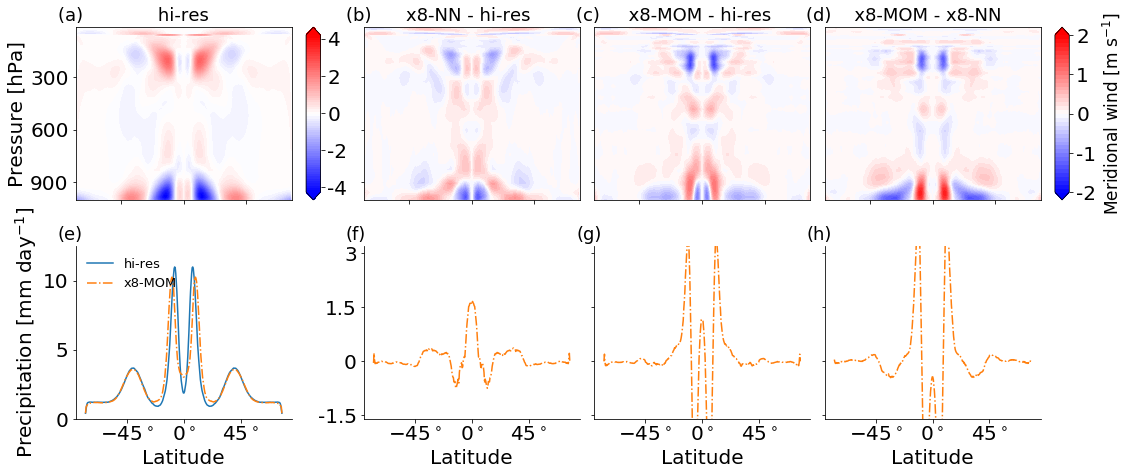

In [84]:
linewidth=1.5
plot_RMSE_plot_2_vars(x8_hires,x8_reference,x8_NN,x8_NN_mom,y,p)

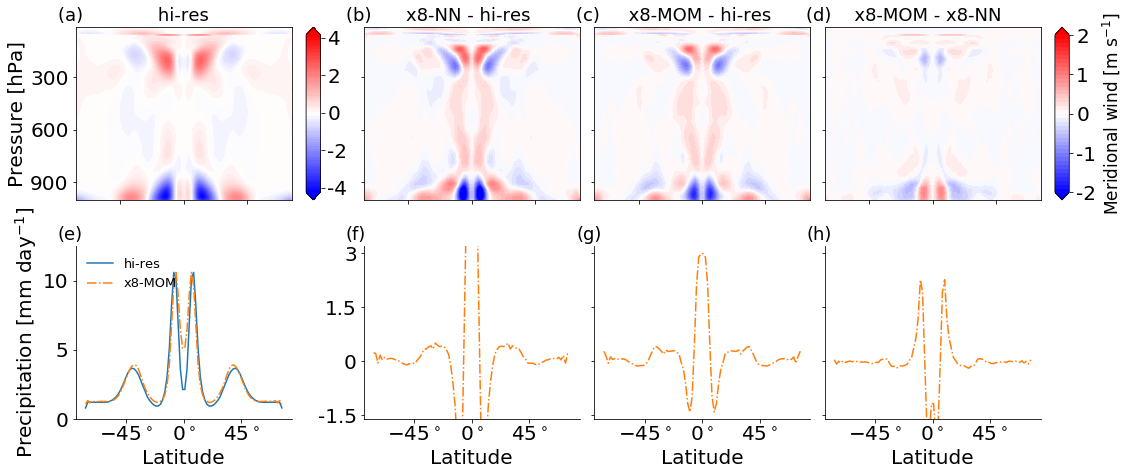

In [69]:
linewidth=1.5
plot_RMSE_plot_2_vars(x8_hires,x8_reference,x8_NN,x8_NN_mom,y,p)

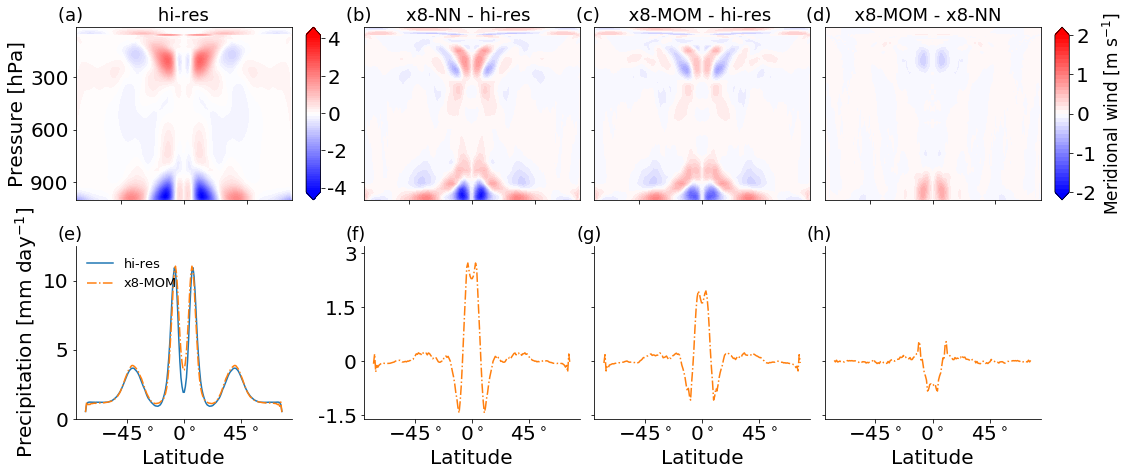

In [30]:
linewidth=1.5
plot_RMSE_plot_2_vars(x8_hires,x8_reference,x8_NN,x8_NN_mom,y,p)

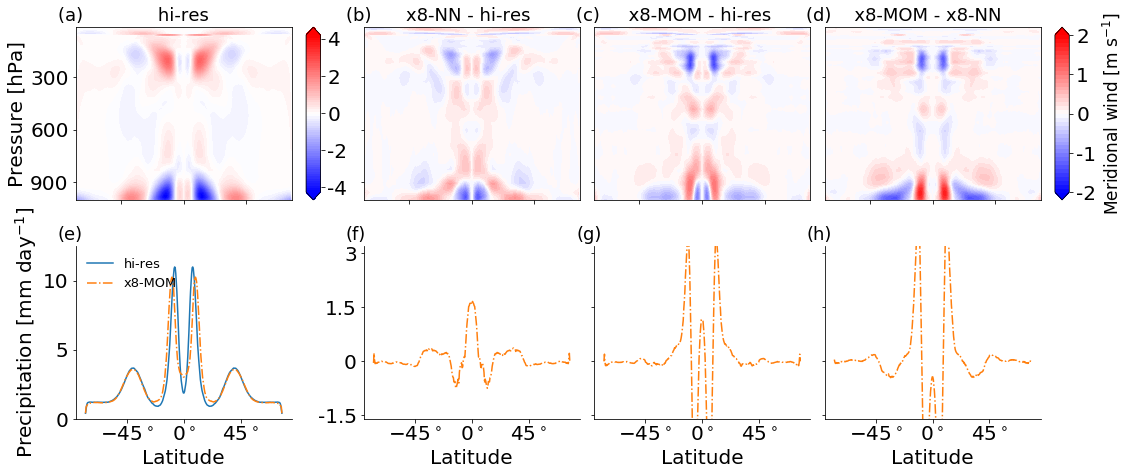

In [100]:
linewidth=1.5
plot_RMSE_plot_2_vars(x8_hires,x8_reference,x8_NN,x8_NN_mom,y,p)

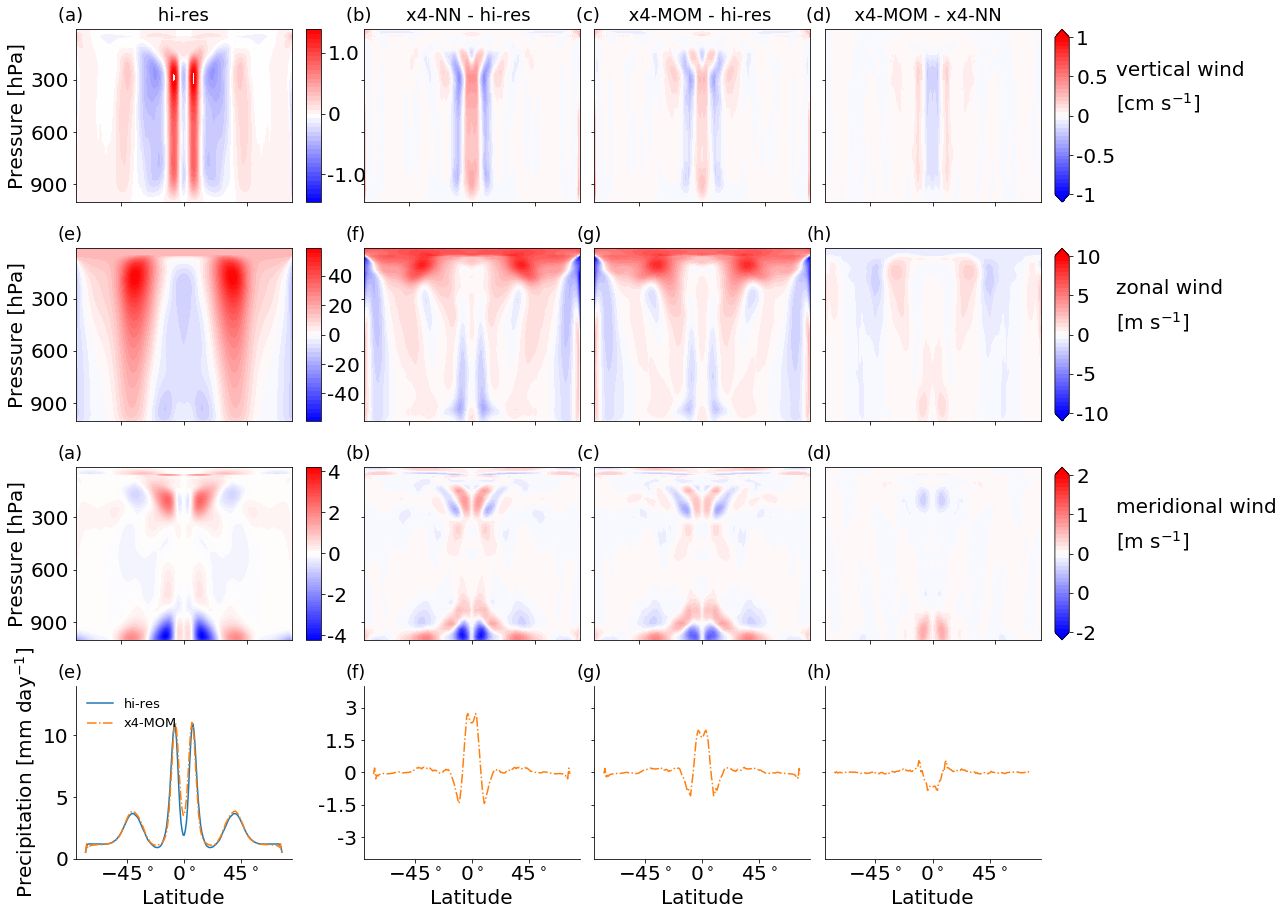

In [28]:
plot_RMSE_plot(x8_hires,x8_reference,x8_NN,x8_NN_mom,y,p)

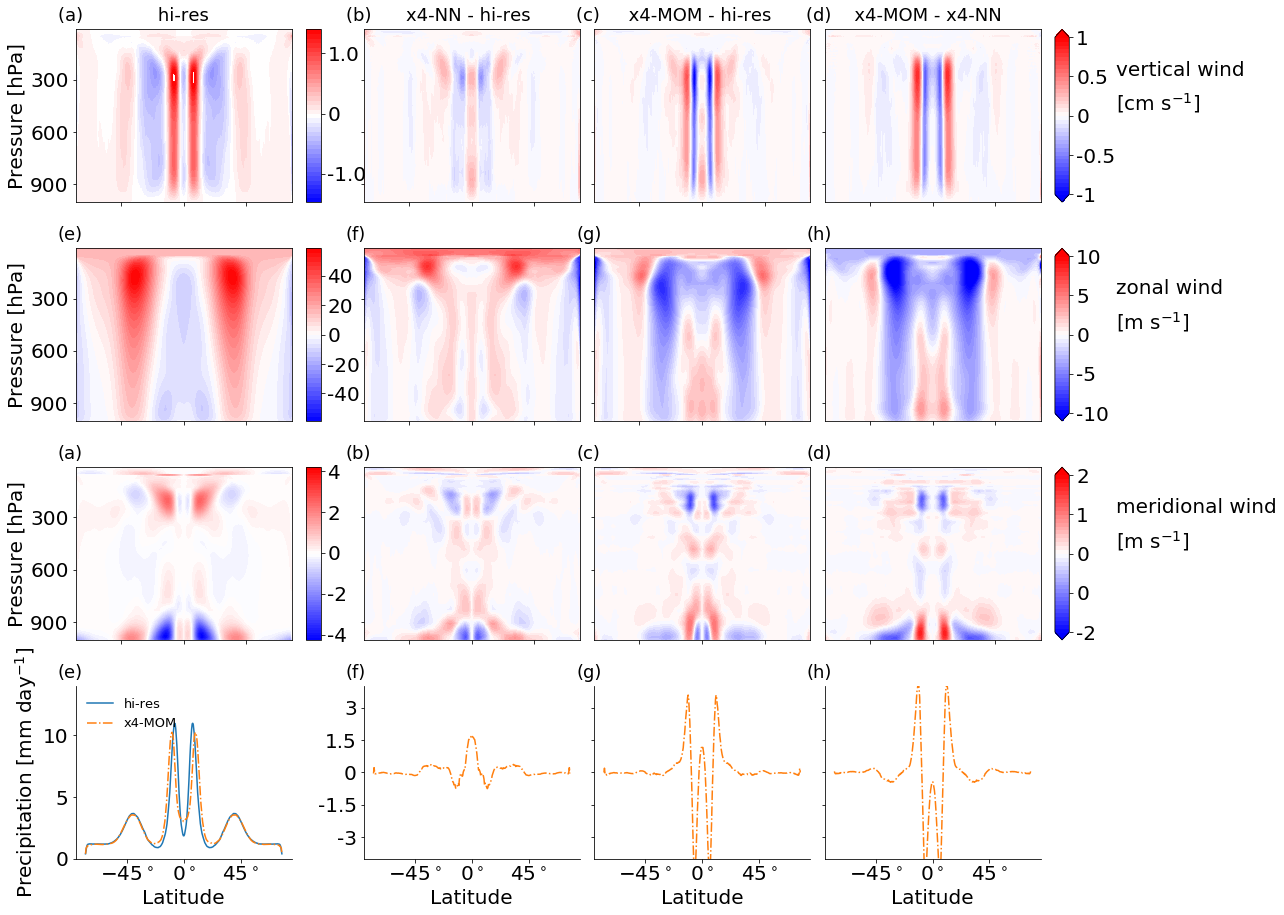

In [101]:
plot_RMSE_plot(x8_hires,x8_reference,x8_NN,x8_NN_mom,y,p)

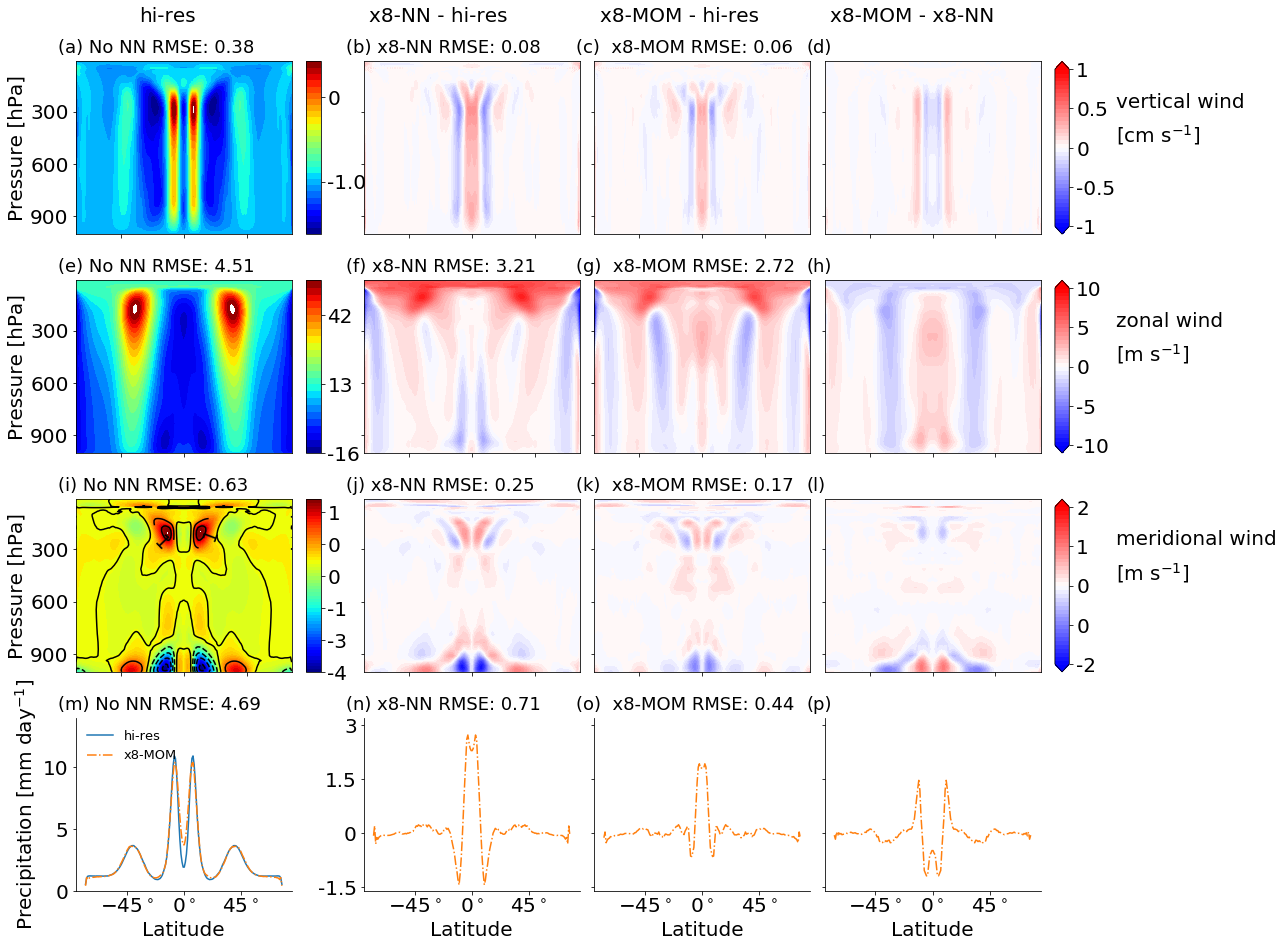

In [70]:
plot_RMSE_plot(x8_hires,x8_reference,x8_NN,x8_NN_mom,y,p)

In [86]:
from matplotlib import cm
def plot_RMSE_plot_W_U_STRM_EKE(dict_hires,dict_lowres,dict_NN,dict_NN_mom,y,p,fields_list=list()):
    fontsize = 20
    fontsize_cont1 = 19
    rescale_W = 100
    y_plot = (y - np.mean(y))/10**6

    x_ticks_lon = [-2,0,2]
    ticks_lat = [-5,0,5]
    ticks_press = [900,600,300]

    cont_min_dqp = -0.0004
    cont_max_dqp = 0.0004
    lev_dqp = np.arange(cont_min_dqp, cont_max_dqp, 0.00005)

    lev_Rsq = np.arange(-0.1, 1.01, 0.1)
    cont_min_rsq = 0
    cont_max_rsq = 1

    h_width = 0.1
    v_width = 0.1
    h_width_cbar = 0.02

    colorbar_width =0.02

    p_lev_rad = 26
    p_lev_diff = 15

    row_dim = 4
    col_dim = 4

    # field_to_plot = list()
    # field_to_plot.extend()

    fig_witdth = 0.3
    fig_height = 0.3
    fig_h_dist = 0.02
    fig_h_dist_first = 0.11
    fig_v_dist = 0.08

#     letters = ["(a) No NN RMSE: " + "{:.2f}".format(dict_lowres['W_RMSE']*rescale_W),"(b) x8-NN RMSE: "+ "{:.2f}".format(dict_NN['W_RMSE']*rescale_W),"(c)  x8-MOM RMSE: "+ "{:.2f}".format(dict_NN_mom['W_RMSE']*rescale_W),"(d)",
#                "(e) No NN RMSE: " + dict_lowres['U_RMSE_STR'],"(f) x8-NN RMSE: "+ dict_NN['U_RMSE_STR'],"(g)  x8-MOM RMSE: "+ dict_NN_mom['U_RMSE_STR'],"(h)",
#                "(i) No NN RMSE: " + dict_lowres['V_RMSE_STR'],"(j) x8-NN RMSE: "+ dict_NN['V_RMSE_STR'],"(k)  x8-MOM RMSE: "+ dict_NN_mom['V_RMSE_STR'],"(l)",
#                "(m) No NN RMSE: " + dict_lowres['PRECIP_RMSE_STR'],"(n) x8-NN RMSE: "+ dict_NN['PRECIP_RMSE_STR'],"(o)  x8-MOM RMSE: "+ dict_NN_mom['PRECIP_RMSE_STR'],"(p)"]
    letters = ["(a)             hi-res","(b)      x8-NN - hi-res","(c)     x8-MOM - hi-res","(d)    x8-MOM - x8-NN","(e)","(f)","(g)","(h)","(a)","(b)","(c)","(d)","(e)","(f)","(g)","(h)"]                
    # headers = ["EKE hi-res","EKE x8","EKE x8-RF",
    #            "Zonal wind hi-res","$u$ x8","$u$ x8-RF",
    #            "Meridional wind hi-res","$v$ x8","$v$ x8-RF",
    #            "$q_thi-res$","$q_v$ x8","$q_v$ x8-RF"]
#     headers = ["hi-res","x8-NN - hi-res"  ,"x8-MOM - hi-res", "x8-MOM - x8-NN"]
#                ,
#                 "","","","",
#                "","","","",
#                "","","",""]
#                "","RMSE:" +std_u1,"RMSE:" + std_u2,
#                "","RMSE:" + std_v1,"RMSE:" +std_v2,
#                 "","RMSE:" + std_stm_fc1,"RMSE:" + std_stm_fc2]
#     #            "","RMSE:" + std_q1,"RMSE:" + std_q2]

    num_of_levs = 20
    EKE_diff = 150# + 200/num_of_levs
    PRECIP_diff = 2
    U_diff = 10#+ 20/num_of_levs
    V_diff = 2#+ 5/num_of_levs
    W_diff = 0.006 * rescale_W #+ 5/num_of_levs 
    # QV_diff = 0.005#+ 0.01/num_of_levs
    QV_diff = 200#+ 0.01/num_of_levs
    STRM_diff = 10#+ 20/num_of_levs

    # num_of_levs = 20
    lev_EKE = np.arange(0, np.max(dict_hires['EKE']) + 100, np.max(dict_hires['EKE'])/num_of_levs)
    lev_EKE2 = np.arange(-EKE_diff,EKE_diff+0.001,EKE_diff/num_of_levs)
    print(np.max(dict_hires['U']))
    lev_U = np.arange(-np.max(dict_hires['U']), np.max(dict_hires['U'])+1, (np.max(dict_hires['U']))/num_of_levs)
    lev_U2 = np.arange(-U_diff,U_diff+0.001,U_diff/num_of_levs)

    STRM_scale = np.max(np.abs(dict_hires['STRM_FC']))
    print(STRM_scale)
    lev_STRM = np.arange(-STRM_scale,STRM_scale+0.001, STRM_scale/num_of_levs)
    lev_STRM2 = np.arange(-STRM_diff,STRM_diff+0.001,STRM_diff/num_of_levs)

    W_scale = np.max(np.abs(dict_hires['W']* rescale_W))
    lev_W = np.arange(-W_scale, W_scale, (W_scale)/num_of_levs)
    lev_W2 = np.arange(-W_diff,W_diff+0.001,W_diff/num_of_levs)
                    
#     lev_QV = np.arange(np.min(stm_fc_avg12km_sym), np.max(stm_fc_avg12km_sym), (np.max(stm_fc_avg12km_sym))/num_of_levs)
#     lev_QV2 = np.arange(-QV_diff,QV_diff+0.001,QV_diff/num_of_levs)




    fig, axes = plt.subplots(row_dim,col_dim,figsize=(10, 8))

    cmap11 = cm.bwr
    cmap12 = cm.jet

                                                                                   
    cax_W_1 = axes[0, 0].contourf(y_plot, p, dict_hires['W'].T*rescale_W,lev_W,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[0, 0].set_ylim(np.amax(p), np.amin(p))
    # plt.gca().invert_yaxis()

#     lev_W_cont =[-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
#     cax_q_Rsq = axes[0, 0].contour(y_plot, p, dict_hires['W'].T,lev_W_cont,colors='k')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
#     axes[0, 0].set_ylim(np.amax(p), np.amin(p))
    # axes[0,0].clabel(cax_q_Rsq,cax_q_Rsq.levels[::3],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)
#     axes[0,0].clabel(cax_q_Rsq,[0.5],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)
    # axes[0, 0].clabel(cax_q_Rsq,cax_q_Rsq.levels[::5], inline=1, fontsize=10)


    cax_T_Rsq = axes[0, 1].contourf(y_plot, p, (dict_NN['W'].T-dict_hires['W'].T)*rescale_W,lev_W2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[0, 1].set_ylim(np.amax(p), np.amin(p))


    cax_W = axes[0, 2].contourf(y_plot, p, (dict_NN_mom['W'].T-dict_hires['W'].T)*rescale_W,lev_W2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[0, 2].set_ylim(np.amax(p), np.amin(p))

    cax_W = axes[0, 3].contourf(y_plot, p, (dict_NN_mom['W'].T-dict_NN['W'].T)*rescale_W,lev_W2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[0, 3].set_ylim(np.amax(p), np.amin(p))
                                                                               
    cax_U_1 = axes[1, 0].contourf(y_plot, p, dict_hires['U'].T,lev_U,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[1, 0].set_ylim(np.amax(p), np.amin(p))
    # plt.gca().invert_yaxis()

#     lev_U_cont =np.arange(-70,70,10)# [0,100,200,300,400,500,600,700]
#     cax_q_Rsq = axes[1, 0].contour(y_plot, p, dict_hires['U'].T,lev_U_cont,colors='k')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
#     axes[1, 0].set_ylim(np.amax(p), np.amin(p))
    # axes[1,0].clabel(cax_q_Rsq,cax_q_Rsq.levels[::6],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)

#     axes[1,0].clabel(cax_q_Rsq,[20],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)

    cax_T_Rsq = axes[1, 1].contourf(y_plot, p, dict_NN['U'].T-dict_hires['U'].T,lev_U2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[0, 1].set_ylim(np.amax(p), np.amin(p))


    cax_U = axes[1, 2].contourf(y_plot, p, dict_NN_mom['U'].T-dict_hires['U'].T,lev_U2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[1, 2].set_ylim(np.amax(p), np.amin(p))

    cax_U = axes[1, 3].contourf(y_plot, p, dict_NN_mom['U'].T-dict_NN['U'].T,lev_U2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[1, 3].set_ylim(np.amax(p), np.amin(p))
                                                                               
    cax_STRM_1 = axes[2, 0].contourf(y_plot, p[:-1], dict_hires['STRM_FC'].T,lev_STRM,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[2, 0].set_ylim(np.amax(p), np.amin(p))
    # plt.gca().invert_yaxis()

    cax_T_Rsq = axes[2, 1].contourf(y_plot, p[:-1], dict_NN['STRM_FC'].T-dict_hires['STRM_FC'].T,lev_STRM2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[2, 1].set_ylim(np.amax(p), np.amin(p))

    cax_STRM = axes[2, 2].contourf(y_plot, p[:-1], dict_NN_mom['STRM_FC'].T-dict_hires['STRM_FC'].T,lev_STRM2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[2, 2].set_ylim(np.amax(p), np.amin(p))

    cax_STRM = axes[2, 3].contourf(y_plot, p[:-1], dict_NN_mom['STRM_FC'].T-dict_NN['STRM_FC'].T,lev_STRM2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[2, 3].set_ylim(np.amax(p), np.amin(p))


                        
    cax_EKE_1 = axes[3, 0].contourf(y_plot, p, dict_hires['EKE'].T,lev_EKE,cmap='Reds',extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[3, 0].set_ylim(np.amax(p), np.amin(p))
    # plt.gca().invert_yaxis()

    cax_T_Rsq = axes[3, 1].contourf(y_plot, p, dict_NN['EKE'].T-dict_hires['EKE'].T,lev_EKE2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[3, 1].set_ylim(np.amax(p), np.amin(p))

    cax_ELE = axes[3, 2].contourf(y_plot, p, dict_NN_mom['EKE'].T-dict_hires['EKE'].T,lev_EKE2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[3, 2].set_ylim(np.amax(p), np.amin(p))

    cax_EKE = axes[3, 3].contourf(y_plot, p, dict_NN_mom['EKE'].T-dict_NN['EKE'].T,lev_EKE2,cmap=cmap11,extend ='both')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
    axes[3, 3].set_ylim(np.amax(p), np.amin(p))

                        
    #Position of first figure        
    x0 = axes[0,0].get_position().x0
    x1 = axes[0,0].get_position().x1
    y0 = axes[0,0].get_position().y0
    y1 = axes[0,0].get_position().y1

    for i in range(row_dim):
        for j  in range(col_dim):
            if (i+1)*(j+1) > len(letters):
                continue
            if j > 0:
                axes[i,j].set_position([x0 + j*fig_witdth + j*fig_h_dist + fig_h_dist_first,y0- i*fig_height - i*fig_v_dist,fig_witdth,fig_height])
            else:
                axes[i,j].set_position([x0 + j*fig_witdth + j*fig_h_dist,y0- i*fig_height - i*fig_v_dist,fig_witdth,fig_height])



    i = 0
    j = 3 
#     lev_W2_ticks = [-1,-0.5,0,0.5,1]
    lev_W2_ticks = [-0.5,0,0.5]
    cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
    cbar_rsq = fig.colorbar(cax_W,cax = cbaxes_rsq,ticks=lev_W2_ticks,ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
#     lev_W2_ticks = [-0.01,0,0.01]
    cbar_rsq.set_ticklabels(lev_W2_ticks)
#     cbar_rsq.set_ticklabels(lev_W2[::10].astype(int))
    # cbar_rsq.set_label('[$m^2/s^2$]',fontsize=fontsize)
    cbar_rsq.ax.tick_params(labelsize=fontsize)


    i = 1
    j = 3 
    lev_U2_ticks = [-10,-5,0,5,10]
    cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
    cbar_rsq = fig.colorbar(cax_U,cax = cbaxes_rsq,ticks=lev_U2_ticks,ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
    cbar_rsq.set_ticklabels(lev_U2_ticks)
    # cbar_rsq.set_label('[$m/s$]',fontsize=fontsize)
    cbar_rsq.ax.tick_params(labelsize=fontsize)


    i = 2
    j = 3 
    lev_STRM2_ticks = [-10,-5,0,5,10]
    cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
    cbar_rsq = fig.colorbar(cax_STRM,cax = cbaxes_rsq,ticks=lev_STRM2_ticks,ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
    cbar_rsq.set_ticklabels(lev_STRM2_ticks)
    # cbar_rsq.set_label('[$m/s$]',fontsize=fontsize)
    cbar_rsq.ax.tick_params(labelsize=fontsize)

                        
    i = 3
    j = 3 
    lev_EKE_ticks = [-100,0,100]
    cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
    cbar_rsq = fig.colorbar(cax_EKE,cax = cbaxes_rsq,ticks=lev_EKE_ticks,ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
    cbar_rsq.set_ticklabels(lev_EKE_ticks)
    # cbar_rsq.set_label('[$m/s$]',fontsize=fontsize)
    cbar_rsq.ax.tick_params(labelsize=fontsize)

        
    i = 0
    j = 0 
#     lev_W2_ticks = [-4,-2,0,2,4]
    lev_W2_ticks = [-1,-0.5,0,0.5,1]
    cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
    cbar_rsq = fig.colorbar(cax_W_1,cax = cbaxes_rsq,ticks=lev_W2_ticks,ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
#     lev_W2_ticks = [-0.01,0,0.01]
    cbar_rsq.set_ticklabels(lev_W2_ticks)
#     cbar_rsq.set_ticklabels(lev_W2[::10].astype(int))
    # cbar_rsq.set_label('[$m^2/s^2$]',fontsize=fontsize)
    cbar_rsq.ax.tick_params(labelsize=fontsize)

    
    i = 1
    j = 0
    lev_U2_ticks = [-40,-20,0,20,40]
    cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
    cbar_rsq = fig.colorbar(cax_U_1,cax = cbaxes_rsq,ticks=lev_U2_ticks,ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
    cbar_rsq.set_ticklabels(lev_U2_ticks)
    # cbar_rsq.set_label('[$m/s$]',fontsize=fontsize)
    cbar_rsq.ax.tick_params(labelsize=fontsize)

    i = 2
    j = 0 
    lev_STRM_ticks = [-40,-20,0,20,40]
    cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
    cbar_rsq = fig.colorbar(cax_STRM_1,cax = cbaxes_rsq,ticks=lev_STRM_ticks,ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
    cbar_rsq.set_ticklabels(lev_STRM_ticks)
    # cbar_rsq.set_label('[$m/s$]',fontsize=fontsize)
    cbar_rsq.ax.tick_params(labelsize=fontsize)

    i = 3
    j = 0 
    lev_EKE_ticks = [0,400,800]
    cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
    cbar_rsq = fig.colorbar(cax_EKE_1,cax = cbaxes_rsq,ticks=lev_EKE_ticks,ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
    cbar_rsq.set_ticklabels(lev_EKE_ticks)
    # cbar_rsq.set_label('[$m/s$]',fontsize=fontsize)
    cbar_rsq.ax.tick_params(labelsize=fontsize)

    # i = 3
    # j = 2 
    # cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
    # cbar_rsq = fig.colorbar(cax_QV,cax = cbaxes_rsq,ticks=np.arange(-0.01,0.01+0.000001,0.01),ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
    # cbar_rsq.set_ticklabels(np.arange(-1,1+0.000001,1).astype(int))
    # # cbar_rsq.set_label('[$kg/kg$]$x10^{-2}$',fontsize=fontsize)
    # cbar_rsq.ax.tick_params(labelsize=fontsize)

#     i = 3
#     j = 2 
#     cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
#     cbar_rsq = fig.colorbar(cax_QV,cax = cbaxes_rsq,ticks=np.arange(-200,200+0.000001,100),ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
#     cbar_rsq.set_ticklabels(np.arange(-200,200+0.000001,100).astype(int))
#     # cbar_rsq.set_label('[$kg/kg$]$x10^{-2}$',fontsize=fontsize)
#     cbar_rsq.ax.tick_params(labelsize=fontsize)


    j = 3.1
    atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.72+ j*fig_witdth + j*fig_h_dist-0.03,axes[0,0].get_position().y0 + (1.0)*fig_height - (i-1)*fig_v_dist ,'Vertical wind',transform = fig.transFigure,color="black",fontsize=fontsize)
    atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.72+ j*fig_witdth + j*fig_h_dist-0.03,axes[0,0].get_position().y0 +(0.8)*fig_height - (i-1)*fig_v_dist ,r'[cm s$^{-1}$]',transform = fig.transFigure,color="black",fontsize=fontsize)

    atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.72+ j*fig_witdth + j*fig_h_dist-0.03,axes[1,0].get_position().y0 + (1.0)*fig_height - (i-1)*fig_v_dist ,'Zonal wind',transform = fig.transFigure,color="black",fontsize=fontsize)
    atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.72+ j*fig_witdth + j*fig_h_dist-0.03,axes[1,0].get_position().y0 +(0.8)*fig_height - (i-1)*fig_v_dist ,r'[m s$^{-1}$]',transform = fig.transFigure,color="black",fontsize=fontsize)

    atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.72+ j*fig_witdth + j*fig_h_dist-0.03,axes[2,0].get_position().y0 + (1.0)*fig_height - (i-1)*fig_v_dist ,'Streamfunction',transform = fig.transFigure,color="black",fontsize=fontsize)
    atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.72+ j*fig_witdth + j*fig_h_dist-0.03,axes[2,0].get_position().y0 +(0.8)*fig_height - (i-1)*fig_v_dist ,r'[kg m$^{-1}$ s$^{-1}$]',transform = fig.transFigure,color="black",fontsize=fontsize)

    atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.72+ j*fig_witdth + j*fig_h_dist-0.03,axes[3,0].get_position().y0 + (1.0)*fig_height - (i-1)*fig_v_dist ,'EKE',transform = fig.transFigure,color="black",fontsize=fontsize)
    atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.72+ j*fig_witdth + j*fig_h_dist-0.03,axes[3,0].get_position().y0 +(0.8)*fig_height - (i-1)*fig_v_dist ,r'[m$^{2}$ s$^{-2}$]',transform = fig.transFigure,color="black",fontsize=fontsize)

    # atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[3,0].get_position().y0 + (1.1)*fig_height - (i-1)*fig_v_dist ,'non-precipitating water',transform = fig.transFigure,color="black",fontsize=fontsize)
    # atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[3,0].get_position().y0 +(0.9)*fig_height - (i-1)*fig_v_dist ,'[kg/kg x$10^{-2}$]',transform = fig.transFigure,color="black",fontsize=fontsize)


#     atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[3,0].get_position().y0 + (1.1)*fig_height - (i-1)*fig_v_dist ,'mass streamfunction',transform = fig.transFigure,color="black",fontsize=fontsize)
#     atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[3,0].get_position().y0 +(0.9)*fig_height - (i-1)*fig_v_dist ,'[hPa m/s]',transform = fig.transFigure,color="black",fontsize=fontsize)


    rescale_let_pos = 0.8
    lat_pos = min(y_plot)*(rescale_let_pos*1.1)
    # lon_pos = max(x_plot)*rescale_let_pos
    press_pos = 150
    press_pos2 = 300


    ind_let = 0
    for i in range(row_dim):
        for j  in range(col_dim):
            if (i+1)*(j+1) > len(letters):
                continue
            if j > 0:
                atext2 = axes[i, j].text(axes[0,0].get_position().x0*0.8+ j*fig_witdth + j*fig_h_dist+fig_h_dist_first,axes[0,0].get_position().y0*1.02- (i-1)*fig_height - i*fig_v_dist ,letters[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize-2)
            else:
                atext2 = axes[i, j].text(axes[0,0].get_position().x0*0.8+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*1.02- (i-1)*fig_height - i*fig_v_dist ,letters[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize-2)

#             header= axes[i, j].text(axes[0,0].get_position().x0*1.1+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*0.9- (i-1)*fig_height - (i-1)*fig_v_dist ,headers[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize)
            ind_let = ind_let + 1


    axes[2, 0].set_xlim(np.amin(y_plot), np.amax(y_plot))


    axes[0, 0].set_ylabel('Pressure [hPa]',fontsize=fontsize)
    axes[1, 0].set_ylabel('Pressure [hPa]',fontsize=fontsize)
    axes[2, 0].set_ylabel('Pressure [hPa]',fontsize=fontsize)
    axes[3, 0].set_ylabel('Pressure [hPa]',fontsize=fontsize)



    axes[3, 0].set_xlabel('Latitude',fontsize=fontsize)
    axes[3, 1].set_xlabel('Latitude',fontsize=fontsize)
    axes[3, 2].set_xlabel('Latitude',fontsize=fontsize)
    axes[3, 3].set_xlabel('Latitude',fontsize=fontsize)



    #Ticks and tick labels
    ticks_press_R2 = [0.2,0.4,0.6]
    ticks_lat_degrees = ['$-45^\circ$','$0^\circ$','$45^\circ$']
    axes[2, 0].set_yticks(ticks_press)
    axes[2, 0].set_yticklabels(ticks_press,fontsize=fontsize)
    axes[2, 1].set_yticks(ticks_press)
    axes[2, 1].set_yticklabels([])
    axes[2, 2].set_yticks(ticks_press)
    axes[2, 2].set_yticklabels([])

    axes[3, 0].set_yticks(ticks_press)
    axes[3, 0].set_yticklabels(ticks_press,fontsize=fontsize)
    axes[3, 1].set_yticks(ticks_press)
    axes[3, 1].set_yticklabels([])
    axes[3, 2].set_yticks(ticks_press)
    axes[3, 2].set_yticklabels([])


    axes[0, 2].set_yticks(ticks_press)
    axes[0, 2].set_yticklabels([])

    axes[1, 2].set_yticks(ticks_press)
    axes[1, 2].set_yticklabels([])
    
    axes[1, 3].set_yticks(ticks_press)
    axes[1, 3].set_yticklabels([])
    axes[0, 3].set_yticks(ticks_press)
    axes[0, 3].set_yticklabels([])
    axes[2, 3].set_yticks(ticks_press)
    axes[2, 3].set_yticklabels([])
    axes[3, 3].set_yticks(ticks_press)
    axes[3, 3].set_yticklabels([])


    axes[3, 0].set_xticks(ticks_lat)
    axes[3, 0].set_xticklabels(ticks_lat_degrees,fontsize=fontsize)
    axes[3, 1].set_xticks(ticks_lat)
    axes[3, 1].set_xticklabels(ticks_lat_degrees,fontsize=fontsize)
    axes[3, 2].set_xticks(ticks_lat)
    axes[3, 2].set_xticklabels(ticks_lat_degrees,fontsize=fontsize)
    axes[3, 3].set_xticks(ticks_lat)
    axes[3, 3].set_xticklabels(ticks_lat_degrees,fontsize=fontsize)


    # axes[2, 1].set_xticks(ticks_lat)
    # axes[2, 1].set_xticklabels(ticks_lat,fontsize=fontsize)
    # axes[2, 1].set_yticks(x_ticks_lon)
    # axes[2, 1].set_yticklabels([])
    # axes[0, 0].set_xticks(ticks_lat)
    # axes[0, 0].set_xticklabels(ticks_lat,fontsize=fontsize)

    axes[1, 0].set_xticks(ticks_lat)
    axes[1, 0].set_xticklabels([])
    axes[0, 0].set_yticks(ticks_press)
    axes[0, 0].set_yticklabels(ticks_press,fontsize=fontsize)
    axes[0, 0].set_xticks(ticks_lat)
    axes[0, 0].set_xticklabels([])



    axes[2, 0].set_xticks(ticks_lat)
    axes[2, 0].set_xticklabels([])
    axes[2, 1].set_xticks(ticks_lat)
    axes[2, 1].set_xticklabels([])
    axes[2, 2].set_xticks(ticks_lat)
    axes[2, 2].set_xticklabels([])
    axes[2, 3].set_xticks(ticks_lat)
    axes[2, 3].set_xticklabels([])

    axes[1, 0].set_xticks(ticks_lat)
    axes[1, 0].set_xticklabels([])
    axes[1, 1].set_xticks(ticks_lat)
    axes[1, 1].set_xticklabels([])
    axes[1, 2].set_xticks(ticks_lat)
    axes[1, 2].set_xticklabels([])
    axes[1, 3].set_xticks(ticks_lat)
    axes[1, 3].set_xticklabels([])

    axes[0, 0].set_xticks(ticks_lat)
    axes[0, 0].set_xticklabels([])
    axes[0, 1].set_xticks(ticks_lat)
    axes[0, 1].set_xticklabels([])
    axes[0, 2].set_xticks(ticks_lat)
    axes[0, 2].set_xticklabels([])
    axes[0, 3].set_xticks(ticks_lat)
    axes[0, 3].set_xticklabels([])



    axes[1, 0].set_yticks(ticks_press)
    axes[1, 0].set_yticklabels(ticks_press,fontsize=fontsize)
    axes[1, 1].set_xticklabels([])
    axes[1, 1].set_xticks(ticks_lat)
    axes[1, 1].set_yticks(ticks_press)
    axes[1, 1].set_yticklabels([])
    axes[0, 1].set_xticks(ticks_lat)
    axes[0, 1].set_xticklabels([])
    axes[0, 1].set_yticks(ticks_press)
    axes[0, 1].set_yticklabels([])



    # axes[2,0].spines["top"].set_visible(False)
    # axes[2,0].spines["right"].set_visible(False)

    # axes[2,1].spines["top"].set_visible(False)
    # axes[2,1].spines["right"].set_visible(False)

    for i in range(row_dim-1):
        for j  in range(col_dim):
            axes[i, j].set_ylim(np.amax(p), np.amin(p))


#     i = 0
#     j = 0
#     ind_let = 0
#     header= axes[i, j].text(axes[0,0].get_position().x0*1.7+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*0.9- (i-1)*fig_height*1.2 - (i-1)*fig_v_dist ,headers[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize)
#     j = 1
#     ind_let = 1
#     header= axes[i, j].text(axes[0,0].get_position().x0*1.7+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*0.9- (i-1)*fig_height*1.2 - (i-1)*fig_v_dist ,headers[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize)
#     j = 2
#     ind_let = 2
#     header= axes[i, j].text(axes[0,0].get_position().x0*1.7+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*0.9- (i-1)*fig_height*1.2 - (i-1)*fig_v_dist ,headers[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize)

#     j = 3
#     ind_let = 3
#     header= axes[i, j].text(axes[0,0].get_position().x0*1.7+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*0.9- (i-1)*fig_height*1.2 - (i-1)*fig_v_dist ,headers[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize)
    
    #Saving plot... f
    save_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/Latex_paper/plots/'

#     plt.savefig(save_path+'online_x8_NN_W_U_STRM_EKE.eps', format='eps', bbox_inches="tight")
#     plt.savefig(save_path+'online_x16_NN_W_U_STRM_EKE_4_5_layers.eps', format='eps', bbox_inches="tight")
#     plt.savefig(save_path+'online_x16_NN_W_U_STRM_EKE_4_layers_both.eps', format='eps', bbox_inches="tight")
    plt.savefig(save_path+'online_x4_NN_W_U_STRM_EKE.eps', format='eps', bbox_inches="tight")

58.78457719661193
45.43018973770398


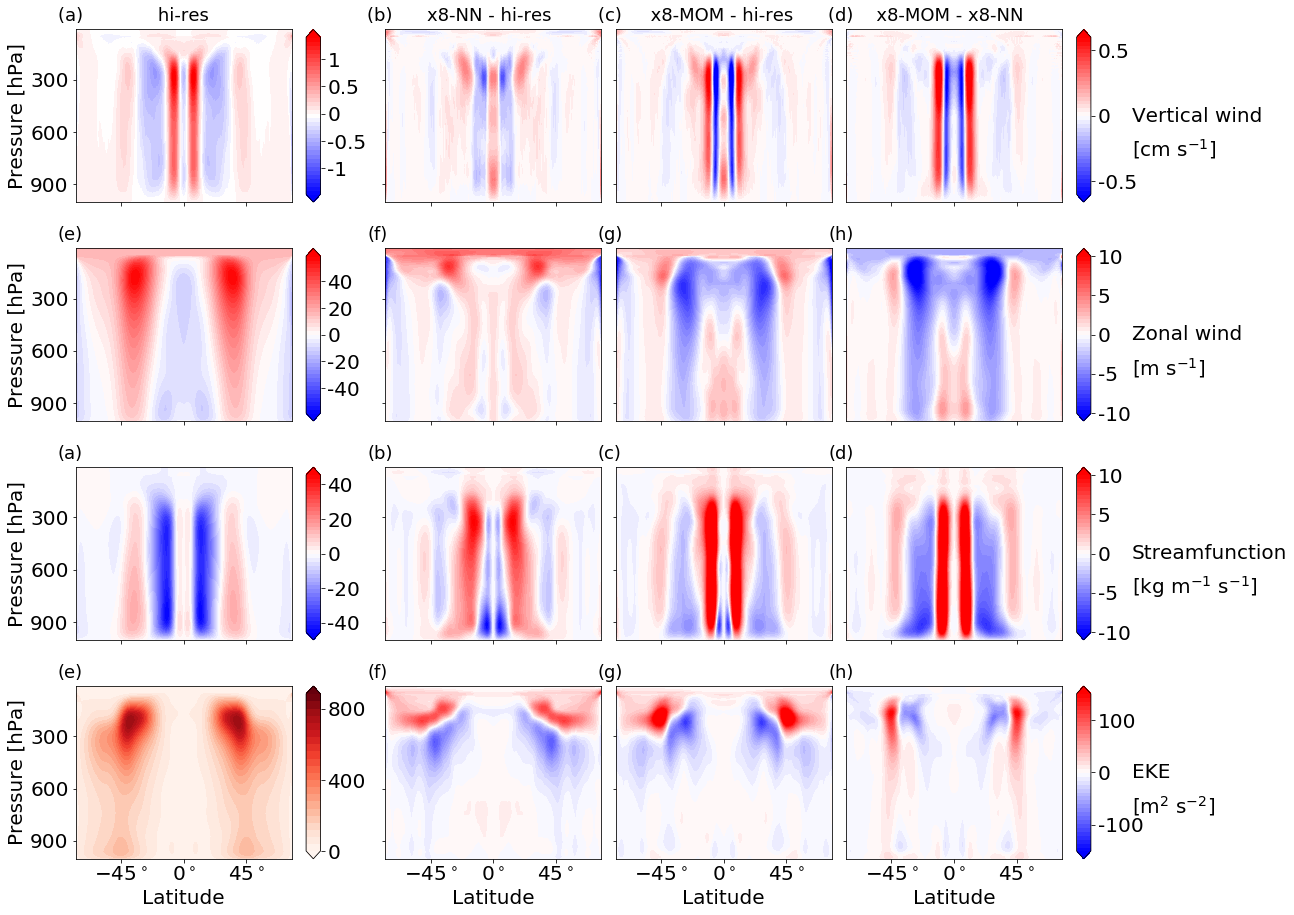

In [87]:
plot_RMSE_plot_W_U_STRM_EKE(x8_hires,x8_reference,x8_NN,x8_NN_mom,y,p)

58.603300559096056
44.63338827941072


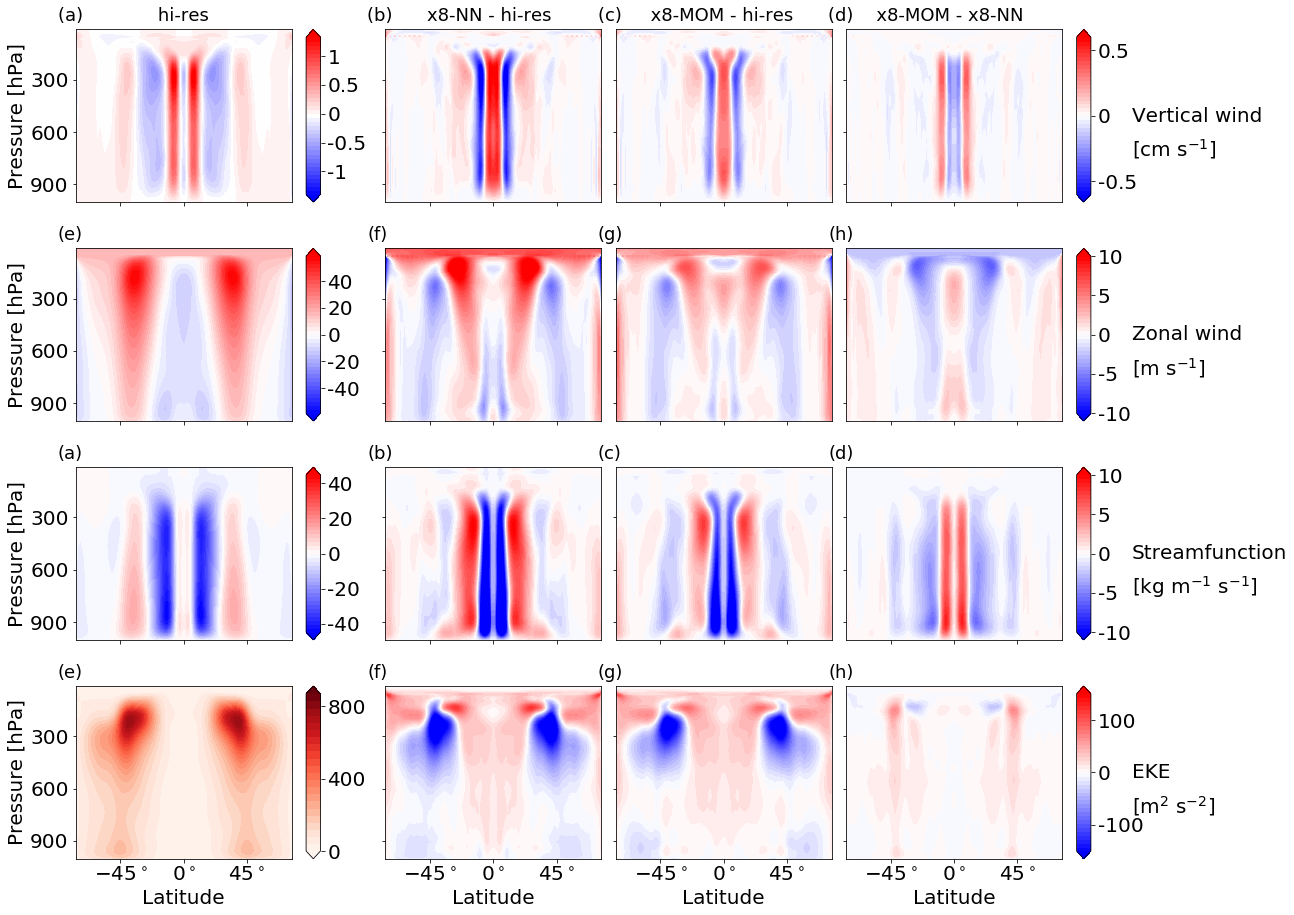

In [71]:
plot_RMSE_plot_W_U_STRM_EKE(x8_hires,x8_reference,x8_NN,x8_NN_mom,y,p)

58.78457719661193
45.43018973770398


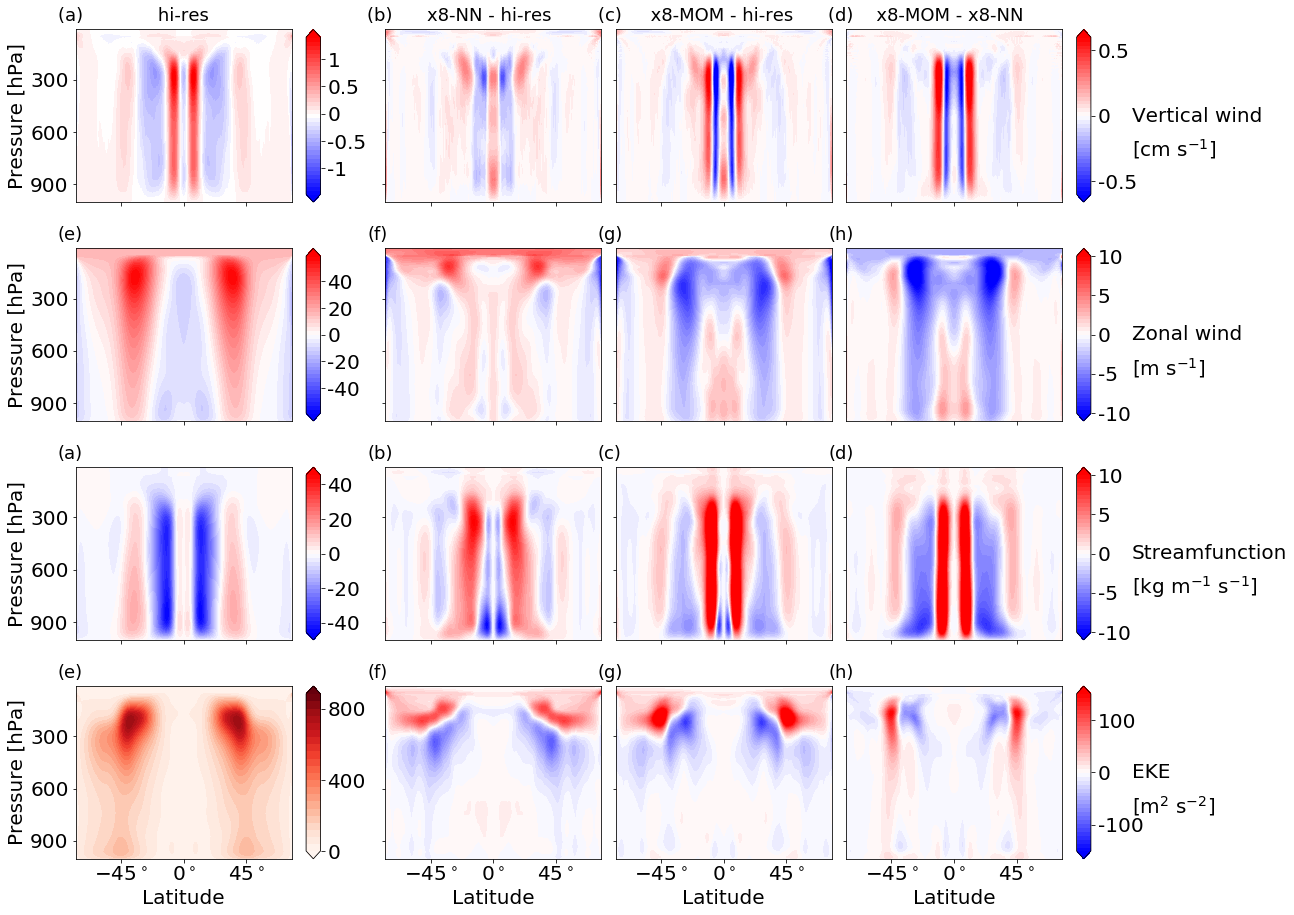

In [69]:
plot_RMSE_plot_W_U_STRM_EKE(x8_hires,x8_reference,x8_NN,x8_NN_mom,y,p)

58.77269171317057
45.229629467973325


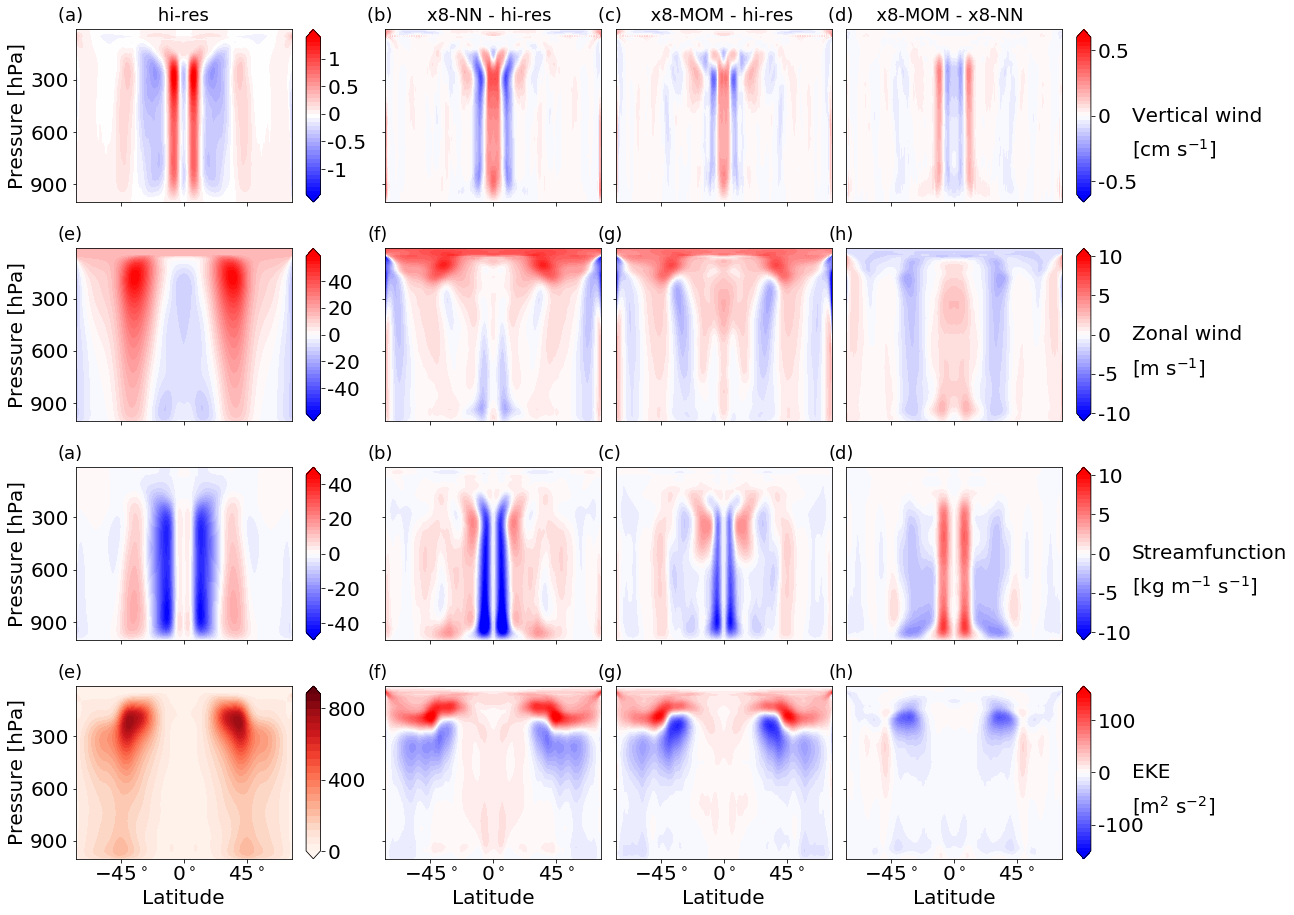

In [138]:
plot_RMSE_plot_W_U_STRM_EKE(x8_hires,x8_reference,x8_NN,x8_NN_mom,y,p)

# Check the shear in the tropics... 

In [127]:
dU1 = x8_hires['U'][:,:-1] - x8_hires['U'][:,1:]
# dU1 = x8_hires['V'][:,:-1] - x8_hires['V'][:,1:]
dz1 = z[:-1] - z[1:]
dU_dz = dU1/dz1[None,:]

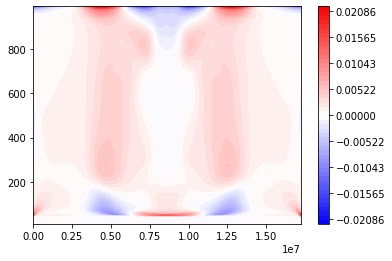

In [128]:
field = dU_dz
range11 = np.max(np.abs(field))
n =50
levels = np.linspace(-range11, range11, n+1)
img = plt.contourf(y[:],p[1:],field.T,levels = levels,cmap=cm.bwr)
plt.colorbar(img)
# plt.plot(precip11[45,10,:])

In [342]:
p[35]

83.40012

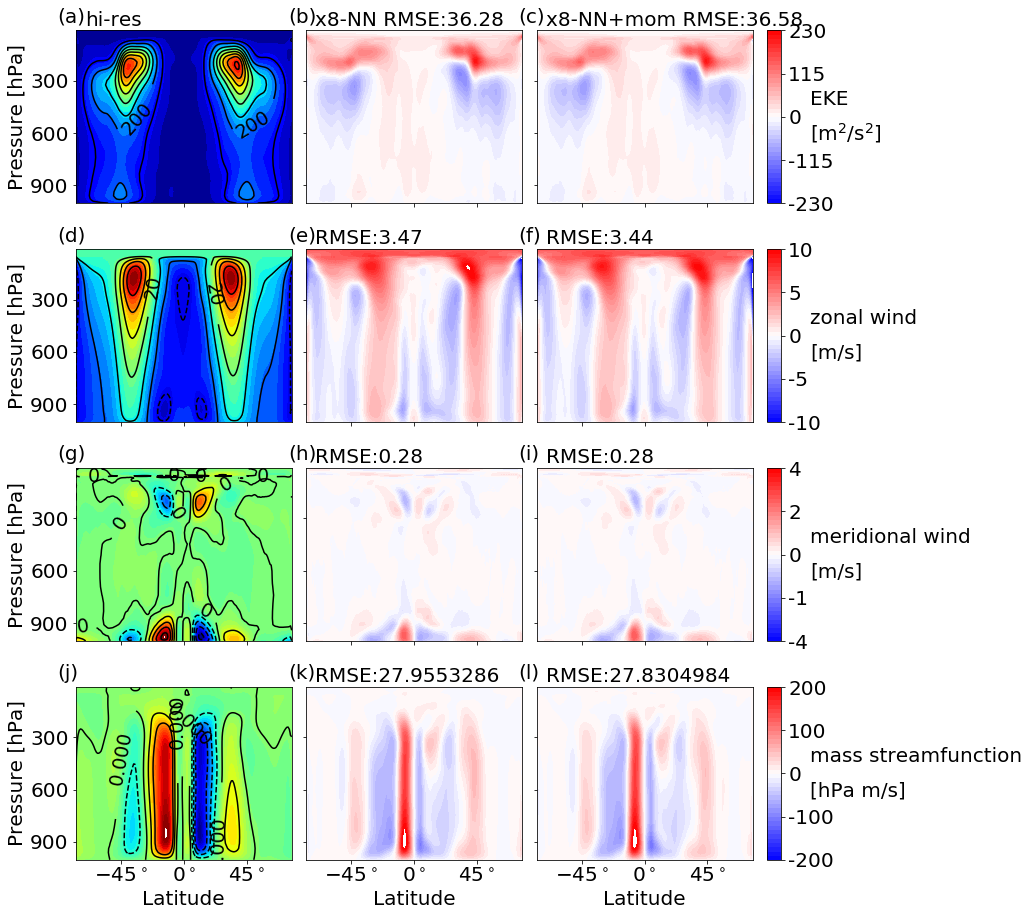

In [338]:
from matplotlib import cm
fontsize = 20
fontsize_cont1 = 19

y_plot = (y - np.mean(y))/10**6

x_ticks_lon = [-2,0,2]
ticks_lat = [-5,0,5]
ticks_press = [900,600,300]

cont_min_dqp = -0.0004
cont_max_dqp = 0.0004
lev_dqp = np.arange(cont_min_dqp, cont_max_dqp, 0.00005)

lev_Rsq = np.arange(-0.1, 1.01, 0.1)
cont_min_rsq = 0
cont_max_rsq = 1

h_width = 0.1
v_width = 0.1
h_width_cbar = 0.02

colorbar_width =0.02

p_lev_rad = 26
p_lev_diff = 15

row_dim = 4
col_dim = 3

# field_to_plot = list()
# field_to_plot.extend()

fig_witdth = 0.3
fig_height = 0.3
fig_h_dist = 0.02
fig_v_dist = 0.08

letters = ["(a)","(b)","(c)","(d)","(e)","(f)","(g)","(h)","(i)","(j)","(k)","(l)"]
# headers = ["EKE hi-res","EKE x8","EKE x8-RF",
#            "Zonal wind hi-res","$u$ x8","$u$ x8-RF",
#            "Meridional wind hi-res","$v$ x8","$v$ x8-RF",
#            "$q_thi-res$","$q_v$ x8","$q_v$ x8-RF"]
headers = ["hi-res","x8-NN RMSE:" + std_eke1  ,"x8-NN+mom RMSE:"+std_eke2,
           "","RMSE:" +std_u1,"RMSE:" + std_u2,
           "","RMSE:" + std_v1,"RMSE:" +std_v2,
            "","RMSE:" + std_stm_fc1,"RMSE:" + std_stm_fc2]
#            "","RMSE:" + std_q1,"RMSE:" + std_q2]

num_of_levs = 20
EKE_diff = 230# + 200/num_of_levs
U_diff = 10#+ 20/num_of_levs
V_diff = 4#+ 5/num_of_levs
# QV_diff = 0.005#+ 0.01/num_of_levs
QV_diff = 200#+ 0.01/num_of_levs


# num_of_levs = 20
lev_EKE = np.arange(0, np.max(eke_avg12km_sym) + 100, (np.max(eke_avg12km_sym))/num_of_levs)
lev_EKE2 = np.arange(-EKE_diff,EKE_diff+0.001,EKE_diff/num_of_levs)
lev_U = np.arange(np.min(u_avg12km_sym), np.max(u_avg12km_sym)+1, (np.max(u_avg12km_sym))/num_of_levs)
lev_U2 = np.arange(-U_diff,U_diff+0.001,U_diff/num_of_levs)
lev_V = np.arange(np.min(v_avg12km_sym), np.max(v_avg12km_sym), (np.max(v_avg12km_sym))/num_of_levs)
lev_V2 = np.arange(-V_diff,V_diff+0.001,V_diff/num_of_levs)
# lev_QV = np.arange(np.min(qv_avg12km_sym), np.max(qv_avg12km_sym), (np.max(qv_avg12km_sym))/num_of_levs)
# lev_QV2 = np.arange(-QV_diff,QV_diff+0.0000001,QV_diff/num_of_levs)

lev_QV = np.arange(np.min(stm_fc_avg12km_sym), np.max(stm_fc_avg12km_sym), (np.max(stm_fc_avg12km_sym))/num_of_levs)
lev_QV2 = np.arange(-QV_diff,QV_diff+0.001,QV_diff/num_of_levs)



 
fig, axes = plt.subplots(row_dim,col_dim,figsize=(10, 8))

cmap11 = cm.bwr

cax_q_Rsq = axes[0, 0].contourf(y_plot, p, eke_avg12km_sym.T,lev_EKE,cmap=cm.jet)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[0, 0].set_ylim(np.amax(p), np.amin(p))
# plt.gca().invert_yaxis()

lev_EKE_cont =np.arange(0,1300,100)# [0,100,200,300,400,500,600,700]
cax_q_Rsq = axes[0, 0].contour(y_plot, p, eke_avg12km_sym.T,lev_EKE_cont,colors='k')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[0, 0].set_ylim(np.amax(p), np.amin(p))
# axes[0,0].clabel(cax_q_Rsq,cax_q_Rsq.levels[::3],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)
axes[0,0].clabel(cax_q_Rsq,[200],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)
# axes[0, 0].clabel(cax_q_Rsq,cax_q_Rsq.levels[::5], inline=1, fontsize=10)


cax_T_Rsq = axes[0, 1].contourf(y_plot, p, eke_avg192km_sym.T-eke_avg12km_sym.T,lev_EKE2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[0, 1].set_ylim(np.amax(p), np.amin(p))


cax_EKE = axes[0, 2].contourf(y_plot, p, eke_rf_sym.T-eke_avg12km_sym.T,lev_EKE2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[0, 2].set_ylim(np.amax(p), np.amin(p))

cax_q_Rsq = axes[1, 0].contourf(y_plot, p, u_avg12km_sym.T,lev_U,cmap=cm.jet)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[1, 0].set_ylim(np.amax(p), np.amin(p))
# plt.gca().invert_yaxis()

lev_U_cont =np.arange(-70,70,10)# [0,100,200,300,400,500,600,700]
cax_q_Rsq = axes[1, 0].contour(y_plot, p, u_avg12km_sym.T,lev_U_cont,colors='k')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[1, 0].set_ylim(np.amax(p), np.amin(p))
# axes[1,0].clabel(cax_q_Rsq,cax_q_Rsq.levels[::6],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)

axes[1,0].clabel(cax_q_Rsq,[20],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)

cax_T_Rsq = axes[1, 1].contourf(y_plot, p, u_avg192km_sym.T-u_avg12km_sym.T,lev_U2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[0, 1].set_ylim(np.amax(p), np.amin(p))


cax_U = axes[1, 2].contourf(y_plot, p, u_rf_sym.T-u_avg12km_sym.T,lev_U2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[1, 2].set_ylim(np.amax(p), np.amin(p))

cax_q_Rsq = axes[2, 0].contourf(y_plot, p, v_avg12km_sym.T,lev_V,cmap=cm.jet)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[2, 0].set_ylim(np.amax(p), np.amin(p))
# plt.gca().invert_yaxis()

lev_V_cont =np.arange(-6,7,1)
cax_q_Rsq = axes[2, 0].contour(y_plot, p, v_avg12km_sym.T,lev_V_cont,colors='k')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[2, 0].set_ylim(np.amax(p), np.amin(p))
# axes[2,0].clabel(cax_q_Rsq,[3],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)
axes[2,0].clabel(cax_q_Rsq,[0],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)
# axes[2,0].clabel(cax_q_Rsq,cax_q_Rsq.levels[::3],fmt = '%1.0f', inline=1, fontsize=10)


cax_T_Rsq = axes[2, 1].contourf(y_plot, p, v_avg192km_sym.T-v_avg12km_sym.T,lev_V2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[2, 1].set_ylim(np.amax(p), np.amin(p))

cax_V = axes[2, 2].contourf(y_plot, p, v_rf_sym.T-v_avg12km_sym.T,lev_V2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[2, 2].set_ylim(np.amax(p), np.amin(p))

cax_q_Rsq = axes[3, 0].contourf(y_plot, p[:-1], stm_fc_avg12km_sym.T,lev_QV,cmap=cm.jet)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[3, 0].set_ylim(np.amax(p), np.amin(p))
# plt.gca().invert_yaxis()

# lev_QV_cont =np.arange(0,0.03,0.002)
# cax_q_Rsq = axes[3, 0].contour(y_plot, p, qv_avg12km_sym.T,lev_QV_cont,colors='k')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
# axes[3, 0].set_ylim(np.amax(p), np.amin(p))
# axes[3,0].clabel(cax_q_Rsq,cax_q_Rsq.levels[::3], inline=1, fontsize=fontsize_cont1)



# cax_T_Rsq = axes[3, 1].contourf(y_plot, p, qv_avg192km_sym.T-qv_avg12km_sym.T,lev_QV2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
# axes[3, 1].set_ylim(np.amax(p), np.amin(p))

# cax_QV = axes[3, 2].contourf(y_plot, p, qv_rf_sym.T-qv_avg12km_sym.T,lev_QV2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
# axes[3, 2].set_ylim(np.amax(p), np.amin(p))

lev_QV_cont =np.arange(-300,300,100)
cax_q_Rsq = axes[3, 0].contour(y_plot, p[:-1], stm_fc_avg12km_sym.T,lev_QV_cont,colors='k')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[3, 0].set_ylim(np.amax(p), np.amin(p))
axes[3,0].clabel(cax_q_Rsq,cax_q_Rsq.levels[::3], inline=1, fontsize=fontsize_cont1)


cax_T_Rsq = axes[3, 1].contourf(y_plot, p[:-1], stm_fc_avg192km_sym.T-stm_fc_avg12km_sym.T,lev_QV2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[3, 1].set_ylim(np.amax(p), np.amin(p))

cax_QV = axes[3, 2].contourf(y_plot, p[:-1], stm_fc_rf_sym.T-stm_fc_avg12km_sym.T,lev_QV2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[3, 2].set_ylim(np.amax(p), np.amin(p))




        
#Position of first figure        
x0 = axes[0,0].get_position().x0
x1 = axes[0,0].get_position().x1
y0 = axes[0,0].get_position().y0
y1 = axes[0,0].get_position().y1

for i in range(row_dim):
    for j  in range(col_dim):
        if (i+1)*(j+1) > len(letters):
            continue
        axes[i,j].set_position([x0 + j*fig_witdth + j*fig_h_dist,y0- i*fig_height - i*fig_v_dist,fig_witdth,fig_height])
        
        
        
i = 0
j = 2 
cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
cbar_rsq = fig.colorbar(cax_EKE,cax = cbaxes_rsq,ticks=lev_EKE2[::10],ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
cbar_rsq.set_ticklabels(lev_EKE2[::10].astype(int))
# cbar_rsq.set_label('[$m^2/s^2$]',fontsize=fontsize)
cbar_rsq.ax.tick_params(labelsize=fontsize)


i = 1
j = 2 
cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
cbar_rsq = fig.colorbar(cax_U,cax = cbaxes_rsq,ticks=lev_U2[::10],ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
cbar_rsq.set_ticklabels(lev_U2[::10].astype(int))
# cbar_rsq.set_label('[$m/s$]',fontsize=fontsize)
cbar_rsq.ax.tick_params(labelsize=fontsize)


i = 2
j = 2 
cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
cbar_rsq = fig.colorbar(cax_V,cax = cbaxes_rsq,ticks=lev_V2[::10],ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
cbar_rsq.set_ticklabels(lev_V2[::10].astype(int))
# cbar_rsq.set_label('[$m/s$]',fontsize=fontsize)
cbar_rsq.ax.tick_params(labelsize=fontsize)



# i = 3
# j = 2 
# cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
# cbar_rsq = fig.colorbar(cax_QV,cax = cbaxes_rsq,ticks=np.arange(-0.01,0.01+0.000001,0.01),ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
# cbar_rsq.set_ticklabels(np.arange(-1,1+0.000001,1).astype(int))
# # cbar_rsq.set_label('[$kg/kg$]$x10^{-2}$',fontsize=fontsize)
# cbar_rsq.ax.tick_params(labelsize=fontsize)

i = 3
j = 2 
cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
cbar_rsq = fig.colorbar(cax_QV,cax = cbaxes_rsq,ticks=np.arange(-200,200+0.000001,100),ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
cbar_rsq.set_ticklabels(np.arange(-200,200+0.000001,100).astype(int))
# cbar_rsq.set_label('[$kg/kg$]$x10^{-2}$',fontsize=fontsize)
cbar_rsq.ax.tick_params(labelsize=fontsize)



atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[0,0].get_position().y0 + (1.1)*fig_height - (i-1)*fig_v_dist ,'EKE',transform = fig.transFigure,color="black",fontsize=fontsize)
atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[0,0].get_position().y0 +(0.9)*fig_height - (i-1)*fig_v_dist ,'[m$^2$/s$^2$]',transform = fig.transFigure,color="black",fontsize=fontsize)

atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[1,0].get_position().y0 + (1.1)*fig_height - (i-1)*fig_v_dist ,'zonal wind',transform = fig.transFigure,color="black",fontsize=fontsize)
atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[1,0].get_position().y0 +(0.9)*fig_height - (i-1)*fig_v_dist ,'[m/s]',transform = fig.transFigure,color="black",fontsize=fontsize)

atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[2,0].get_position().y0 + (1.1)*fig_height - (i-1)*fig_v_dist ,'meridional wind',transform = fig.transFigure,color="black",fontsize=fontsize)
atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[2,0].get_position().y0 +(0.9)*fig_height - (i-1)*fig_v_dist ,'[m/s]',transform = fig.transFigure,color="black",fontsize=fontsize)

# atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[3,0].get_position().y0 + (1.1)*fig_height - (i-1)*fig_v_dist ,'non-precipitating water',transform = fig.transFigure,color="black",fontsize=fontsize)
# atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[3,0].get_position().y0 +(0.9)*fig_height - (i-1)*fig_v_dist ,'[kg/kg x$10^{-2}$]',transform = fig.transFigure,color="black",fontsize=fontsize)


atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[3,0].get_position().y0 + (1.1)*fig_height - (i-1)*fig_v_dist ,'mass streamfunction',transform = fig.transFigure,color="black",fontsize=fontsize)
atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[3,0].get_position().y0 +(0.9)*fig_height - (i-1)*fig_v_dist ,'[hPa m/s]',transform = fig.transFigure,color="black",fontsize=fontsize)


rescale_let_pos = 0.8
lat_pos = min(y_plot)*(rescale_let_pos*1.1)
# lon_pos = max(x_plot)*rescale_let_pos
press_pos = 150
press_pos2 = 300


ind_let = 0
for i in range(row_dim):
    for j  in range(col_dim):
        if (i+1)*(j+1) > len(letters):
            continue
        atext2 = axes[i, j].text(axes[0,0].get_position().x0*0.8+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*1.02- (i-1)*fig_height - i*fig_v_dist ,letters[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize)
        
        header= axes[i, j].text(axes[0,0].get_position().x0*1.1+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*0.9- (i-1)*fig_height - (i-1)*fig_v_dist ,headers[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize)
        ind_let = ind_let + 1


axes[2, 0].set_xlim(np.amin(y_plot), np.amax(y_plot))


axes[0, 0].set_ylabel('Pressure [hPa]',fontsize=fontsize)
axes[1, 0].set_ylabel('Pressure [hPa]',fontsize=fontsize)
axes[2, 0].set_ylabel('Pressure [hPa]',fontsize=fontsize)
axes[3, 0].set_ylabel('Pressure [hPa]',fontsize=fontsize)


axes[3, 0].set_xlabel('Latitude',fontsize=fontsize)
axes[3, 1].set_xlabel('Latitude',fontsize=fontsize)
axes[3, 2].set_xlabel('Latitude',fontsize=fontsize)



#Ticks and tick labels
ticks_press_R2 = [0.2,0.4,0.6]
ticks_lat_degrees = ['$-45^\circ$','$0^\circ$','$45^\circ$']
axes[2, 0].set_yticks(ticks_press)
axes[2, 0].set_yticklabels(ticks_press,fontsize=fontsize)
axes[2, 1].set_yticks(ticks_press)
axes[2, 1].set_yticklabels([])
axes[2, 2].set_yticks(ticks_press)
axes[2, 2].set_yticklabels([])

axes[3, 0].set_yticks(ticks_press)
axes[3, 0].set_yticklabels(ticks_press,fontsize=fontsize)
axes[3, 1].set_yticks(ticks_press)
axes[3, 1].set_yticklabels([])
axes[3, 2].set_yticks(ticks_press)
axes[3, 2].set_yticklabels([])


axes[0, 2].set_yticks(ticks_press)
axes[0, 2].set_yticklabels([])

axes[1, 2].set_yticks(ticks_press)
axes[1, 2].set_yticklabels([])

axes[3, 0].set_xticks(ticks_lat)
axes[3, 0].set_xticklabels(ticks_lat_degrees,fontsize=fontsize)
axes[3, 1].set_xticks(ticks_lat)
axes[3, 1].set_xticklabels(ticks_lat_degrees,fontsize=fontsize)
axes[3, 2].set_xticks(ticks_lat)
axes[3, 2].set_xticklabels(ticks_lat_degrees,fontsize=fontsize)


# axes[2, 1].set_xticks(ticks_lat)
# axes[2, 1].set_xticklabels(ticks_lat,fontsize=fontsize)
# axes[2, 1].set_yticks(x_ticks_lon)
# axes[2, 1].set_yticklabels([])
# axes[0, 0].set_xticks(ticks_lat)
# axes[0, 0].set_xticklabels(ticks_lat,fontsize=fontsize)

axes[1, 0].set_xticks(ticks_lat)
axes[1, 0].set_xticklabels([])
axes[0, 0].set_yticks(ticks_press)
axes[0, 0].set_yticklabels(ticks_press,fontsize=fontsize)
axes[0, 0].set_xticks(ticks_lat)
axes[0, 0].set_xticklabels([])



axes[2, 0].set_xticks(ticks_lat)
axes[2, 0].set_xticklabels([])
axes[2, 1].set_xticks(ticks_lat)
axes[2, 1].set_xticklabels([])
axes[2, 2].set_xticks(ticks_lat)
axes[2, 2].set_xticklabels([])

axes[1, 0].set_xticks(ticks_lat)
axes[1, 0].set_xticklabels([])
axes[1, 1].set_xticks(ticks_lat)
axes[1, 1].set_xticklabels([])
axes[1, 2].set_xticks(ticks_lat)
axes[1, 2].set_xticklabels([])

axes[0, 0].set_xticks(ticks_lat)
axes[0, 0].set_xticklabels([])
axes[0, 1].set_xticks(ticks_lat)
axes[0, 1].set_xticklabels([])
axes[0, 2].set_xticks(ticks_lat)
axes[0, 2].set_xticklabels([])




axes[1, 0].set_yticks(ticks_press)
axes[1, 0].set_yticklabels(ticks_press,fontsize=fontsize)
axes[1, 1].set_xticklabels([])
axes[1, 1].set_xticks(ticks_lat)
axes[1, 1].set_yticks(ticks_press)
axes[1, 1].set_yticklabels([])
axes[0, 1].set_xticks(ticks_lat)
axes[0, 1].set_xticklabels([])
axes[0, 1].set_yticks(ticks_press)
axes[0, 1].set_yticklabels([])



# axes[2,0].spines["top"].set_visible(False)
# axes[2,0].spines["right"].set_visible(False)

# axes[2,1].spines["top"].set_visible(False)
# axes[2,1].spines["right"].set_visible(False)

for i in range(row_dim):
    for j  in range(col_dim):
        axes[i, j].set_ylim(np.amax(p), np.amin(p))


# axes[0, 0].set_ylim(np.amax(p), np.amin(p))
# axes[0, 1].set_ylim(np.amax(p), np.amin(p))
# axes[1, 0].set_ylim(np.amax(p), np.amin(p))
# axes[1, 1].set_ylim(np.amax(p), np.amin(p))




#Saving plot... f
save_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/temp_data/'

# plt.savefig(save_path+'online_x16_with_momentum_RF_after_euler_5M_u_v_EKE.eps', format='eps', bbox_inches="tight")

# plt.savefig(save_path+'online_x16_with_momentum_32neurons_64_neurons_u_v_EKE.eps', format='eps', bbox_inches="tight")
# plt.savefig(save_path+'online_x16_with_momentum_128_neurons_u_v_EKE.eps', format='eps', bbox_inches="tight")


# plt.savefig(save_path+'online_x8_NN_with_momentum_euler.eps', format='eps', bbox_inches="tight")
# plt.savefig(save_path+'online_x8_NN_with_momentum_euler_with_streamfunction.eps', format='eps', bbox_inches="tight")
# plt.savefig(save_path+'online_x8_NN_with_momentum_euler_with_streamfunction_symmetric.eps', format='eps', bbox_inches="tight")
# plt.savefig(save_path+'online_x8_NN_with_momentum_euler_symmetric.eps', format='eps', bbox_inches="tight")
# plt.savefig(save_path+'online_x16_with_momentum_128_neurons_u_v_EKE_symmetric.eps', format='eps', bbox_inches="tight")


# plt.savefig(save_path+'online_x16_4_layers_with_momentum_128_neurons_streanfunction.eps', format='eps', bbox_inches="tight")
# plt.savefig(save_path+'online_x16_4_layers_with_momentum_128_neurons_streanfunction_symmetric.eps', format='eps', bbox_inches="tight")

# plt.savefig(save_path+'online_x16_4_layers_with_momentum_128_neurons_streanfunction_not_in_place.eps', format='eps', bbox_inches="tight")


# plt.savefig(save_path+'online_x8_NN_with_momentum_and_tkz_before_ADAMS_with_streamfunction_symmetric.eps', format='eps', bbox_inches="tight")

# plt.savefig(save_path+'online_x4_NN_with_momentum_and_tkz_before_ADAMS_with_streamfunction_symmetric_only_150_days_avg.eps', format='eps', bbox_inches="tight")

# Climatology RMSE

In [261]:
std_climatology_list=list()

std_climatology_list.append(np.std(eke_rf_sym-eke_avg12km_sym))
std_climatology_list.append(np.std(eke_avg12km_sym - eke_avg192km_sym))

std_climatology_list.append(np.std(u_avg12km_sym-u_rf_sym))
std_climatology_list.append(np.std(u_avg12km_sym - u_avg192km_sym))

std_climatology_list.append(np.std(v_avg12km_sym-v_rf_sym))
std_climatology_list.append(np.std(v_avg12km_sym - v_avg192km_sym))

std_climatology_list.append(np.std(qv_avg12km_sym-qv_rf_sym))
std_climatology_list.append(np.std(qv_avg12km_sym - qv_avg192km_sym))


std_climatology_list


[33.34295336075247,
 34.9082146306116,
 2.9619317317726312,
 3.2076793965855495,
 0.21040417284764398,
 0.24886725632808376,
 0.0001424516079327638,
 0.00016312432013022596]

## Calculate R^2 (single number), for table S2

In [188]:
eke_r2_list=list()
eke_r2_list.append(r2_score(np.reshape(eke_avg12km_sym,(-1)),np.reshape(eke_rf_sym,(-1))))
eke_r2_list.append(r2_score(np.reshape(eke_avg12km_sym,(-1)),np.reshape(eke_avg192km_sym,(-1))))

u_r2_list=list()
u_r2_list.append(r2_score(np.reshape(u_avg12km_sym,(-1)),np.reshape(u_rf_sym,(-1))))
u_r2_list.append(r2_score(np.reshape(u_avg12km_sym,(-1)),np.reshape(u_avg192km_sym,(-1))))


v_r2_list=list()
v_r2_list.append(r2_score(np.reshape(v_avg12km_sym,(-1)),np.reshape(v_rf_sym,(-1))))
v_r2_list.append(r2_score(np.reshape(v_avg12km_sym,(-1)),np.reshape(v_avg192km_sym,(-1))))

qv_r2_list=list()
qv_r2_list.append(r2_score(np.reshape(qv_avg12km_sym,(-1)),np.reshape(qv_rf_sym,(-1))))
qv_r2_list.append(r2_score(np.reshape(qv_avg12km_sym,(-1)),np.reshape(qv_avg192km_sym,(-1))))

t_r2_list=list()
t_r2_list.append(r2_score(np.reshape(t_avg12km_sym,(-1)),np.reshape(t_rf_sym,(-1))))
t_r2_list.append(r2_score(np.reshape(t_avg12km_sym,(-1)),np.reshape(t_avg192km_sym,(-1))))

w_r2_list=list()
w_r2_list.append(r2_score(np.reshape(w_avg12km_sym,(-1)),np.reshape(w_rf_sym,(-1))))
w_r2_list.append(r2_score(np.reshape(w_avg12km_sym,(-1)),np.reshape(w_avg192km_sym,(-1))))



print(eke_r2_list)
print(u_r2_list)
print(v_r2_list)
print(qv_r2_list)
print(t_r2_list)
print(w_r2_list)





[0.939289090024805, 0.9368685985502595]
[0.941148052783852, 0.9261672237701655]
[0.8645610850473329, 0.8038379175861304]
[0.9969583213893228, 0.9960182244168151]
[0.9900586705756255, 0.9908821877318348]
[0.9074283425725662, 0.8420901792322188]


# Checking the Rsq for the x16 coarse vs high res no rf

In [33]:
#Check the x16 Rsq 
file_lowres =  '/Users/yani/Dropbox/MIT/projects/Plotting_data/data_coriolis_6_km_shift/data_x16_reference/192km_statistics.mat'
mat_dict_lowres = scipy.io.loadmat(file_lowres)
v_avg = mat_dict_lowres['v_avg'].T
u_avg = mat_dict_lowres['u_avg'].T
w_avg = mat_dict_lowres['w_avg'].T
w2_avg = mat_dict_lowres['w2_avg'].T
u2_avg = mat_dict_lowres['u2_avg'].T
v2_avg = mat_dict_lowres['v2_avg'].T
temp_avg = mat_dict_lowres['temp_avg'].T
qv_avg = mat_dict_lowres['qv_avg'].T
qc_avg = mat_dict_lowres['qc_avg'].T
qi_avg = mat_dict_lowres['qi_avg'].T
qv_avg = qv_avg + qc_avg + qi_avg



eke_avg192km2 = v2_avg  + u2_avg + w2_avg -v_avg**2 -u_avg**2 -w_avg**2;
u_avg192km2 = u_avg;
v_avg192km2 = v_avg;
w_avg192km2 = w_avg;
t_avg192km2 = temp_avg
qv_avg192km2 = qv_avg



file_highres_x32 =  '/Users/yani/Dropbox/MIT/projects/Plotting_data/data_coriolis_6_km_shift/12km_diff_coarse_space_corrected_tkz16_statistics.mat'
mat_dict_highres = scipy.io.loadmat(file_highres_x32)
v_avg = mat_dict_highres['v_avg'].T
u_avg = mat_dict_highres['u_avg'].T
w_avg = mat_dict_highres['w_avg'].T
w2_avg = mat_dict_highres['w2_avg'].T
u2_avg = mat_dict_highres['u2_avg'].T
v2_avg = mat_dict_highres['v2_avg'].T
temp_avg = mat_dict_highres['temp_avg'].T
qv_avg = mat_dict_highres['qv_avg'].T
qi_avg = mat_dict_highres['qi_avg'].T
qc_avg = mat_dict_highres['qc_avg'].T
qv_avg = qv_avg + qi_avg + qc_avg # Non precipitating water



eke_avg12km_x16 = v2_avg  + u2_avg + w2_avg -v_avg**2 -u_avg**2 -w_avg**2;
u_avg12km_x16 = u_avg;
v_avg12km_x16 = v_avg;
w_avg12km_x16 = w_avg;
t_avg12km_x16 = temp_avg
qv_avg12km_x16 = qv_avg




In [34]:
eke_r2_list=list()

eke_r2_list.append(r2_score(np.reshape(eke_avg12km_x16,(-1)),np.reshape(eke_avg192km2,(-1))))

u_r2_list=list()

u_r2_list.append(r2_score(np.reshape(u_avg12km_x16,(-1)),np.reshape(u_avg192km2,(-1))))


v_r2_list=list()

v_r2_list.append(r2_score(np.reshape(v_avg12km_x16,(-1)),np.reshape(v_avg192km2,(-1))))

qv_r2_list=list()

qv_r2_list.append(r2_score(np.reshape(qv_avg12km_x16,(-1)),np.reshape(qv_avg192km2,(-1))))

t_r2_list=list()

t_r2_list.append(r2_score(np.reshape(t_avg12km_x16,(-1)),np.reshape(t_avg192km2,(-1))))


w_r2_list=list()

w_r2_list.append(r2_score(np.reshape(w_avg12km_x16,(-1)),np.reshape(w_avg192km2,(-1))))




print(eke_r2_list)
print(u_r2_list)
print(v_r2_list)
print(qv_r2_list)
print(t_r2_list)
print(w_r2_list)






[0.8538225218246527]
[0.822386123190539]
[0.10162556622321595]
[0.9685999511865926]
[0.9917467183718699]
[-1.6977066988236431]


In [ ]:
#Getting the data for comparison of other fields eke,u,v
import scipy.io
file_highres = '/Users/yani/Dropbox/MIT/projects/Plotting_data/data_x8_high_res/12km_x8_diff_coarse_space_corrected_tkz8_statistics.mat'
mat_dict_highres = scipy.io.loadmat(file_highres)
v_avg = mat_dict_highres['v_avg'].T
u_avg = mat_dict_highres['u_avg'].T
w_avg = mat_dict_highres['w_avg'].T
w2_avg = mat_dict_highres['w2_avg'].T
u2_avg = mat_dict_highres['u2_avg'].T
v2_avg = mat_dict_highres['v2_avg'].T
temp_avg = mat_dict_highres['temp_avg'].T
qv_avg = mat_dict_highres['qv_avg'].T
qi_avg = mat_dict_highres['qi_avg'].T
qc_avg = mat_dict_highres['qc_avg'].T
qv_avg = qv_avg + qi_avg + qc_avg # Non precipitating water



eke_avg12km = v2_avg  + u2_avg + w2_avg -v_avg**2 -u_avg**2 -w_avg**2;
u_avg12km = u_avg;
v_avg12km = v_avg;
w_avg12km = w_avg;
t_avg12km = temp_avg
qv_avg12km = qv_avg



online_data_path = '/Users/yani/Dropbox/MIT/projects/Plotting_data/data_X01_Online/data_x8_reference/nc_stat.nc'
# online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_x16_with_momentum_long_run_average_from_day_3800/nc_stat.nc'
online_data_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/data_x8_starting_from_2_jets_200_days_avg_110_days/nc_stat.nc'



f_online = Dataset(online_data_path, mode='r')

qv_ctl = f_online.variables['QV'][:]
qc_ctl = f_online.variables['QC'][:]
qi_ctl = f_online.variables['QI'][:]
qv_ctl = qv_ctl + qc_ctl + qi_ctl#Non-precip water


temp_ctl = f_online.variables['T'][:]

u_ctl = f_online.variables['U'][:]
v_ctl = f_online.variables['V'][:]
w_ctl = f_online.variables['W'][:]

u2_ctl = f_online.variables['U2'][:]
v2_ctl = f_online.variables['V2'][:]
w2_ctl = f_online.variables['W2'][:]

eke_ctl = u2_ctl + v2_ctl+ w2_ctl- u_ctl**2- v_ctl**2 - w_ctl**2 
f_online.close()
eke_avg192km = eke_ctl;
u_avg192km = u_ctl;
v_avg192km = v_ctl;
w_avg192km = w_ctl;
t_avg192km = temp_ctl
qv_avg192km = qv_ctl




# online_data_path = '/Users/yani/Dropbox/MIT/projects/Plotting_data/Plot_sync/Plot_sync/Plot_sync/data_qobsTTFFFFFTT26TTTFTF48TFFFFFTFFFFF80FFTFTTF4848_F-NoSc_O-Stan_Ntr5000000_Nte972360_F_Tin_qin_qpin_latin_O_Tout_qout_qpout_qrad_RF_NTr10_MinS3max_d27_maxzinf_nocos_te70_tr80_tkz_26_lev/nc_stat.nc'
# online_data_path = '/Users/yani/Dropbox/MIT/projects/Plotting_data/data_coriolis_6_km_shift/data_x8_with_qp/nc_stat.nc'
online_data_path = '/Users/yani/Dropbox/MIT/projects/Plotting_data/data_X01_Online/data_x8/nc_stat.nc'
f_online = Dataset(online_data_path, mode='r')

qv_rf = f_online.variables['QV'][:]
qc_rf = f_online.variables['QC'][:]
qi_rf = f_online.variables['QI'][:]
qv_rf = qv_rf + qc_rf + qi_rf#Non-precip water


t_rf = f_online.variables['T'][:]

u_rf = f_online.variables['U'][:]
v_rf = f_online.variables['V'][:]
w_rf = f_online.variables['W'][:]

u2_rf = f_online.variables['U2'][:]
v2_rf = f_online.variables['V2'][:]
w2_rf = f_online.variables['W2'][:]

eke_rf = u2_rf + v2_rf + w2_rf - u_rf**2- v_rf**2 - w_rf**2 

f_online.close()



In [2]:
4608/16

288.0

In [39]:
30*9216*4608/12/12*60*4*24*40

2038431744000.0

In [41]:
2038431744000/(10**12)

2.038431744

In [42]:
100*1440*576/4/4*48*4*2700/1e12

2.6873856

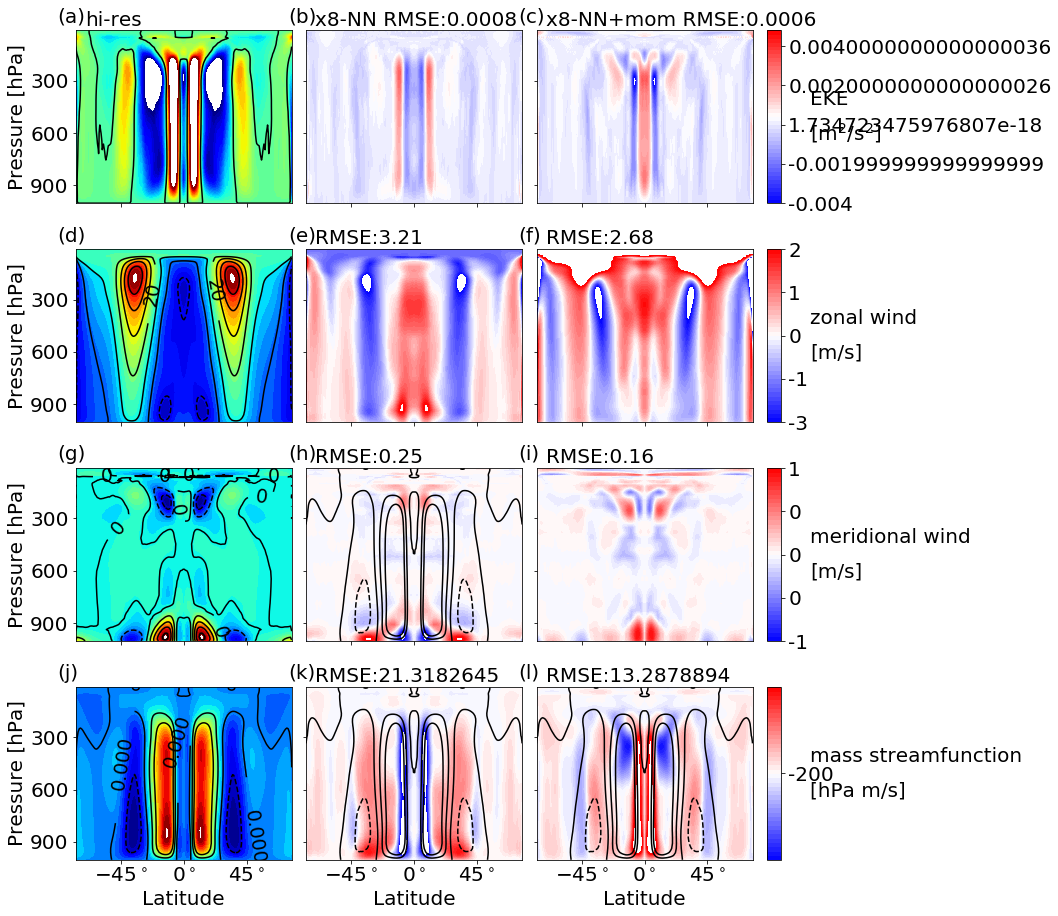

In [54]:
from matplotlib import cm
fontsize = 20
fontsize_cont1 = 19

y_plot = (y - np.mean(y))/10**6

x_ticks_lon = [-2,0,2]
ticks_lat = [-5,0,5]
ticks_press = [900,600,300]

cont_min_dqp = -0.0004
cont_max_dqp = 0.0004
lev_dqp = np.arange(cont_min_dqp, cont_max_dqp, 0.00005)

lev_Rsq = np.arange(-0.1, 1.01, 0.1)
cont_min_rsq = 0
cont_max_rsq = 1

h_width = 0.1
v_width = 0.1
h_width_cbar = 0.02

colorbar_width =0.02

p_lev_rad = 26
p_lev_diff = 15

row_dim = 4
col_dim = 3

# field_to_plot = list()
# field_to_plot.extend()

fig_witdth = 0.3
fig_height = 0.3
fig_h_dist = 0.02
fig_v_dist = 0.08

letters = ["(a)","(b)","(c)","(d)","(e)","(f)","(g)","(h)","(i)","(j)","(k)","(l)"]
# headers = ["EKE hi-res","EKE x8","EKE x8-RF",
#            "Zonal wind hi-res","$u$ x8","$u$ x8-RF",
#            "Meridional wind hi-res","$v$ x8","$v$ x8-RF",
#            "$q_thi-res$","$q_v$ x8","$q_v$ x8-RF"]
headers = ["hi-res","x8-NN RMSE:" + std_w1  ,"x8-NN+mom RMSE:"+std_w2,
           "","RMSE:" +std_u1,"RMSE:" + std_u2,
           "","RMSE:" + std_v1,"RMSE:" +std_v2,
            "","RMSE:" + std_stm_fc1,"RMSE:" + std_stm_fc2]
#            "","RMSE:" + std_q1,"RMSE:" + std_q2]

num_of_levs = 20
EKE_diff =0.004# + 200/num_of_levs
U_diff = 3#+ 20/num_of_levs
V_diff = 1#+ 5/num_of_levs
# QV_diff = 0.005#+ 0.01/num_of_levs
QV_diff = 50#+ 0.01/num_of_levs


# num_of_levs = 20
# lev_EKE = np.arange(0, np.max(eke_avg12km_sym) + 100, (np.max(eke_avg12km_sym))/num_of_levs)
lev_EKE = np.arange(-EKE_diff,EKE_diff+0.001,EKE_diff/num_of_levs)
lev_EKE2 = np.arange(-EKE_diff,EKE_diff+0.001,EKE_diff/num_of_levs)
lev_U = np.arange(np.min(u_avg12km_sym), np.max(u_avg12km_sym)+1, (np.max(u_avg12km_sym))/num_of_levs)
lev_U2 = np.arange(-U_diff,U_diff+0.001,U_diff/num_of_levs)
lev_V = np.arange(np.min(v_avg12km_sym), np.max(v_avg12km_sym), (np.max(v_avg12km_sym))/num_of_levs)
lev_V2 = np.arange(-V_diff,V_diff+0.001,V_diff/num_of_levs)
# lev_QV = np.arange(np.min(qv_avg12km_sym), np.max(qv_avg12km_sym), (np.max(qv_avg12km_sym))/num_of_levs)
# lev_QV2 = np.arange(-QV_diff,QV_diff+0.0000001,QV_diff/num_of_levs)

lev_QV = np.arange(np.min(stm_fc_avg12km_sym), np.max(stm_fc_avg12km_sym), (np.max(stm_fc_avg12km_sym))/num_of_levs)
lev_QV2 = np.arange(-QV_diff,QV_diff+0.001,QV_diff/num_of_levs)



 
fig, axes = plt.subplots(row_dim,col_dim,figsize=(10, 8))

cmap11 = cm.bwr

cax_q_Rsq = axes[0, 0].contourf(y_plot, p, w_avg12km_sym.T,lev_EKE,cmap=cm.jet)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[0, 0].set_ylim(np.amax(p), np.amin(p))
# plt.gca().invert_yaxis()

lev_EKE_cont =np.arange(0,1300,100)# [0,100,200,300,400,500,600,700]
cax_q_Rsq = axes[0, 0].contour(y_plot, p, w_avg12km_sym.T,lev_EKE_cont,colors='k')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[0, 0].set_ylim(np.amax(p), np.amin(p))
# axes[0,0].clabel(cax_q_Rsq,cax_q_Rsq.levels[::3],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)
axes[0,0].clabel(cax_q_Rsq,[200],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)
# axes[0, 0].clabel(cax_q_Rsq,cax_q_Rsq.levels[::5], inline=1, fontsize=10)


# cax_T_Rsq = axes[0, 1].contourf(y_plot, p, eke_avg192km_sym.T-eke_avg12km_sym.T,lev_EKE2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
# axes[0, 1].set_ylim(np.amax(p), np.amin(p))


# cax_EKE = axes[0, 2].contourf(y_plot, p, eke_rf_sym.T-eke_avg12km_sym.T,lev_EKE2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
# axes[0, 2].set_ylim(np.amax(p), np.amin(p))

cax_T_Rsq = axes[0, 1].contourf(y_plot, p, w_rf_sym.T - w_avg192km_sym.T,lev_EKE2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[0, 1].set_ylim(np.amax(p), np.amin(p))


cax_EKE = axes[0, 2].contourf(y_plot, p, w_rf_sym.T-w_avg12km_sym.T,lev_EKE2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[0, 2].set_ylim(np.amax(p), np.amin(p))



cax_q_Rsq = axes[1, 0].contourf(y_plot, p, u_avg12km_sym.T,lev_U,cmap=cm.jet)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[1, 0].set_ylim(np.amax(p), np.amin(p))
# plt.gca().invert_yaxis()

lev_U_cont =np.arange(-70,70,10)# [0,100,200,300,400,500,600,700]
cax_q_Rsq = axes[1, 0].contour(y_plot, p, u_avg12km_sym.T,lev_U_cont,colors='k')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[1, 0].set_ylim(np.amax(p), np.amin(p))
# axes[1,0].clabel(cax_q_Rsq,cax_q_Rsq.levels[::6],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)

axes[1,0].clabel(cax_q_Rsq,[20],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)

cax_T_Rsq = axes[1, 1].contourf(y_plot, p, u_rf_sym.T - u_avg192km_sym.T,lev_U2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[0, 1].set_ylim(np.amax(p), np.amin(p))


cax_U = axes[1, 2].contourf(y_plot, p, u_rf_sym.T-u_avg12km_sym.T,lev_U2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[1, 2].set_ylim(np.amax(p), np.amin(p))

cax_q_Rsq = axes[2, 0].contourf(y_plot, p, v_avg12km_sym.T,lev_V,cmap=cm.jet)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[2, 0].set_ylim(np.amax(p), np.amin(p))
# plt.gca().invert_yaxis()

lev_V_cont =np.arange(-6,7,1)
cax_q_Rsq = axes[2, 0].contour(y_plot, p, v_avg12km_sym.T,lev_V_cont,colors='k')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[2, 0].set_ylim(np.amax(p), np.amin(p))
# axes[2,0].clabel(cax_q_Rsq,[3],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)
axes[2,0].clabel(cax_q_Rsq,[0],fmt = '%1.0f', inline=1, fontsize=fontsize_cont1)
# axes[2,0].clabel(cax_q_Rsq,cax_q_Rsq.levels[::3],fmt = '%1.0f', inline=1, fontsize=10)



cax_q_Rsq = axes[2, 1].contour(y_plot, p[:-1], stm_fc_rf_sym.T,lev_QV_cont,colors='k')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[2, 1].set_ylim(np.amax(p), np.amin(p))

cax_T_Rsq = axes[2, 1].contourf(y_plot, p, v_rf_sym.T - v_avg192km_sym.T,lev_V2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[2, 1].set_ylim(np.amax(p), np.amin(p))

cax_V = axes[2, 2].contourf(y_plot, p, v_rf_sym.T-v_avg12km_sym.T,lev_V2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[2, 2].set_ylim(np.amax(p), np.amin(p))

cax_q_Rsq = axes[3, 0].contourf(y_plot, p[:-1], stm_fc_avg12km_sym.T,lev_QV,cmap=cm.jet)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[3, 0].set_ylim(np.amax(p), np.amin(p))
# plt.gca().invert_yaxis()

# lev_QV_cont =np.arange(0,0.03,0.002)
# cax_q_Rsq = axes[3, 0].contour(y_plot, p, qv_avg12km_sym.T,lev_QV_cont,colors='k')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
# axes[3, 0].set_ylim(np.amax(p), np.amin(p))
# axes[3,0].clabel(cax_q_Rsq,cax_q_Rsq.levels[::3], inline=1, fontsize=fontsize_cont1)



# cax_T_Rsq = axes[3, 1].contourf(y_plot, p, qv_avg192km_sym.T-qv_avg12km_sym.T,lev_QV2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
# axes[3, 1].set_ylim(np.amax(p), np.amin(p))

# cax_QV = axes[3, 2].contourf(y_plot, p, qv_rf_sym.T-qv_avg12km_sym.T,lev_QV2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
# axes[3, 2].set_ylim(np.amax(p), np.amin(p))

lev_QV_cont =np.arange(-300,300,100)
cax_q_Rsq = axes[3, 0].contour(y_plot, p[:-1], stm_fc_avg12km_sym.T,lev_QV_cont,colors='k')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[3, 0].set_ylim(np.amax(p), np.amin(p))
axes[3,0].clabel(cax_q_Rsq,cax_q_Rsq.levels[::3], inline=1, fontsize=fontsize_cont1)


cax_q_Rsq = axes[3, 1].contour(y_plot, p[:-1], stm_fc_rf_sym.T,lev_QV_cont,colors='k')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[3, 1].set_ylim(np.amax(p), np.amin(p))


cax_T_Rsq = axes[3, 1].contourf(y_plot, p[:-1], stm_fc_rf_sym.T- stm_fc_avg192km_sym.T,lev_QV2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[3, 1].set_ylim(np.amax(p), np.amin(p))


cax_q_Rsq = axes[3, 2].contour(y_plot, p[:-1], stm_fc_rf_sym.T,lev_QV_cont,colors='k')#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[3, 2].set_ylim(np.amax(p), np.amin(p))

cax_QV = axes[3, 2].contourf(y_plot, p[:-1], stm_fc_rf_sym.T-stm_fc_avg12km_sym.T,lev_QV2,cmap=cmap11)#,vmin=cont_min_rsq, vmax=cont_max_rsq)#,cmap='seismic')
axes[3, 2].set_ylim(np.amax(p), np.amin(p))




        
#Position of first figure        
x0 = axes[0,0].get_position().x0
x1 = axes[0,0].get_position().x1
y0 = axes[0,0].get_position().y0
y1 = axes[0,0].get_position().y1

for i in range(row_dim):
    for j  in range(col_dim):
        if (i+1)*(j+1) > len(letters):
            continue
        axes[i,j].set_position([x0 + j*fig_witdth + j*fig_h_dist,y0- i*fig_height - i*fig_v_dist,fig_witdth,fig_height])
        
        
        
i = 0
j = 2 
cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
cbar_rsq = fig.colorbar(cax_EKE,cax = cbaxes_rsq,ticks=lev_EKE2[::10],ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
cbar_rsq.set_ticklabels(lev_EKE2[::10])
# cbar_rsq = fig.colorbar(cax_QV,cax = cbaxes_rsq,ticks=np.arange(-0.004,0.004+0.000001,0.002),ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
# cbar_rsq.set_ticklabels(np.arange(-0.004,0.004+0.000001,0.002))

# cbar_rsq.set_label('[$m^2/s^2$]',fontsize=fontsize)
cbar_rsq.ax.tick_params(labelsize=fontsize)


i = 1
j = 2 
cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
cbar_rsq = fig.colorbar(cax_U,cax = cbaxes_rsq,ticks=lev_U2[::10],ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
cbar_rsq.set_ticklabels(lev_U2[::10].astype(int))
# cbar_rsq.set_label('[$m/s$]',fontsize=fontsize)
cbar_rsq.ax.tick_params(labelsize=fontsize)


i = 2
j = 2 
cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
cbar_rsq = fig.colorbar(cax_V,cax = cbaxes_rsq,ticks=lev_V2[::10],ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
cbar_rsq.set_ticklabels(lev_V2[::10].astype(int))
# cbar_rsq.set_label('[$m/s$]',fontsize=fontsize)
cbar_rsq.ax.tick_params(labelsize=fontsize)



# i = 3
# j = 2 
# cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
# cbar_rsq = fig.colorbar(cax_QV,cax = cbaxes_rsq,ticks=np.arange(-0.01,0.01+0.000001,0.01),ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
# cbar_rsq.set_ticklabels(np.arange(-1,1+0.000001,1).astype(int))
# # cbar_rsq.set_label('[$kg/kg$]$x10^{-2}$',fontsize=fontsize)
# cbar_rsq.ax.tick_params(labelsize=fontsize)

i = 3
j = 2 
cbaxes_rsq = fig.add_axes([axes[i, j].get_position().x0+axes[i, j].get_position().width + h_width_cbar, axes[i, j].get_position().y0, colorbar_width, fig_height]) 
cbar_rsq = fig.colorbar(cax_QV,cax = cbaxes_rsq,ticks=np.arange(-200,200+0.000001,100),ax=axes[i, j])#,cax = cbaxes_rsq, ax=axes[0:2, :], shrink=1.0,ticks=np.arange(cont_min_rsq, cont_max_rsq, cont_max_rsq/4),)
cbar_rsq.set_ticklabels(np.arange(-200,200+0.000001,100).astype(int))

# cbar_rsq.set_label('[$kg/kg$]$x10^{-2}$',fontsize=fontsize)
cbar_rsq.ax.tick_params(labelsize=fontsize)



atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[0,0].get_position().y0 + (1.1)*fig_height - (i-1)*fig_v_dist ,'EKE',transform = fig.transFigure,color="black",fontsize=fontsize)
atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[0,0].get_position().y0 +(0.9)*fig_height - (i-1)*fig_v_dist ,'[m$^2$/s$^2$]',transform = fig.transFigure,color="black",fontsize=fontsize)

atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[1,0].get_position().y0 + (1.1)*fig_height - (i-1)*fig_v_dist ,'zonal wind',transform = fig.transFigure,color="black",fontsize=fontsize)
atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[1,0].get_position().y0 +(0.9)*fig_height - (i-1)*fig_v_dist ,'[m/s]',transform = fig.transFigure,color="black",fontsize=fontsize)

atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[2,0].get_position().y0 + (1.1)*fig_height - (i-1)*fig_v_dist ,'meridional wind',transform = fig.transFigure,color="black",fontsize=fontsize)
atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[2,0].get_position().y0 +(0.9)*fig_height - (i-1)*fig_v_dist ,'[m/s]',transform = fig.transFigure,color="black",fontsize=fontsize)

# atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[3,0].get_position().y0 + (1.1)*fig_height - (i-1)*fig_v_dist ,'non-precipitating water',transform = fig.transFigure,color="black",fontsize=fontsize)
# atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[3,0].get_position().y0 +(0.9)*fig_height - (i-1)*fig_v_dist ,'[kg/kg x$10^{-2}$]',transform = fig.transFigure,color="black",fontsize=fontsize)


atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[3,0].get_position().y0 + (1.1)*fig_height - (i-1)*fig_v_dist ,'mass streamfunction',transform = fig.transFigure,color="black",fontsize=fontsize)
atext2 = axes[3, 2].text(axes[3,2].get_position().x0*0.7+ j*fig_witdth + j*fig_h_dist-0.03,axes[3,0].get_position().y0 +(0.9)*fig_height - (i-1)*fig_v_dist ,'[hPa m/s]',transform = fig.transFigure,color="black",fontsize=fontsize)


rescale_let_pos = 0.8
lat_pos = min(y_plot)*(rescale_let_pos*1.1)
# lon_pos = max(x_plot)*rescale_let_pos
press_pos = 150
press_pos2 = 300


ind_let = 0
for i in range(row_dim):
    for j  in range(col_dim):
        if (i+1)*(j+1) > len(letters):
            continue
        atext2 = axes[i, j].text(axes[0,0].get_position().x0*0.8+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*1.02- (i-1)*fig_height - i*fig_v_dist ,letters[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize)
        
        header= axes[i, j].text(axes[0,0].get_position().x0*1.1+ j*fig_witdth + j*fig_h_dist,axes[0,0].get_position().y0*0.9- (i-1)*fig_height - (i-1)*fig_v_dist ,headers[ind_let],transform = fig.transFigure,color="black",fontsize=fontsize)
        ind_let = ind_let + 1


axes[2, 0].set_xlim(np.amin(y_plot), np.amax(y_plot))


axes[0, 0].set_ylabel('Pressure [hPa]',fontsize=fontsize)
axes[1, 0].set_ylabel('Pressure [hPa]',fontsize=fontsize)
axes[2, 0].set_ylabel('Pressure [hPa]',fontsize=fontsize)
axes[3, 0].set_ylabel('Pressure [hPa]',fontsize=fontsize)


axes[3, 0].set_xlabel('Latitude',fontsize=fontsize)
axes[3, 1].set_xlabel('Latitude',fontsize=fontsize)
axes[3, 2].set_xlabel('Latitude',fontsize=fontsize)



#Ticks and tick labels
ticks_press_R2 = [0.2,0.4,0.6]
ticks_lat_degrees = ['$-45^\circ$','$0^\circ$','$45^\circ$']
axes[2, 0].set_yticks(ticks_press)
axes[2, 0].set_yticklabels(ticks_press,fontsize=fontsize)
axes[2, 1].set_yticks(ticks_press)
axes[2, 1].set_yticklabels([])
axes[2, 2].set_yticks(ticks_press)
axes[2, 2].set_yticklabels([])

axes[3, 0].set_yticks(ticks_press)
axes[3, 0].set_yticklabels(ticks_press,fontsize=fontsize)
axes[3, 1].set_yticks(ticks_press)
axes[3, 1].set_yticklabels([])
axes[3, 2].set_yticks(ticks_press)
axes[3, 2].set_yticklabels([])


axes[0, 2].set_yticks(ticks_press)
axes[0, 2].set_yticklabels([])

axes[1, 2].set_yticks(ticks_press)
axes[1, 2].set_yticklabels([])

axes[3, 0].set_xticks(ticks_lat)
axes[3, 0].set_xticklabels(ticks_lat_degrees,fontsize=fontsize)
axes[3, 1].set_xticks(ticks_lat)
axes[3, 1].set_xticklabels(ticks_lat_degrees,fontsize=fontsize)
axes[3, 2].set_xticks(ticks_lat)
axes[3, 2].set_xticklabels(ticks_lat_degrees,fontsize=fontsize)


# axes[2, 1].set_xticks(ticks_lat)
# axes[2, 1].set_xticklabels(ticks_lat,fontsize=fontsize)
# axes[2, 1].set_yticks(x_ticks_lon)
# axes[2, 1].set_yticklabels([])
# axes[0, 0].set_xticks(ticks_lat)
# axes[0, 0].set_xticklabels(ticks_lat,fontsize=fontsize)

axes[1, 0].set_xticks(ticks_lat)
axes[1, 0].set_xticklabels([])
axes[0, 0].set_yticks(ticks_press)
axes[0, 0].set_yticklabels(ticks_press,fontsize=fontsize)
axes[0, 0].set_xticks(ticks_lat)
axes[0, 0].set_xticklabels([])



axes[2, 0].set_xticks(ticks_lat)
axes[2, 0].set_xticklabels([])
axes[2, 1].set_xticks(ticks_lat)
axes[2, 1].set_xticklabels([])
axes[2, 2].set_xticks(ticks_lat)
axes[2, 2].set_xticklabels([])

axes[1, 0].set_xticks(ticks_lat)
axes[1, 0].set_xticklabels([])
axes[1, 1].set_xticks(ticks_lat)
axes[1, 1].set_xticklabels([])
axes[1, 2].set_xticks(ticks_lat)
axes[1, 2].set_xticklabels([])

axes[0, 0].set_xticks(ticks_lat)
axes[0, 0].set_xticklabels([])
axes[0, 1].set_xticks(ticks_lat)
axes[0, 1].set_xticklabels([])
axes[0, 2].set_xticks(ticks_lat)
axes[0, 2].set_xticklabels([])




axes[1, 0].set_yticks(ticks_press)
axes[1, 0].set_yticklabels(ticks_press,fontsize=fontsize)
axes[1, 1].set_xticklabels([])
axes[1, 1].set_xticks(ticks_lat)
axes[1, 1].set_yticks(ticks_press)
axes[1, 1].set_yticklabels([])
axes[0, 1].set_xticks(ticks_lat)
axes[0, 1].set_xticklabels([])
axes[0, 1].set_yticks(ticks_press)
axes[0, 1].set_yticklabels([])



# axes[2,0].spines["top"].set_visible(False)
# axes[2,0].spines["right"].set_visible(False)

# axes[2,1].spines["top"].set_visible(False)
# axes[2,1].spines["right"].set_visible(False)

for i in range(row_dim):
    for j  in range(col_dim):
        axes[i, j].set_ylim(np.amax(p), np.amin(p))


# axes[0, 0].set_ylim(np.amax(p), np.amin(p))
# axes[0, 1].set_ylim(np.amax(p), np.amin(p))
# axes[1, 0].set_ylim(np.amax(p), np.amin(p))
# axes[1, 1].set_ylim(np.amax(p), np.amin(p))




#Saving plot... f
save_path = '/Users/yani/Dropbox/MIT/projects/ML_momentum_data/temp_data/'

# plt.savefig(save_path+'online_x16_with_momentum_RF_after_euler_5M_u_v_EKE.eps', format='eps', bbox_inches="tight")

# plt.savefig(save_path+'online_x16_with_momentum_32neurons_64_neurons_u_v_EKE.eps', format='eps', bbox_inches="tight")
# plt.savefig(save_path+'online_x16_with_momentum_128_neurons_u_v_EKE.eps', format='eps', bbox_inches="tight")


# plt.savefig(save_path+'online_x8_NN_with_momentum_euler.eps', format='eps', bbox_inches="tight")
# plt.savefig(save_path+'online_x8_NN_with_momentum_euler_with_streamfunction.eps', format='eps', bbox_inches="tight")
# plt.savefig(save_path+'online_x8_NN_with_momentum_euler_with_streamfunction_symmetric.eps', format='eps', bbox_inches="tight")
# plt.savefig(save_path+'online_x8_NN_with_momentum_euler_symmetric.eps', format='eps', bbox_inches="tight")
# plt.savefig(save_path+'online_x16_with_momentum_128_neurons_u_v_EKE_symmetric.eps', format='eps', bbox_inches="tight")


# plt.savefig(save_path+'online_x16_4_layers_with_momentum_128_neurons_streanfunction.eps', format='eps', bbox_inches="tight")
# plt.savefig(save_path+'online_x16_4_layers_with_momentum_128_neurons_streanfunction_symmetric.eps', format='eps', bbox_inches="tight")

# plt.savefig(save_path+'online_x16_4_layers_with_momentum_128_neurons_streanfunction_not_in_place.eps', format='eps', bbox_inches="tight")


# plt.savefig(save_path+'online_x8_NN_with_momentum_and_tkz_before_ADAMS_with_streamfunction_symmetric.eps', format='eps', bbox_inches="tight")

# plt.savefig(save_path+'online_x4_NN_with_momentum_and_tkz_before_ADAMS_with_streamfunction_symmetric_only_150_days_avg.eps', format='eps', bbox_inches="tight")

In [72]:
360000*24/60/60/24

100.0